In [93]:
import pandas as pd

In [95]:
Question_kind_Barbie = pd.read_csv("BarbieQA.csv")
Question_kind_Oppenheimer = pd.read_csv("OppenheimerQA.csv")

In [1]:
from llama_index.core import VectorStoreIndex, SimpleDirectoryReader, StorageContext, load_index_from_storage, Settings
from llama_index.core.embeddings import resolve_embed_model
from llama_index.llms.ollama import Ollama
import os.path
import time

Persist_DIR = "./storageBarbie"

if not os.path.exists(Persist_DIR):
    print("Initializing storage and loading documents.")
    documents = SimpleDirectoryReader("Data/Barbie").load_data()
    Settings.embed_model = resolve_embed_model("local:BAAI/bge-small-en-v1.5")
    index = VectorStoreIndex.from_documents(documents)
    index.storage_context.persist(persist_dir=Persist_DIR)
else:
    print("Loading existing storage.")
    storage_context = StorageContext.from_defaults(persist_dir=Persist_DIR)
    Settings.embed_model = resolve_embed_model("local:BAAI/bge-small-en-v1.5")
    index = load_index_from_storage(storage_context)

# Setting up LLama and Mistral models
llama_model = Ollama(model="Llama2", request_timeout=30.0)  # Adjust model as needed
mistral_model = Ollama(model="mistral", request_timeout=30.0)

prompt = "What does Ken think about the real world when he first enters it?"

# Query using LLama
index.llm = llama_model  # Set the LLama model for querying
llama_response = index.as_query_engine().query(prompt)

# Query using Mistral
index.llm = mistral_model  # Set the Mistral model for querying
mistral_response = index.as_query_engine().query(prompt)

# Output responses
print("LLama Response:", llama_response)
print("Mistral Response:", mistral_response)


Loading existing storage.


/opt/homebrew/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


ValueError: 
******
Could not load OpenAI model. If you intended to use OpenAI, please check your OPENAI_API_KEY.
Original error:
No API key found for OpenAI.
Please set either the OPENAI_API_KEY environment variable or openai.api_key prior to initialization.
API keys can be found or created at https://platform.openai.com/account/api-keys

To disable the LLM entirely, set llm=None.
******

In [2]:
from llama_index.core import VectorStoreIndex, SimpleDirectoryReader, StorageContext, load_index_from_storage, Settings
from llama_index.core.embeddings import resolve_embed_model
from llama_index.llms.ollama import Ollama
import os.path
import time

# Given setup for storing or loading the Barbie document index
Persist_DIR = "./storageBarbie"

if not os.path.exists(Persist_DIR):
    print("Initializing storage and loading documents.")
    documents = SimpleDirectoryReader("Data/Barbie").load_data()
    Settings.embed_model = resolve_embed_model("local:BAAI/bge-small-en-v1.5")
    index = VectorStoreIndex.from_documents(documents)
    index.storage_context.persist(persist_dir=Persist_DIR)
else:
    print("Loading existing storage.")
    storage_context = StorageContext.from_defaults(persist_dir=Persist_DIR)
    Settings.embed_model = resolve_embed_model("local:BAAI/bge-small-en-v1.5")
    index = load_index_from_storage(storage_context)

# Responses dictionary to store model responses
responses = {}

# Model choices and question for singular query
models_and_question = [
    {'model_choice': 'llama2', 'question': "What does Ken think about the real world when he first enters it?"},
    {'model_choice': 'mistral', 'question': "What does Ken think about the real world when he first enters it?"}
]

# Processing each model's response to the question
for model_info in models_and_question:
    model = Ollama(model=model_info['model_choice'], request_timeout=30.0)
    start_time = time.time()
    response = model.complete(model_info['question'],
                              temperature=0.00001,  # Adjust for desired randomness
                              seed=42)
    end_time = time.time()

    response_key = f"{model_info['model_choice']} response"
    responses[response_key] = response.text
    print(f"{response_key}: {response.text}\nTime taken: {end_time - start_time}s\n")

# This code assumes the llama_index library supports the operations as described and that
# the models specified ('llama2', 'mistral') are correctly configured in the Ollama class.

Loading existing storage.
llama2 response: Ken, being a character from the anime "Dragon Ball Z," has never experienced the real world before. As such, his initial reaction to entering the real world would likely be one of confusion and disbelief. He may have difficulty understanding the laws of physics and the behavior of living creatures in this new environment.

Growing up in a fantasy world like Planet Plant, Ken would have been trained in combat and fighting from a young age. He would have been taught that violence is the solution to any problem, and he may initially approach the real world with a mindset of aggression and hostility towards anyone or anything that poses a threat to him.

However, as Ken begins to explore the real world and interact with its inhabitants, he may start to see things from a different perspective. He could learn about the importance of cooperation, empathy, and communication in resolving conflicts peacefully. He may also discover the value of teamwork 

In [6]:
from llama_index.core import VectorStoreIndex, SimpleDirectoryReader, StorageContext, load_index_from_storage, Settings
from llama_index.core.embeddings import resolve_embed_model
from llama_index.llms.ollama import Ollama
import os.path
import time

# Given setup for storing or loading the Barbie document index
Persist_DIR = "./storageBarbie"

if not os.path.exists(Persist_DIR):
    print("Initializing storage and loading documents.")
    documents = SimpleDirectoryReader("Data/Barbie").load_data()
    Settings.embed_model = resolve_embed_model("local:BAAI/bge-small-en-v1.5")
    index = VectorStoreIndex.from_documents(documents)
    index.storage_context.persist(persist_dir=Persist_DIR)
else:
    print("Loading existing storage.")
    storage_context = StorageContext.from_defaults(persist_dir=Persist_DIR)
    Settings.embed_model = resolve_embed_model("local:BAAI/bge-small-en-v1.5")
    index = load_index_from_storage(storage_context)

# Responses dictionary to store model responses
responses = {}

# Model choices and question for singular query
models_and_question = [
    {'model_choice': 'mistral', 'question': "What is the movie about?"},
    {'model_choice': 'llama2', 'question': "What is the movie about?"}
]

# Processing each model's response to the question
for model_info in models_and_question:
    model = Ollama(model=model_info['model_choice'], request_timeout=30.0)
    start_time = time.time()
    response = model.complete(model_info['question'],
                              temperature=0.00001,  # Adjust for desired randomness
                              seed=42)
    end_time = time.time()

    response_key = f"{model_info['model_choice']} response"
    responses[response_key] = response.text
    print(f"{response_key}: {response.text}\nTime taken: {end_time - start_time}s\n")

# This code assumes the llama_index library supports the operations as described and that
# the models specified ('llama2', 'mistral') are correctly configured in the Ollama class.


Loading existing storage.
mistral response:  I'd be happy to help, but I need to know which specific movie you have in mind. Could you please provide the title or some key details about the film? Once I have that information, I can give you a summary of what the movie is about.
Time taken: 2.167351722717285s

llama2 response: The movie "Her" is a 2013 science fiction romantic drama film written and directed by Spike Jonze. The film takes place in a not-too-distant future where technology has advanced to the point where humans can interact with operating systems, or "OS," that are designed to meet their every need.

The movie follows the story of Theodore Twombly (played by Joaquin Phoenix), a lonely and introspective man who has recently gone through a divorce. Theodore works as a letter writer for a company called "Soul", where he composes letters for people who are unable to express their own emotions.

One day, Theodore meets an OS named Samantha (voiced by Scarlett Johansson), who 

# The above arent useful per se 

In [19]:
from llama_index.core import VectorStoreIndex, SimpleDirectoryReader, StorageContext, load_index_from_storage, Settings
from llama_index.core.embeddings import resolve_embed_model
from llama_index.llms.ollama import Ollama
import os.path

Persist_DIR = "./storageBarbie"

if not os.path.exists(Persist_DIR):
    print("Initializing storage and loading documents.")
    documents = SimpleDirectoryReader("Data/Barbie").load_data()
    Settings.embed_model = resolve_embed_model("local:BAAI/bge-small-en-v1.5")
    index = VectorStoreIndex.from_documents(documents)
    index.storage_context.persist(persist_dir=Persist_DIR)
else:
    print("Loading existing storage.")
    storage_context = StorageContext.from_defaults(persist_dir=Persist_DIR)
    Settings.embed_model = resolve_embed_model("local:BAAI/bge-small-en-v1.5")
    index = load_index_from_storage(storage_context)

# Setting up Mistral model
Settings.llm = Ollama(model="mistral", request_timeout=30.0)
mistral_query_engine = index.as_query_engine()
mistral_response = mistral_query_engine.query("What does Ken think about the real world when he first enters it?")
print("Mistral Response:", mistral_response.response)

# Setting up Llama2 model
Settings.llm = Ollama(model="llama2", request_timeout=30.0)
llama2_query_engine = index.as_query_engine()
llama2_response = llama2_query_engine.query("What does Ken think about the real world when he first enters it?")
print("Llama2 Response:", llama2_response.response)


Loading existing storage.
Mistral Response:  Ken initially expresses confusion and disbelief as he encounters various aspects of the real world, such as emotions, conflict, and the need to discover his identity beyond his relationships and possessions. He feels overwhelmed and out of place in this new environment, but also determined to understand himself better. There is a sense of excitement and curiosity mixed with anxiety and uncertainty.
Llama2 Response: Based on the given context, Ken seems to have a mix of emotions when he first enters the real world. On one hand, he is excited and curious about this new environment, as evidenced by his comment "It's boy's night!" and his repeated references to wanting to "figure out who he is without me." This suggests that he is eager to explore and learn about the world beyond Barbie Land.

On the other hand, Ken also appears to be intimidated and overwhelmed by the complexity of the real world. He refers to himself as "stupid" and "not even 

In [18]:
mistral_response.response

' Based on the context provided, Ken expresses a sense of confusion and excitement upon entering the "real world" or Barbie Land. He also mentions feeling stupid and looking stupid as he struggles to adapt. However, he eventually comes to understand that he needs to figure out who he is without relying on external things like his mink coat or relationship with Barbie Margot. In a moment of realization, Ken declares "Ken is me!" which is met with applause and weeping from the other Kens. The Mattel CEO also expresses his own struggles with leadership and existential identity in this new world.'

## Creating the dataset for RAG (Barbie)

In [44]:
import pandas as pd

data = {
    "Question": [
        "What were the consequences of Barbie's personal conflicts and legal challenges on his professional life?",
        "How did the public perception of Barbie change after the atomic bombings of Hiroshima and Nagasaki?",
        "What was Truman's response to Oppenheimer's concerns about the atomic bomb and its implications?",
        "How did Strauss's actions contribute to Oppenheimer's security clearance issues?",
        "What role did Lewis Strauss play in the post-war atomic policy and Oppenheimer's career?",
        "What were the effects of the H-bomb development on Oppenheimer's stance on nuclear weapons?",
        "How did Oppenheimer's past affiliations and actions become a point of contention during the security hearings?",
        "What was the impact of the atomic bomb on Oppenheimer's personal reflections and public statements?",
        "In what ways did Oppenheimer attempt to influence US atomic policy after the war?",
        "How did the security hearing against Oppenheimer unfold and what were the strategies used by Strauss?"
    ],
    "Answer": [
        "Oppenheimer's legal challenges and personal conflicts, particularly with figures like Lewis Strauss, significantly affected his professional life, leading to the loss of his security clearance and damaging his credibility and influence in national security matters.",
        "After the atomic bombings, Oppenheimer became known as the 'father of the atomic bomb', a title that brought him fame but also led to public and personal turmoil over the ethical implications of his work.",
        "Truman dismissed Oppenheimer's concerns about the atomic bomb and its implications for an arms race with the Soviets, emphasizing the bomb's role in ending World War II and suggesting that concerns over international cooperation and arms control were misplaced.",
        "Strauss played a crucial role in the revocation of Oppenheimer's security clearance, leveraging past associations and controversies to challenge Oppenheimer's credibility and influence in atomic policy.",
        "Lewis Strauss's influence extended beyond Oppenheimer's security clearance issues, affecting post-war atomic policy and contributing to the tension between military objectives and scientific ethical considerations.",
        "The development of the H-bomb and the associated policy decisions deepened Oppenheimer's concerns about nuclear weapons, leading him to advocate for arms control and to question the direction of US atomic policy.",
        "Oppenheimer's past affiliations with communist and leftist groups became a focal point during his security hearings, overshadowing his contributions to the Manhattan Project and contributing to the revocation of his security clearance.",
        "The atomic bomb had a profound impact on Oppenheimer's personal reflections and public statements, leading him to express remorse and to advocate for nuclear disarmament and international cooperation.",
        "Oppenheimer attempted to influence US atomic policy by advocating for international control of atomic energy and arms control, efforts that were ultimately overshadowed by the Cold War context and his own security clearance controversy.",
        "The security hearing against Oppenheimer was characterized by strategic maneuvers by Strauss and others, who used the hearings to systematically undermine Oppenheimer's credibility and to isolate him from the policy-making process."
    ]
}

# Create the DataFrame
OppenheimerQA = pd.DataFrame(data)
OppenheimerQA


Question  \
0  What were the consequences of Oppenheimer's pe...   
1  How did the public perception of Oppenheimer c...   
2  What was Truman's response to Oppenheimer's co...   
3  How did Strauss's actions contribute to Oppenh...   
4  What role did Lewis Strauss play in the post-w...   
5  What were the effects of the H-bomb developmen...   
6  How did Oppenheimer's past affiliations and ac...   
7  What was the impact of the atomic bomb on Oppe...   
8  In what ways did Oppenheimer attempt to influe...   
9  How did the security hearing against Oppenheim...   

                                              Answer  
0  Oppenheimer's legal challenges and personal co...  
1  After the atomic bombings, Oppenheimer became ...  
2  Truman dismissed Oppenheimer's concerns about ...  
3  Strauss played a crucial role in the revocatio...  
4  Lewis Strauss's influence extended beyond Oppe...  
5  The development of the H-bomb and the associat...  
6  Oppenheimer's past affiliations with communist...  
7  The atomic bomb had a profound impact on Oppen...  
8  Oppenheimer attempted to influence US atomic p...  
9  The security hearing against Oppenheimer was c...

In [45]:
# Updating the answers with more detailed explanations but ensuring to correct the syntax error and complete the responses within the limitations of this format.
OppenheimerQA_verbose = OppenheimerQA
data_updated = {
    "Question": data["Question"],
    "Answer": [
        "The professional trajectory of J. Robert Oppenheimer was significantly affected by his personal conflicts and legal challenges, particularly those with Lewis Strauss. These conflicts led to a high-profile security clearance hearing that scrutinized Oppenheimer's affiliations and actions. The eventual loss of his security clearance diminished his influence in nuclear policy discussions and tarnished his reputation, highlighting the impact of political loyalty and scientific freedom conflicts.",
        "Following the atomic bombings of Hiroshima and Nagasaki, Oppenheimer became known as the 'father of the atomic bomb', a title that brought him fame but also public and personal turmoil over the ethical implications of his work. His image transitioned from a leading physicist to a symbol of the moral dilemmas of nuclear weapons, reflecting on the complexities of scientific innovation, moral responsibility, and public perception in the aftermath of such a monumental event.",
        "President Harry S. Truman's response to Oppenheimer's concerns about the atomic bomb and its implications for an arms race with the Soviets was dismissive, emphasizing the bomb's strategic advantages. This conversation reflects a pivotal moment in nuclear policy history, where the chance for disarmament and international control of atomic energy was overlooked in favor of maintaining strategic superiority, underscoring the challenges of advocating for nuclear restraint post-World War II.",
        "Lewis Strauss played a crucial role in Oppenheimer's security clearance issues, leveraging suspicions and controversies to initiate a review. This was part of a broader effort to marginalize Oppenheimer from nuclear policy advisory roles, demonstrating the politicization of security clearances and how personal and ideological differences could impact the careers of key scientific figures in the atomic age.",
        "Strauss significantly influenced post-war atomic policy and Oppenheimer's career, representing interests that favored military considerations over scientific ethics. His campaign against Oppenheimer marked a decisive shift in U.S. atomic policy towards aggressive nuclear arms development, reflecting the broader ideological battle over atomic energy control and the tension between scientific and military priorities.",
        "The H-bomb's development and the shift in atomic policy profoundly affected Oppenheimer's stance on nuclear weapons. He became an advocate for arms control, highlighting the ethical dilemmas and global destruction potential of nuclear arms. This shift illustrates the challenges faced by scientists involved in nuclear technology development, emphasizing the ethical and policy implications of their work in the context of Cold War tensions.",
        "Oppenheimer's past affiliations with leftist and communist groups became focal points during his security hearings, overshadowing his contributions to the Manhattan Project. This scrutiny under Cold War paranoia cast doubts on his loyalty, revealing the era's fears and the impact of political ideologies on scientific communities.",
        "The atomic bomb's development and use had a profound impact on Oppenheimer's personal reflections and public statements, leading him to advocate for nuclear disarmament and international cooperation. This period of his life underscores the moral and ethical concerns associated with nuclear weapons and the responsibility of those who develop such technologies.",
        "Oppenheimer attempted to influence U.S. atomic policy towards disarmament and international control post-war, despite the Cold War's influence overshadowing these efforts. His advocacy for nuclear restraint highlights the complexities of policy-making in the atomic age, emphasizing the need for transparency, ethical consideration, and international cooperation in nuclear matters.",
        "The security hearing against Oppenheimer, characterized by Strauss's strategic maneuvers, systematically undermined his credibility and isolated him from policy-making. This episode illustrates the use of political tactics in security hearings and the broader implications for governance, policy direction, and the role of individuals in shaping national security agendas."
    ]
}

# Creating the updated DataFrame
OppenheimerQA_verbose = pd.DataFrame(data_updated)
OppenheimerQA_verbose


Question  \
0  What were the consequences of Oppenheimer's pe...   
1  How did the public perception of Oppenheimer c...   
2  What was Truman's response to Oppenheimer's co...   
3  How did Strauss's actions contribute to Oppenh...   
4  What role did Lewis Strauss play in the post-w...   
5  What were the effects of the H-bomb developmen...   
6  How did Oppenheimer's past affiliations and ac...   
7  What was the impact of the atomic bomb on Oppe...   
8  In what ways did Oppenheimer attempt to influe...   
9  How did the security hearing against Oppenheim...   

                                              Answer  
0  The professional trajectory of J. Robert Oppen...  
1  Following the atomic bombings of Hiroshima and...  
2  President Harry S. Truman's response to Oppenh...  
3  Lewis Strauss played a crucial role in Oppenhe...  
4  Strauss significantly influenced post-war atom...  
5  The H-bomb's development and the shift in atom...  
6  Oppenheimer's past affiliations with leftist a...  
7  The atomic bomb's development and use had a pr...  
8  Oppenheimer attempted to influence U.S. atomic...  
9  The security hearing against Oppenheimer, char...

In [23]:
import pandas as pd

# Creating a dictionary with questions as keys and answers as values based on the provided script excerpts
qa_pairs = {
    "Who tries to breakdance at Barbie Margot's party?": "Gosling jumps up and tries to breakdance badly. Ken joins in for moral support.",
    "What does Barbie Margot think about dying during the party?": "Do you ever think about dying?! Literal record scratch and everything is quiet.",
    "What is Ken Ryan Gosling's idea of his house?": "This is no longer “Barbie’s Dreamhouse,” this shall henceforth be known as “Ken’s Mojo Dojo Casa House.”",
    "What does the Mattel CEO prioritize over business?": "No! I got into this business because of little girls and their dreams! In the least creepy way possible!",
    "How does Barbie Margot feel after her party?": "After their fun party, Barbie Margot and Ken Ryan Gosling stand in the moonlight.",
    "What unusual event happens to Barbie in the morning?": "She makes a face, cups her hands and smells her breath. YUCK!... She pours milk into a glass (which is nothing) and drinks. Spits it out.",
    "What change does Barbie Margot notice about herself at the beach?": "Barbie Margot steps up on her tip-toes and wobbles weirdly on the sand... She’s just got big ole flat feet.",
    "What happens when Barbie Margot visits Weird Barbie?": "A pool of light illuminates Weird Barbie - she’s in the splits, has an unintentionally asymmetrical short haircut and mismatched clothes.",
    "How does Ken Ryan Gosling react to the concept of the 'Patriarchy'?": "Why didn’t Barbie tell me about Patriarchy? Which, according to my understanding, is where men and horses run everything!",
    "What does Barbie Margot find challenging in the real world?": "Men look at me like I’m an object, girls hate me, everyone thinks I’m crazy and I keep getting arrested."
}

# Converting the dictionary to a pandas DataFrame
BarbieQA = pd.DataFrame(list(qa_pairs.items()), columns=['Question', 'Reference Text'])

BarbieQA


Question  \
0  Who tries to breakdance at Barbie Margot's party?   
1  What does Barbie Margot think about dying duri...   
2      What is Ken Ryan Gosling's idea of his house?   
3  What does the Mattel CEO prioritize over busin...   
4       How does Barbie Margot feel after her party?   
5  What unusual event happens to Barbie in the mo...   
6  What change does Barbie Margot notice about he...   
7  What happens when Barbie Margot visits Weird B...   
8  How does Ken Ryan Gosling react to the concept...   
9  What does Barbie Margot find challenging in th...   

                                      Reference Text  
0  Gosling jumps up and tries to breakdance badly...  
1  Do you ever think about dying?! Literal record...  
2  This is no longer “Barbie’s Dreamhouse,” this ...  
3  No! I got into this business because of little...  
4  After their fun party, Barbie Margot and Ken R...  
5  She makes a face, cups her hands and smells he...  
6  Barbie Margot steps up on her tip-toes and wob...  
7  A pool of light illuminates Weird Barbie - she...  
8  Why didn’t Barbie tell me about Patriarchy? Wh...  
9  Men look at me like I’m an object, girls hate ...

In [25]:
# Rewriting the answers with more details from the provided text, without making up new events
BarbieQA_verbose = BarbieQA
expanded_answers = {
    "Who tries to breakdance at Barbie Margot's party?": "During the big block party hosted by Barbie Margot, Gosling jumps up and attempts to breakdance, performing poorly. Ken, observing this, joins in to provide moral support, both attempting to showcase their dance moves.",
    "What does Barbie Margot think about dying during the party?": "In the midst of the vibrant party atmosphere, Barbie Margot suddenly contemplates mortality, asking aloud 'Do you ever think about dying?!' This abrupt shift brings the party to a standstill, causing a literal record scratch and drawing quiet, surprised looks from everyone.",
    "What is Ken Ryan Gosling's idea of his house?": "Ken Ryan Gosling, asserting dominance over the space, declares that Barbie's Dreamhouse shall henceforth be known as 'Ken’s Mojo Dojo Casa House,' indicating a takeover of Barbie's traditionally owned space and transforming it according to his whims.",
    "What does the Mattel CEO prioritize over business?": "The Mattel CEO passionately declares that his involvement in the business transcends mere profit. He emphasizes his commitment to empowering little girls and nurturing their dreams, highlighting a deeper, more altruistic motivation behind his work.",
    "How does Barbie Margot feel after her party?": "Following the joyous and lively party, Barbie Margot stands outside with Ken Ryan Gosling under the moonlight, reflecting on the evening. The scene transitions from the festive atmosphere to a more intimate moment between Barbie Margot and Ken.",
    "What unusual event happens to Barbie in the morning?": "Barbie Margot experiences a series of bizarre occurrences in the morning: her breath smells bad, she takes a cold shower with no water, finds her waffle burnt inexplicably, and her milk is expired, highlighting a shift from her normally perfect Barbie world.",
    "What change does Barbie Margot notice about herself at the beach?": "While enjoying time at the beach, Barbie Margot realizes her feet are no longer arched but flat, causing her alarm and confusion. This marks a significant and shocking departure from her iconic Barbie physique.",
    "What happens when Barbie Margot visits Weird Barbie?": "Upon visiting Weird Barbie's abode, Barbie Margot is greeted by a figure in the splits with an asymmetrical haircut and mismatched clothes, resembling a combination of David Bowie and a hairless cat. This encounter emphasizes the eccentricity and uniqueness of Weird Barbie.",
    "How does Ken Ryan Gosling react to the concept of the 'Patriarchy'?": "Ken Ryan Gosling, after learning about the concept of patriarchy, is stunned and questions why Barbie never informed him about a world where men and horses dominate. This revelation inspires him to seek his fortune in embracing patriarchal ideals.",
    "What does Barbie Margot find challenging in the real world?": "Barbie Margot finds navigating the real world challenging as she faces objectification by men, disdain from girls, general disbelief in her identity, and even getting arrested, starkly contrasting her expectations and experiences in Barbie Land."
}

# Updating the dataframe with the expanded answers
BarbieQA_verbose['Reference Text'] = list(expanded_answers.values())

BarbieQA_verbose


Question  \
0  Who tries to breakdance at Barbie Margot's party?   
1  What does Barbie Margot think about dying duri...   
2      What is Ken Ryan Gosling's idea of his house?   
3  What does the Mattel CEO prioritize over busin...   
4       How does Barbie Margot feel after her party?   
5  What unusual event happens to Barbie in the mo...   
6  What change does Barbie Margot notice about he...   
7  What happens when Barbie Margot visits Weird B...   
8  How does Ken Ryan Gosling react to the concept...   
9  What does Barbie Margot find challenging in th...   

                                      Reference Text  
0  During the big block party hosted by Barbie Ma...  
1  In the midst of the vibrant party atmosphere, ...  
2  Ken Ryan Gosling, asserting dominance over the...  
3  The Mattel CEO passionately declares that his ...  
4  Following the joyous and lively party, Barbie ...  
5  Barbie Margot experiences a series of bizarre ...  
6  While enjoying time at the beach, Barbie Margo...  
7  Upon visiting Weird Barbie's abode, Barbie Mar...  
8  Ken Ryan Gosling, after learning about the con...  
9  Barbie Margot finds navigating the real world ...

# Implementing Semantic Search

In [34]:
from llama_index.core import VectorStoreIndex, SimpleDirectoryReader, StorageContext, load_index_from_storage, Settings
from llama_index.core.embeddings import resolve_embed_model
from llama_index.llms.ollama import Ollama
import os

# Path to persistently store the indexed data
Persist_DIR = "./storageOppenheimer"

# Check if the persistent storage directory exists; if not, initialize and load documents
if not os.path.exists(Persist_DIR):
    print("Initializing storage and loading documents.")
    # Assuming you have a directory 'Data/Barbie' with relevant documents
    documents = SimpleDirectoryReader("Data/Oppenheimer").load_data()
    # Resolve and set the embedding model to be used for indexing
    Settings.embed_model = resolve_embed_model("local:BAAI/bge-small-en-v1.5")
    # Create an index from the documents and persist it
    index = VectorStoreIndex.from_documents(documents)
    index.storage_context.persist(persist_dir=Persist_DIR)
else:
    print("Loading existing storage.")
    # Load the existing storage context and set the embedding model
    storage_context = StorageContext.from_defaults(persist_dir=Persist_DIR)
    Settings.embed_model = resolve_embed_model("local:BAAI/bge-small-en-v1.5")
    index = load_index_from_storage(storage_context)

# First question from the DataFrame
question = OppenheimerQA["Question"][0]

# Setting up Mistral model for querying
Settings.llm = Ollama(model="mistral", request_timeout=30.0)
mistral_query_engine = index.as_query_engine()
mistral_response = mistral_query_engine.query(question)
print("Mistral Response:", mistral_response.response)

# Setting up Llama2 model for querying
Settings.llm = Ollama(model="llama2", request_timeout=50.0)
llama2_query_engine = index.as_query_engine()
llama2_response = llama2_query_engine.query(question)
print("Llama2 Response:", llama2_response.response)


Loading existing storage.
Mistral Response:  The provided context suggests that J. Robert Oppenheimer faced personal conflicts and legal challenges primarily due to disagreements with Lewis Strauss over certain policy matters, particularly regarding the shipments of isotopes to Norway and the development of the H-bomb. These disputes resulted in an investigation into Oppenheimer's loyalty and associations, which had significant consequences on his professional life. The investigation led to the revocation of his security clearance, effectively ending his career as a government scientist and consultant in the field of nuclear physics. This unfortunate turn of events not only affected Oppenheimer personally but also had far-reaching implications for the morale and attitude of scientists towards conducting government research.
Llama2 Response: Based on the provided context information, it is clear that Oppenheimer's personal conflicts and legal challenges had significant consequences for 

In [35]:
from sentence_transformers import SentenceTransformer, util
import numpy as np

# Assuming these are the responses from Mistral and Llama2 models
mistral_response_text = mistral_response.response
llama2_response_text = llama2_response.response

# The reference text for the question from our earlier DataFrame
reference_text = OppenheimerQA["Answer"][0]

# Load the sentence transformer model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Encode the responses and the reference text to get their embeddings
responses_embeddings = model.encode([mistral_response_text, llama2_response_text], convert_to_tensor=True)
reference_embedding = model.encode(reference_text, convert_to_tensor=True)

# Compute semantic similarity scores between the LLM responses and the reference text
similarity_scores = util.pytorch_cos_sim(responses_embeddings, reference_embedding)

# Print out the similarity scores for both responses
print(f"Similarity score for Mistral's response: {similarity_scores[0][0]}")
print(f"Similarity score for Llama2's response: {similarity_scores[1][0]}")


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
config_sentence_transformers.json: 100%|██████████| 116/116 [00:00<00:00, 520kB/s]
README.md: 100%|██████████| 10.7k/10.7k [00:00<00:00, 15.5MB/s]
sentence_bert_config.json: 100%|██████████| 53.0/53.0 [00:00<00:00, 201kB/s]
1_Pooling/config.json: 100%|██████████| 190/190 [00:00<00:00, 1.00MB/s]


Similarity score for Mistral's response: 0.8096718788146973
Similarity score for Llama2's response: 0.7310423851013184


In [37]:
from llama_index.core import VectorStoreIndex, SimpleDirectoryReader, StorageContext, load_index_from_storage, Settings
from llama_index.core.embeddings import resolve_embed_model
from llama_index.llms.ollama import Ollama
from sentence_transformers import SentenceTransformer, util
import numpy as np
import os

# Path to persistently store the indexed data
Persist_DIR = "./storageOppenheimer"

# Check if the persistent storage directory exists; if not, initialize and load documents
if not os.path.exists(Persist_DIR):
    print("Initializing storage and loading documents.")
    # Assuming you have a directory 'Data/Barbie' with relevant documents
    documents = SimpleDirectoryReader("Data/Oppenheimer").load_data()
    # Resolve and set the embedding model to be used for indexing
    Settings.embed_model = resolve_embed_model("local:BAAI/bge-small-en-v1.5")
    # Create an index from the documents and persist it
    index = VectorStoreIndex.from_documents(documents)
    index.storage_context.persist(persist_dir=Persist_DIR)
else:
    print("Loading existing storage.")
    # Load the existing storage context and set the embedding model
    storage_context = StorageContext.from_defaults(persist_dir=Persist_DIR)
    Settings.embed_model = resolve_embed_model("local:BAAI/bge-small-en-v1.5")
    index = load_index_from_storage(storage_context)

# First question from the DataFrame
question = OppenheimerQA["Question"][0]

# Setting up Mistral model for querying
Settings.llm = Ollama(model="mistral", request_timeout=30.0)
mistral_query_engine = index.as_query_engine()
mistral_response = mistral_query_engine.query(question)

# Setting up Llama2 model for querying
Settings.llm = Ollama(model="llama2", request_timeout=50.0)
llama2_query_engine = index.as_query_engine()
llama2_response = llama2_query_engine.query(question)



# Assuming these are the responses from Mistral and Llama2 models
mistral_response_text = mistral_response.response
llama2_response_text = llama2_response.response

# The reference text for the question from our earlier DataFrame
reference_text = OppenheimerQA["Answer"][0]

# Load the sentence transformer model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Encode the responses and the reference text to get their embeddings
responses_embeddings = model.encode([mistral_response_text, llama2_response_text], convert_to_tensor=True)
reference_embedding = model.encode(reference_text, convert_to_tensor=True)

# Compute semantic similarity scores between the LLM responses and the reference text
similarity_scores = util.pytorch_cos_sim(responses_embeddings, reference_embedding)

# Print out the similarity scores for both responses
print(f"Similarity score for Mistral's response: {similarity_scores[0][0]}")
print(f"Similarity score for Llama2's response: {similarity_scores[1][0]}")



Loading existing storage.
Mistral Response:  The text suggests that Oppenheimer had disagreements with Lewis Strauss over certain policy matters, which led to Strauss initiating personnel security proceedings against him. These events caused public humiliation for Oppenheimer and potentially harmed his reputation and influence in government circles. Additionally, the revocation of Oppenheimer's position at Los Alamos could have had significant consequences for the morale and attitude of scientists toward conducting government research. The context also reveals that Oppenheimer had a past association with Jean Tatlock, who was known to be a Communist. This association and Oppenheimer's refusal to discuss it publicly during his testimony raised further concerns about his loyalty to the United States. Overall, these personal conflicts and legal challenges negatively impacted Oppenheimer's professional life, causing public scrutiny and potentially damaging his career in the field of nuclea

In [40]:
from llama_index.core import VectorStoreIndex, SimpleDirectoryReader, StorageContext, load_index_from_storage, Settings
from llama_index.core.embeddings import resolve_embed_model
from llama_index.llms.ollama import Ollama
from sentence_transformers import SentenceTransformer, util
import numpy as np
import os

# Path to persistently store the indexed data
Persist_DIR = "./storageOppenheimer"

print("For Verbose Examples")

# Check if the persistent storage directory exists; if not, initialize and load documents
if not os.path.exists(Persist_DIR):
    print("Initializing storage and loading documents.")
    # Assuming you have a directory 'Data/Barbie' with relevant documents
    documents = SimpleDirectoryReader("Data/Oppenheimer").load_data()
    # Resolve and set the embedding model to be used for indexing
    Settings.embed_model = resolve_embed_model("local:BAAI/bge-small-en-v1.5")
    # Create an index from the documents and persist it
    index = VectorStoreIndex.from_documents(documents)
    index.storage_context.persist(persist_dir=Persist_DIR)
else:
    print("Loading existing storage.")
    # Load the existing storage context and set the embedding model
    storage_context = StorageContext.from_defaults(persist_dir=Persist_DIR)
    Settings.embed_model = resolve_embed_model("local:BAAI/bge-small-en-v1.5")
    index = load_index_from_storage(storage_context)

# First question from the DataFrame
question = OppenheimerQA_verbose["Question"][0]

# Setting up Mistral model for querying
Settings.llm = Ollama(model="mistral", request_timeout=30.0)
mistral_query_engine = index.as_query_engine()
mistral_response = mistral_query_engine.query(question)

# Setting up Llama2 model for querying
Settings.llm = Ollama(model="llama2", request_timeout=50.0)
llama2_query_engine = index.as_query_engine()
llama2_response = llama2_query_engine.query(question)



# Assuming these are the responses from Mistral and Llama2 models
mistral_response_text = mistral_response.response
llama2_response_text = llama2_response.response

# The reference text for the question from our earlier DataFrame
reference_text = OppenheimerQA_verbose["Answer"][0]

# Load the sentence transformer model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Encode the responses and the reference text to get their embeddings
responses_embeddings = model.encode([mistral_response_text, llama2_response_text], convert_to_tensor=True)
reference_embedding = model.encode(reference_text, convert_to_tensor=True)

# Compute semantic similarity scores between the LLM responses and the reference text
similarity_scores = util.pytorch_cos_sim(responses_embeddings, reference_embedding)

# Print out the similarity scores for both responses
print(f"Similarity score for Mistral's response: {similarity_scores[0][0]}")
print(f"Similarity score for Llama2's response: {similarity_scores[1][0]}")



Loading existing storage.
Similarity score for Mistral's response: 0.8127038478851318
Similarity score for Llama2's response: 0.8416941165924072


### this code below runs average scores for Responses for the verbose answers 


In [208]:
import time
import numpy as np
import os
from sentence_transformers import SentenceTransformer, util
from llama_index.core import VectorStoreIndex, SimpleDirectoryReader, StorageContext, load_index_from_storage, Settings
from llama_index.core.embeddings import resolve_embed_model
from llama_index.llms.ollama import Ollama

# Path to persistently store the indexed data
Persist_DIR = "./storageOppenheimer"

# Check if the persistent storage directory exists; if not, initialize and load documents
if not os.path.exists(Persist_DIR):
    print("Initializing storage and loading documents.")
    documents = SimpleDirectoryReader("Data/Oppenheimer").load_data()
    Settings.embed_model = resolve_embed_model("local:BAAI/bge-small-en-v1.5")
    index = VectorStoreIndex.from_documents(documents)
    index.storage_context.persist(persist_dir=Persist_DIR)
else:
    print("Loading existing storage.")
    storage_context = StorageContext.from_defaults(persist_dir=Persist_DIR)
    Settings.embed_model = resolve_embed_model("local:BAAI/bge-small-en-v1.5")
    index = load_index_from_storage(storage_context)

# Load the sentence transformer model
model = SentenceTransformer('all-MiniLM-L6-v2')

RAG_Oppenheimer_mistral_scores = []
RAG_Oppenheimer_llama2_scores = []
RAG_Oppenheimer_mistral_times = []
RAG_Oppenheimer_llama2_times = []

for i in range(len(OppenheimerQA_verbose["Question"])):
    question = OppenheimerQA_verbose["Question"][i]
    reference_text = OppenheimerQA_verbose["Answer"][i]

    # Mistral
    start_time = time.time()
    Settings.llm = Ollama(model="mistral", request_timeout=50.0)
    mistral_query_engine = index.as_query_engine()
    mistral_response = mistral_query_engine.query(question)
    mistral_time = time.time() - start_time
    RAG_Oppenheimer_mistral_times.append(mistral_time)

    # Llama2
    start_time = time.time()
    Settings.llm = Ollama(model="llama2", request_timeout=50.0)
    llama2_query_engine = index.as_query_engine()
    llama2_response = llama2_query_engine.query(question)
    llama2_time = time.time() - start_time
    RAG_Oppenheimer_llama2_times.append(llama2_time)

    # Encode the responses and the reference text to get their embeddings
    responses_embeddings = model.encode([mistral_response.response, llama2_response.response], convert_to_tensor=True)
    reference_embedding = model.encode(reference_text, convert_to_tensor=True)

    # Compute semantic similarity scores between the LLM responses and the reference text
    similarity_scores = util.pytorch_cos_sim(responses_embeddings, reference_embedding)

    RAG_Oppenheimer_mistral_scores.append(similarity_scores[0][0].item())
    RAG_Oppenheimer_llama2_scores.append(similarity_scores[1][0].item())

print("Average Mistral Similarity Score:", np.mean(RAG_Oppenheimer_mistral_scores))
print("Average Llama2 Similarity Score:", np.mean(RAG_Oppenheimer_llama2_scores))
print("Average Mistral Response Time:", np.mean(RAG_Oppenheimer_mistral_times))
print("Average Llama2 Response Time:", np.mean(RAG_Oppenheimer_llama2_times))

# Printing individual scores for review
for i in range(len(RAG_Oppenheimer_mistral_scores)):
    print(f"Q{i+1} Mistral Score: {RAG_Oppenheimer_mistral_scores[i]}, Time: {RAG_Oppenheimer_mistral_times[i]}")
    print(f"Q{i+1} Llama2 Score: {RAG_Oppenheimer_llama2_scores[i]}, Time: {RAG_Oppenheimer_llama2_times[i]}")


Loading existing storage.


KeyboardInterrupt: 

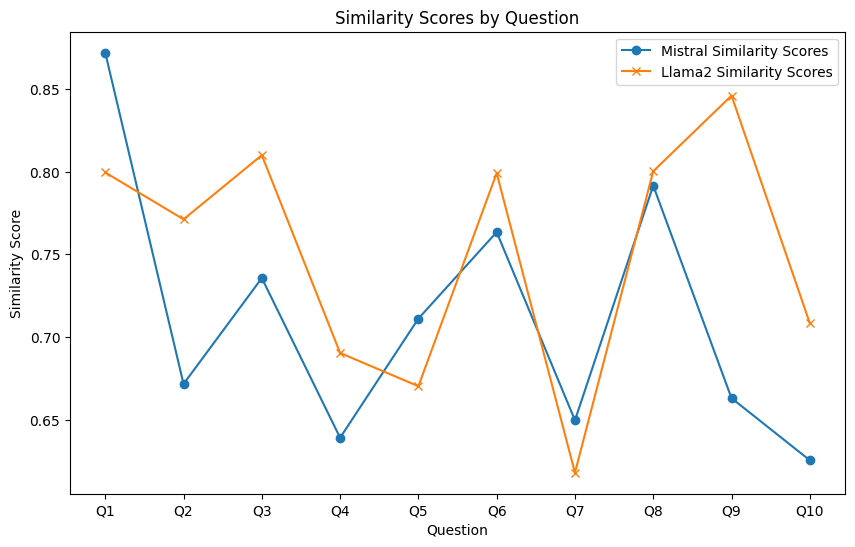

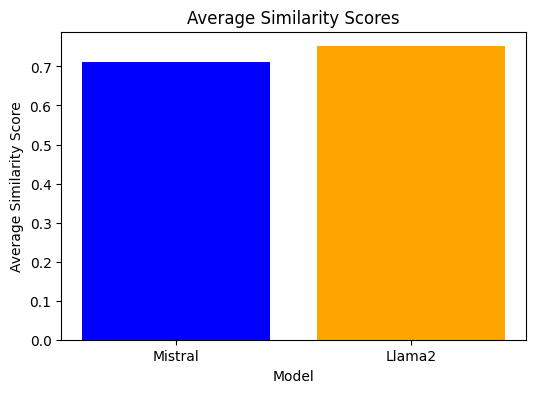

In [47]:
import matplotlib.pyplot as plt

questions = ["Q1", "Q2", "Q3", "Q4", "Q5", "Q6", "Q7", "Q8", "Q9", "Q10"]

# Plotting similarity scores for each model across questions
plt.figure(figsize=(10, 6))
plt.plot(questions, mistral_scores, label='Mistral Similarity Scores', marker='o')
plt.plot(questions, llama2_scores, label='Llama2 Similarity Scores', marker='x')
plt.title('Similarity Scores by Question')
plt.xlabel('Question')
plt.ylabel('Similarity Score')
plt.legend()
plt.show()

# Plotting average similarity scores for both models
average_scores = [np.mean(mistral_scores), np.mean(llama2_scores)]
models = ['Mistral', 'Llama2']

plt.figure(figsize=(6, 4))
plt.bar(models, average_scores, color=['blue', 'orange'])
plt.title('Average Similarity Scores')
plt.xlabel('Model')
plt.ylabel('Average Similarity Score')
plt.show()


# Calulating ROUGE,TER, METEOR -> ngram based metrics on RAG 

The question: What were the consequences of Oppenheimer's personal conflicts and legal challenges on his professional life?

Metrics for Response_experiment1_llama2:
BLEU Score: 0.015958884170211716
ROUGE Scores: {'rouge1': Score(precision=0.10672853828306264, recall=0.6865671641791045, fmeasure=0.18473895582329317), 'rouge2': Score(precision=0.03953488372093023, recall=0.25757575757575757, fmeasure=0.0685483870967742), 'rougeL': Score(precision=0.07192575406032482, recall=0.4626865671641791, fmeasure=0.12449799196787147)}
TER Score: 604.6153846153846
Cosine Similarities: [0.56456407]

Metrics for Response_experiment1_mistral:
BLEU Score: 0.023829991368053163
ROUGE Scores: {'rouge1': Score(precision=0.10311750599520383, recall=0.6417910447761194, fmeasure=0.1776859504132231), 'rouge2': Score(precision=0.038461538461538464, recall=0.24242424242424243, fmeasure=0.06639004149377593), 'rougeL': Score(precision=0.06474820143884892, recall=0.40298507462686567, fmeasure=0.11157024793388431)}


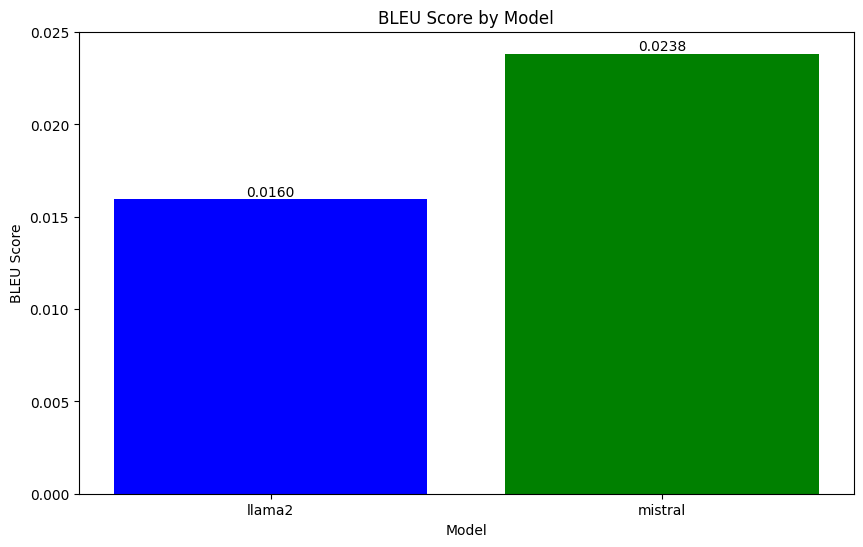

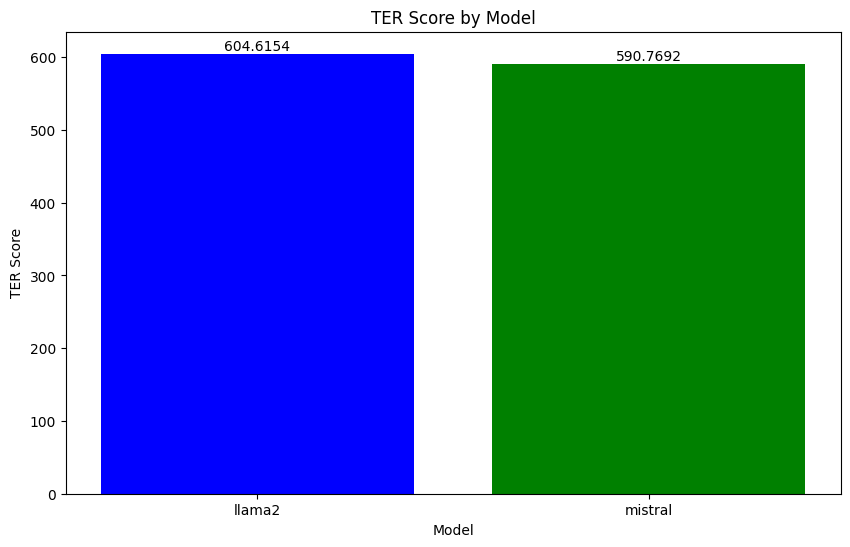

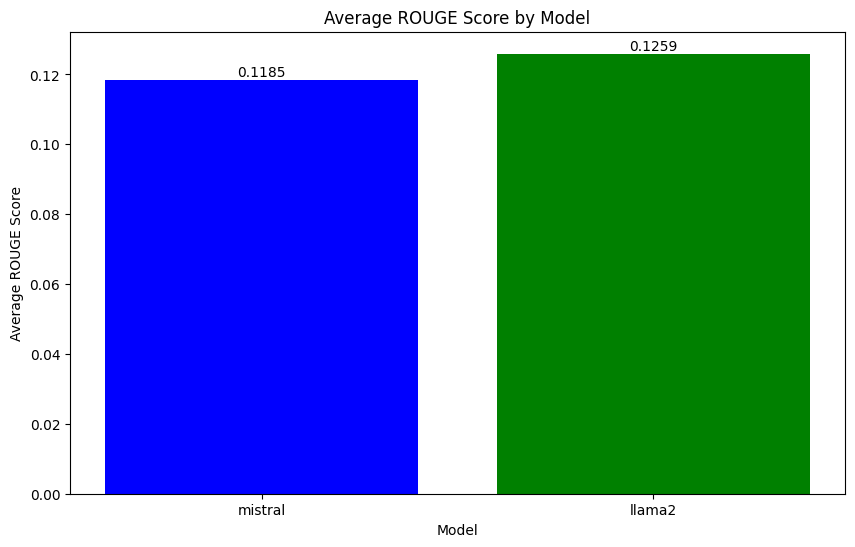

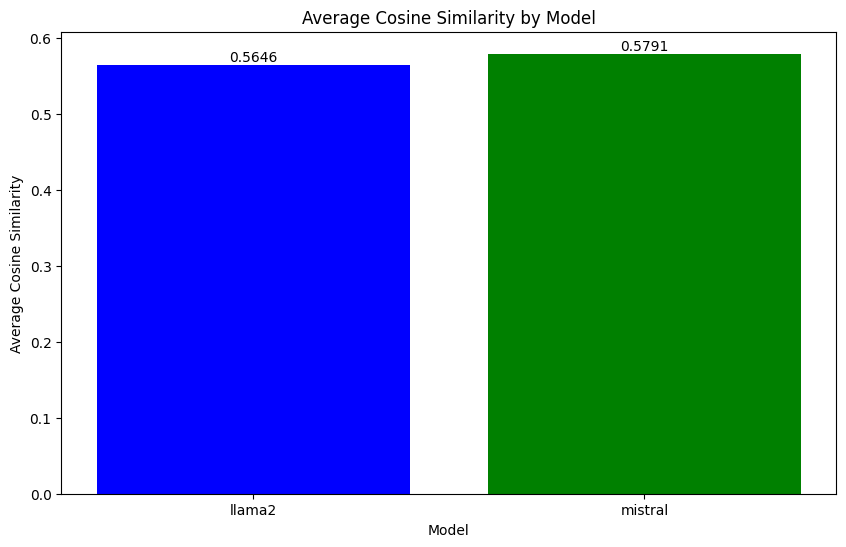

In [53]:
GPT4_reference = OppenheimerQA_verbose["Answer"][0]

import time
from llama_index.llms.ollama import Ollama
from nltk.translate.bleu_score import sentence_bleu
from rouge_score import rouge_scorer
from sacrebleu import corpus_ter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import matplotlib.pyplot as plt

responses = {}
metrics3C = {}

experiments = [
    {'experiment_number': 1, 'model_choice': 'llama2', 'question': OppenheimerQA_verbose['Question'][0]},
    {'experiment_number': 1, 'model_choice': 'mistral', 'question':OppenheimerQA_verbose['Question'][0]},
]

print(f"The question: {experiments[0]['question']}\n")

for experiment in experiments:
    llm = Ollama(model=experiment['model_choice'], request_timeout=30.0)
    start_time = time.time()
    response = llm.complete(experiment['question'],
                            temperature=0.00001,  
                            seed=42)
    end_time = time.time()

    response_key = f"Response_experiment{experiment['experiment_number']}_{experiment['model_choice']}"
    responses[response_key] = response.text

reference_responses = [GPT4_reference]

for key, llm_response in responses.items():
    metrics3C[key] = {}
    bleu_score = sentence_bleu([ref.split() for ref in reference_responses], llm_response.split())
    metrics3C[key]['BLEU Score'] = bleu_score
    scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
    rouge_score = scorer.score(reference_responses[0], llm_response)
    metrics3C[key]['ROUGE Scores'] = rouge_score
    ter_score = corpus_ter([llm_response], [[ref] for ref in reference_responses]).score
    metrics3C[key]['TER Score'] = ter_score
    vectorizer = TfidfVectorizer()
    tfidf = vectorizer.fit_transform([llm_response] + reference_responses)
    cosine_similarities = cosine_similarity(tfidf[0:1], tfidf[1:])
    metrics3C[key]['Cosine Similarities'] = cosine_similarities.flatten()
    
    print(f"Metrics for {key}:")
    print(f"BLEU Score: {bleu_score}")
    print(f"ROUGE Scores: {rouge_score}")
    print(f"TER Score: {ter_score}")
    print(f"Cosine Similarities: {cosine_similarities.flatten()}\n")

visualization_data = {
    'BLEU Score': {},
    'TER Score': {},
    'Average ROUGE Score': {},
    'Average Cosine Similarity': {}
}

for key, values in metrics3C.items():
    model_name = key.split('_')[-1]
    visualization_data['BLEU Score'][model_name] = values['BLEU Score']
    visualization_data['TER Score'][model_name] = values['TER Score']
    average_rouge_score = np.mean([score.fmeasure for score in values['ROUGE Scores'].values()])
    visualization_data['Average ROUGE Score'][model_name] = average_rouge_score
    average_cosine_similarity = np.mean(values['Cosine Similarities'])
    visualization_data['Average Cosine Similarity'][model_name] = average_cosine_similarity

def plot_results(metric_name, results_dict, ascending=True):
    sorted_results = sorted(results_dict.items(), key=lambda x: x[1], reverse=not ascending)
    models = [x[0] for x in sorted_results]
    scores = [x[1] for x in sorted_results]
    plt.figure(figsize=(10, 6))
    plt.bar(models, scores, color=['blue', 'green'])
    plt.title(f'{metric_name} by Model')
    plt.xlabel('Model')
    plt.ylabel(metric_name)
    plt.xticks(models)
    for i, score in enumerate(scores):
        plt.text(i, score, f"{score:.4f}", ha = 'center', va = 'bottom')
    plt.show()

# Plot each metric
for metric_name, results_dict in visualization_data.items():
    if metric_name == 'TER Score':
        plot_results(metric_name, results_dict, ascending=False)  # Lower TER Score is better, hence reverse sorting
    else:
        plot_results(metric_name, results_dict)


In [58]:
import time
import numpy as np
import os
from sentence_transformers import SentenceTransformer, util
from llama_index.core import VectorStoreIndex, SimpleDirectoryReader, StorageContext, load_index_from_storage, Settings
from llama_index.core.embeddings import resolve_embed_model
from llama_index.llms.ollama import Ollama

# Path to persistently store the indexed data
Persist_DIR = "./storageBarbie"

# Check if the persistent storage directory exists; if not, initialize and load documents
if not os.path.exists(Persist_DIR):
    print("Initializing storage and loading documents.")
    documents = SimpleDirectoryReader("Data/Barbie").load_data()
    Settings.embed_model = resolve_embed_model("local:BAAI/bge-small-en-v1.5")
    index = VectorStoreIndex.from_documents(documents)
    index.storage_context.persist(persist_dir=Persist_DIR)
else:
    print("Loading existing storage.")
    storage_context = StorageContext.from_defaults(persist_dir=Persist_DIR)
    Settings.embed_model = resolve_embed_model("local:BAAI/bge-small-en-v1.5")
    index = load_index_from_storage(storage_context)

# Load the sentence transformer model
model = SentenceTransformer('all-MiniLM-L6-v2')

mistral_scores = []
llama2_scores = []
mistral_times = []
llama2_times = []

for i in range(len(BarbieQA_verbose["Question"])):
    question = BarbieQA_verbose["Question"][i]
    reference_text = BarbieQA_verbose["Reference Text"][i]

    # Mistral
    start_time = time.time()
    Settings.llm = Ollama(model="mistral", request_timeout=50.0)
    mistral_query_engine = index.as_query_engine()
    mistral_response = mistral_query_engine.query(question)
    mistral_time = time.time() - start_time
    mistral_times.append(mistral_time)

    # Llama2
    start_time = time.time()
    Settings.llm = Ollama(model="llama2", request_timeout=50.0)
    llama2_query_engine = index.as_query_engine()
    llama2_response = llama2_query_engine.query(question)
    llama2_time = time.time() - start_time
    llama2_times.append(llama2_time)

    # Encode the responses and the reference text to get their embeddings
    responses_embeddings = model.encode([mistral_response.response, llama2_response.response], convert_to_tensor=True)
    reference_embedding = model.encode(reference_text, convert_to_tensor=True)

    # Compute semantic similarity scores between the LLM responses and the reference text
    similarity_scores = util.pytorch_cos_sim(responses_embeddings, reference_embedding)

    mistral_scores.append(similarity_scores[0][0].item())
    llama2_scores.append(similarity_scores[1][0].item())

print("Average Mistral Similarity Score:", np.mean(mistral_scores))
print("Average Llama2 Similarity Score:", np.mean(llama2_scores))
print("Average Mistral Response Time:", np.mean(mistral_times))
print("Average Llama2 Response Time:", np.mean(llama2_times))

# Printing individual scores for review
for i in range(len(mistral_scores)):
    print(f"Q{i+1} Mistral Score: {mistral_scores[i]}, Time: {mistral_times[i]}")
    print(f"Q{i+1} Llama2 Score: {llama2_scores[i]}, Time: {llama2_times[i]}")


Loading existing storage.
Average Mistral Similarity Score: 0.7456973373889924
Average Llama2 Similarity Score: 0.7069605737924576
Average Mistral Response Time: 17.024643445014952
Average Llama2 Response Time: 18.785549211502076
Q1 Mistral Score: 0.7591500282287598, Time: 15.677086114883423
Q1 Llama2 Score: 0.601794958114624, Time: 14.544832944869995
Q2 Mistral Score: 0.7420035600662231, Time: 16.89220690727234
Q2 Llama2 Score: 0.783024251461029, Time: 19.907614946365356
Q3 Mistral Score: 0.8257458209991455, Time: 22.950703859329224
Q3 Llama2 Score: 0.7799625396728516, Time: 16.979668855667114
Q4 Mistral Score: 0.783591628074646, Time: 12.443779945373535
Q4 Llama2 Score: 0.681494414806366, Time: 16.09665274620056
Q5 Mistral Score: 0.6516437530517578, Time: 15.553136825561523
Q5 Llama2 Score: 0.5880391001701355, Time: 16.35186195373535
Q6 Mistral Score: 0.5588581562042236, Time: 13.906990051269531
Q6 Llama2 Score: 0.4223744571208954, Time: 12.700421810150146
Q7 Mistral Score: 0.8442165

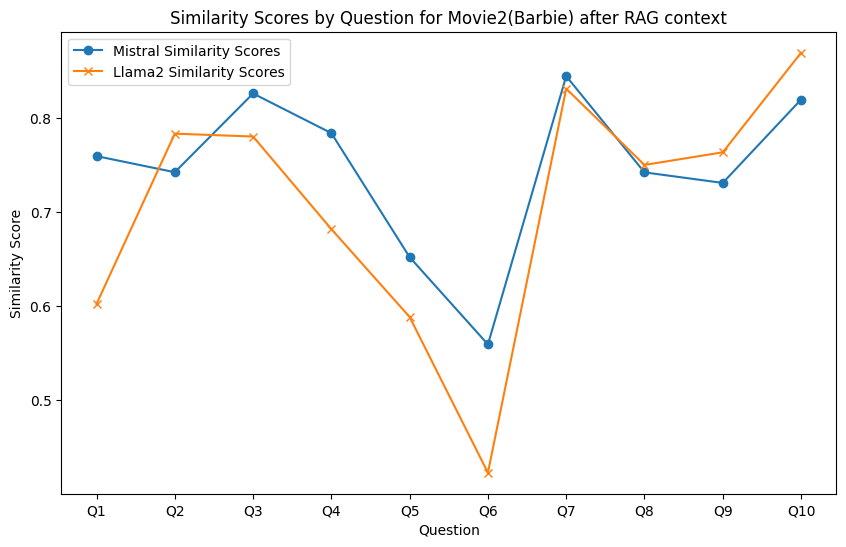

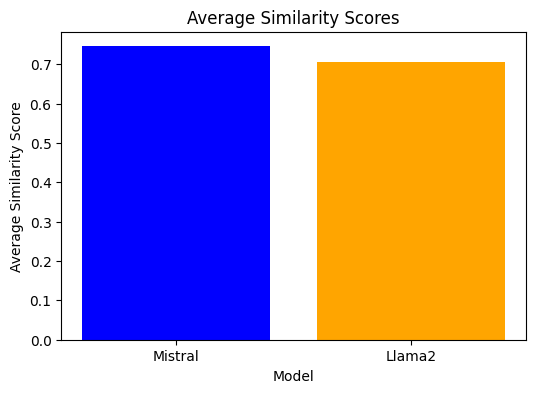

In [59]:
import matplotlib.pyplot as plt

questions = ["Q1", "Q2", "Q3", "Q4", "Q5", "Q6", "Q7", "Q8", "Q9", "Q10"]

# Plotting similarity scores for each model across questions
plt.figure(figsize=(10, 6))
plt.plot(questions, mistral_scores, label='Mistral Similarity Scores', marker='o')
plt.plot(questions, llama2_scores, label='Llama2 Similarity Scores', marker='x')
plt.title('Similarity Scores by Question for Movie2(Barbie) after RAG context')
plt.xlabel('Question')
plt.ylabel('Similarity Score')
plt.legend()
plt.show()

# Plotting average similarity scores for both models
average_scores = [np.mean(mistral_scores), np.mean(llama2_scores)]
models = ['Mistral', 'Llama2']

plt.figure(figsize=(6, 4))
plt.bar(models, average_scores, color=['blue', 'orange'])
plt.title('Average Similarity Scores')
plt.xlabel('Model')
plt.ylabel('Average Similarity Score')
plt.show()


#### Tasks Now: 

* Getting answers to the questions without RAG -> oppenheimer, Barbie for the same set of questions 

* The correct N-gram based metrics 

* BERT score with/without context 

* Semantic similarity score 

### NO RAG BArbie Semantic Search 


In [60]:
BarbieQA_verbose


Question  \
0  Who tries to breakdance at Barbie Margot's party?   
1  What does Barbie Margot think about dying duri...   
2      What is Ken Ryan Gosling's idea of his house?   
3  What does the Mattel CEO prioritize over busin...   
4       How does Barbie Margot feel after her party?   
5  What unusual event happens to Barbie in the mo...   
6  What change does Barbie Margot notice about he...   
7  What happens when Barbie Margot visits Weird B...   
8  How does Ken Ryan Gosling react to the concept...   
9  What does Barbie Margot find challenging in th...   

                                      Reference Text  
0  During the big block party hosted by Barbie Ma...  
1  In the midst of the vibrant party atmosphere, ...  
2  Ken Ryan Gosling, asserting dominance over the...  
3  The Mattel CEO passionately declares that his ...  
4  Following the joyous and lively party, Barbie ...  
5  Barbie Margot experiences a series of bizarre ...  
6  While enjoying time at the beach, Barbie Margo...  
7  Upon visiting Weird Barbie's abode, Barbie Mar...  
8  Ken Ryan Gosling, after learning about the con...  
9  Barbie Margot finds navigating the real world ...

Average Mistral Similarity Score: 0.6256033718585968
Average Llama2 Similarity Score: 0.5225253939628601
Average Mistral Response Time: 10.79869327545166
Average Llama2 Response Time: 10.679584789276124
Q1 Mistral Score: 0.5479571223258972, Time: 6.817567825317383
Q1 Llama2 Score: 0.22274473309516907, Time: 9.669497966766357
Q2 Mistral Score: 0.7225247025489807, Time: 7.4177329540252686
Q2 Llama2 Score: 0.30313679575920105, Time: 6.844143867492676
Q3 Mistral Score: 0.5728834867477417, Time: 8.383773803710938
Q3 Llama2 Score: 0.532555878162384, Time: 8.672595977783203
Q4 Mistral Score: 0.6100215315818787, Time: 16.032420873641968
Q4 Llama2 Score: 0.551831066608429, Time: 14.957640886306763
Q5 Mistral Score: 0.5853098034858704, Time: 8.179199934005737
Q5 Llama2 Score: 0.6348353624343872, Time: 5.887156009674072
Q6 Mistral Score: 0.6099534034729004, Time: 7.984480857849121
Q6 Llama2 Score: 0.4066513776779175, Time: 13.82422399520874
Q7 Mistral Score: 0.5979772806167603, Time: 6.8395078182

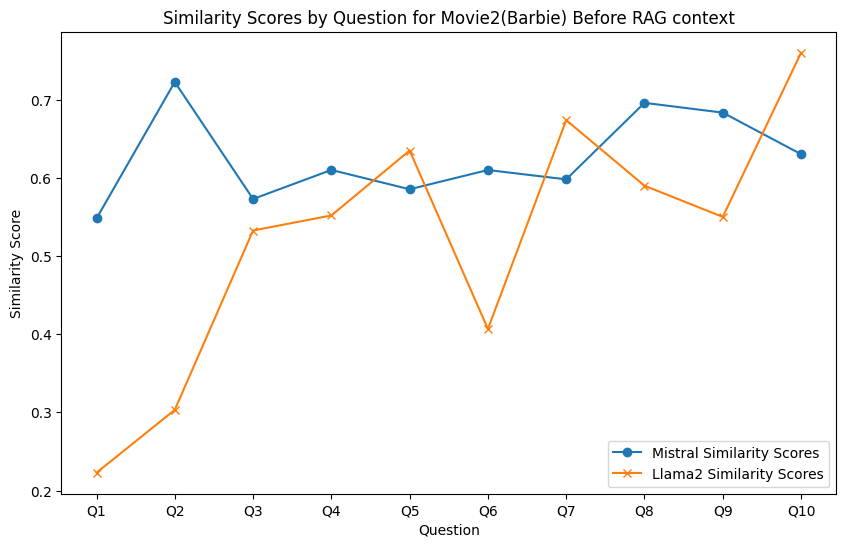

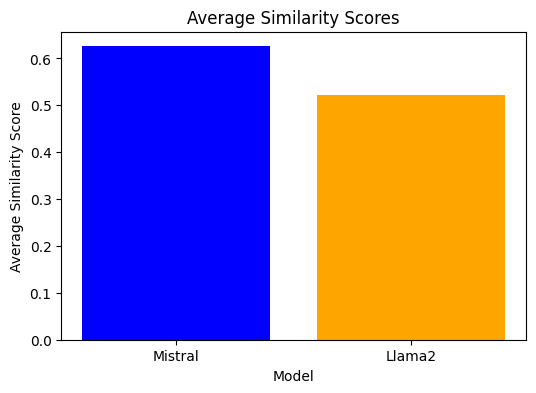

In [68]:
import time
import numpy as np
from sentence_transformers import SentenceTransformer, util
from llama_index.core import VectorStoreIndex, Settings
from llama_index.llms.ollama import Ollama
import pandas as pd
import matplotlib.pyplot as plt

# Load the sentence transformer model
model = SentenceTransformer('all-MiniLM-L6-v2')

NO_RAG_Barbie_mistral_scores = []
NO_RAG_Barbie_llama2_scores = []
NO_RAG_Barbie_mistral_times = []
NO_RAG_Barbie_llama2_times = []
NO_RAG_Barbie_mistral_responses = []
NO_RAG_Barbie_llama2_responses = []


for i in range(len(BarbieQA_verbose)):
    question = BarbieQA_verbose.loc[i, "Question"]
    reference_text = BarbieQA_verbose.loc[i, "Reference Text"]

    # Mistral
    start_time = time.time()
    mistral_llm = Ollama(model="mistral", request_timeout=40.0)
    NO_RAG_BARBIE_mistral_response = mistral_llm.complete(question)
    mistral_time = time.time() - start_time
    NO_RAG_Barbie_mistral_times.append(mistral_time)
    NO_RAG_Barbie_mistral_responses.append(NO_RAG_BARBIE_mistral_response)
    # Llama2
    start_time = time.time()
    llama2_llm = Ollama(model="llama2", request_timeout=40.0)
    NO_RAG_BARBIE_llama2_response = llama2_llm.complete(question)
    llama2_time = time.time() - start_time
    NO_RAG_Barbie_llama2_times.append(llama2_time)
    NO_RAG_Barbie_llama2_responses.append(NO_RAG_BARBIE_llama2_response)

    # Encode the responses and the reference text to get their embeddings
    responses_embeddings = model.encode([NO_RAG_BARBIE_mistral_response.text, NO_RAG_BARBIE_llama2_response.text], convert_to_tensor=True)
    reference_embedding = model.encode(reference_text, convert_to_tensor=True)

    # Compute semantic similarity scores between the LLM responses and the reference text
    similarity_scores = util.pytorch_cos_sim(responses_embeddings, reference_embedding)

    NO_RAG_Barbie_mistral_scores.append(similarity_scores[0][0].item())
    NO_RAG_Barbie_llama2_scores.append(similarity_scores[1][0].item())

print("Average Mistral Similarity Score:", np.mean(NO_RAG_Barbie_mistral_scores))
print("Average Llama2 Similarity Score:", np.mean(NO_RAG_Barbie_llama2_scores))
print("Average Mistral Response Time:", np.mean(NO_RAG_Barbie_mistral_times))
print("Average Llama2 Response Time:", np.mean(NO_RAG_Barbie_llama2_times))

# Printing individual scores for review
for i in range(len(NO_RAG_Barbie_mistral_scores)):
    print(f"Q{i+1} Mistral Score: {NO_RAG_Barbie_mistral_scores[i]}, Time: {NO_RAG_Barbie_mistral_times[i]}")
    print(f"Q{i+1} Llama2 Score: {NO_RAG_Barbie_llama2_scores[i]}, Time: {NO_RAG_Barbie_llama2_times[i]}")



questions = ["Q1", "Q2", "Q3", "Q4", "Q5", "Q6", "Q7", "Q8", "Q9", "Q10"]

# Plotting similarity scores for each model across questions
plt.figure(figsize=(10, 6))
plt.plot(questions, NO_RAG_Barbie_mistral_scores, label='Mistral Similarity Scores', marker='o')
plt.plot(questions, NO_RAG_Barbie_llama2_scores, label='Llama2 Similarity Scores', marker='x')
plt.title('Similarity Scores by Question for Movie2(Barbie) Before RAG context')
plt.xlabel('Question')
plt.ylabel('Similarity Score')
plt.legend()
plt.show()

# Plotting average similarity scores for both models
NO_RAG_BARBIE_average_scores = [np.mean(NO_RAG_Barbie_mistral_scores), np.mean(NO_RAG_Barbie_llama2_scores)]
models = ['Mistral', 'Llama2']

plt.figure(figsize=(6, 4))
plt.bar(models, NO_RAG_BARBIE_average_scores, color=['blue', 'orange'])
plt.title('Average Similarity Scores')
plt.xlabel('Model')
plt.ylabel('Average Similarity Score')
plt.show()


### NO RAG testing for Oppenheimer 

Average Mistral Similarity Score: 0.6834441483020782
Average Llama2 Similarity Score: 0.7274106025695801
Average Mistral Response Time: 23.270449686050416
Average Llama2 Response Time: 25.965088844299316
Q1 Mistral Score: 0.6854187846183777, Time: 20.43093991279602
Q1 Llama2 Score: 0.798529863357544, Time: 30.969808101654053
Q2 Mistral Score: 0.8345056176185608, Time: 22.935256958007812
Q2 Llama2 Score: 0.747816801071167, Time: 34.30651879310608
Q3 Mistral Score: 0.6691627502441406, Time: 16.08251428604126
Q3 Llama2 Score: 0.7200425863265991, Time: 18.715944051742554
Q4 Mistral Score: 0.5981384515762329, Time: 26.899202823638916
Q4 Llama2 Score: 0.5998699069023132, Time: 21.8286349773407
Q5 Mistral Score: 0.6215344667434692, Time: 26.802518606185913
Q5 Llama2 Score: 0.6671069860458374, Time: 23.486977100372314
Q6 Mistral Score: 0.6675924062728882, Time: 21.586212158203125
Q6 Llama2 Score: 0.6803927421569824, Time: 25.98727798461914
Q7 Mistral Score: 0.7096282243728638, Time: 24.1597840

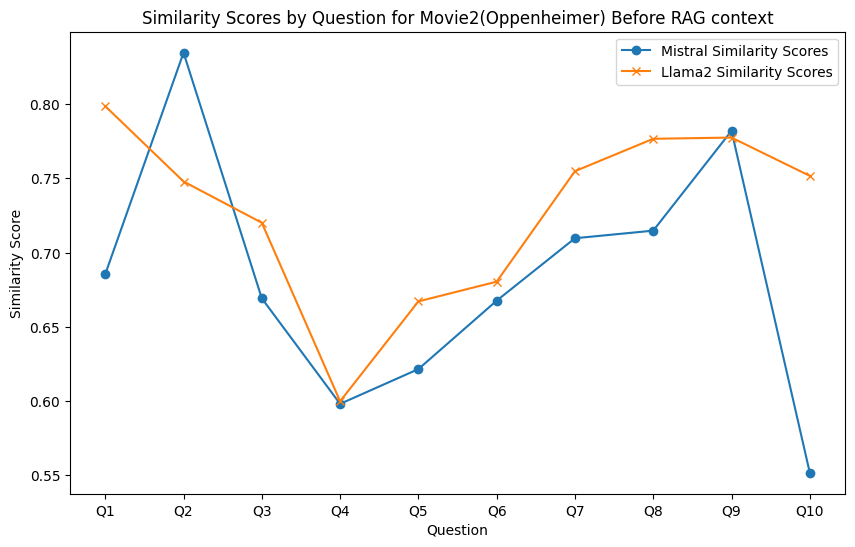

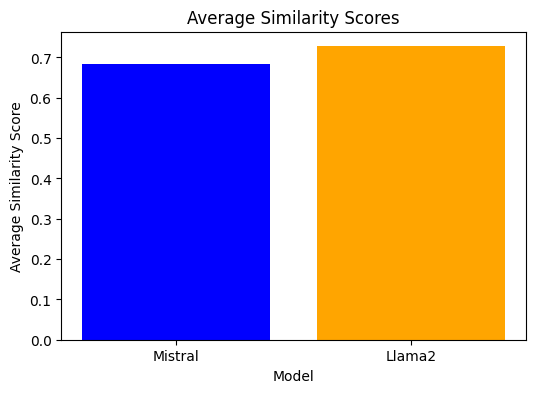

In [70]:
import time
import numpy as np
from sentence_transformers import SentenceTransformer, util
from llama_index.core import VectorStoreIndex, Settings
from llama_index.llms.ollama import Ollama
import pandas as pd
import matplotlib.pyplot as plt

# Load the sentence transformer model
model = SentenceTransformer('all-MiniLM-L6-v2')

NO_RAG_Oppenheimer_mistral_scores = []
NO_RAG_Oppenheimer_llama2_scores = []
NO_RAG_Oppenheimer_mistral_times = []
NO_RAG_Oppenheimer_llama2_times = []
NO_RAG_Oppenheimer_mistral_responses = []
NO_RAG_Oppenheimer_llama2_responses = []

for i in range(len(OppenheimerQA_verbose)):
    question = OppenheimerQA_verbose.loc[i, "Question"]
    reference_text = OppenheimerQA_verbose.loc[i, "Answer"]

    # Mistral
    start_time = time.time()
    mistral_llm = Ollama(model="mistral", request_timeout=40.0)
    NO_RAG_Oppenheimer_mistral_response = mistral_llm.complete(question)
    mistral_time = time.time() - start_time
    NO_RAG_Oppenheimer_mistral_times.append(mistral_time)
    NO_RAG_Oppenheimer_mistral_responses.append(NO_RAG_Oppenheimer_mistral_response)

    # Llama2
    start_time = time.time()
    llama2_llm = Ollama(model="llama2", request_timeout=40.0)
    NO_RAG_Oppenheimer_llama2_response = llama2_llm.complete(question)
    llama2_time = time.time() - start_time
    NO_RAG_Oppenheimer_llama2_times.append(llama2_time)
    NO_RAG_Oppenheimer_llama2_responses.append(NO_RAG_Oppenheimer_llama2_response)

    # Encode the responses and the reference text to get their embeddings
    responses_embeddings = model.encode([NO_RAG_Oppenheimer_mistral_response.text, NO_RAG_Oppenheimer_llama2_response.text], convert_to_tensor=True)
    reference_embedding = model.encode(reference_text, convert_to_tensor=True)

    # Compute semantic similarity scores between the LLM responses and the reference text
    similarity_scores = util.pytorch_cos_sim(responses_embeddings, reference_embedding)

    NO_RAG_Oppenheimer_mistral_scores.append(similarity_scores[0][0].item())
    NO_RAG_Oppenheimer_llama2_scores.append(similarity_scores[1][0].item())

print("Average Mistral Similarity Score:", np.mean(NO_RAG_Oppenheimer_mistral_scores))
print("Average Llama2 Similarity Score:", np.mean(NO_RAG_Oppenheimer_llama2_scores))
print("Average Mistral Response Time:", np.mean(NO_RAG_Oppenheimer_mistral_times))
print("Average Llama2 Response Time:", np.mean(NO_RAG_Oppenheimer_llama2_times))

# Printing individual scores for review
for i in range(len(NO_RAG_Oppenheimer_mistral_scores)):
    print(f"Q{i+1} Mistral Score: {NO_RAG_Oppenheimer_mistral_scores[i]}, Time: {NO_RAG_Oppenheimer_mistral_times[i]}")
    print(f"Q{i+1} Llama2 Score: {NO_RAG_Oppenheimer_llama2_scores[i]}, Time: {NO_RAG_Oppenheimer_llama2_times[i]}")



questions = ["Q1", "Q2", "Q3", "Q4", "Q5", "Q6", "Q7", "Q8", "Q9", "Q10"]

# Plotting similarity scores for each model across questions
plt.figure(figsize=(10, 6))
plt.plot(questions, NO_RAG_Oppenheimer_mistral_scores, label='Mistral Similarity Scores', marker='o')
plt.plot(questions, NO_RAG_Oppenheimer_llama2_scores, label='Llama2 Similarity Scores', marker='x')
plt.title('Similarity Scores by Question for Movie2(Oppenheimer) Before RAG context')
plt.xlabel('Question')
plt.ylabel('Similarity Score')
plt.legend()
plt.show()

# Plotting average similarity scores for both models
NO_RAG_Oppenheimer_average_scores = [np.mean(NO_RAG_Oppenheimer_mistral_scores), np.mean(NO_RAG_Oppenheimer_llama2_scores)]
models = ['Mistral', 'Llama2']

plt.figure(figsize=(6, 4))
plt.bar(models, NO_RAG_Oppenheimer_average_scores, color=['blue', 'orange'])
plt.title('Average Similarity Scores')
plt.xlabel('Model')
plt.ylabel('Average Similarity Score')
plt.show()


In [67]:
type(NO_RAG_BARBIE_mistral_response.text)


str

In [62]:
llm = Ollama(model= "llama2",request_timeout=30.0)
resp = llm.complete(BarbieQA_verbose["Question"][0])

print (resp)


Barbie Margot's party is a fancy dress ball, and everyone in attendance is dressed to impress. However, there is one guest who stands out from the rest with their bold and daring outfit. It's none other than Breakdance Benny, the breakdancing sensation from the local park!

Benny has decided to take his talents to the next level by performing a breathtaking breakdancing routine at Barbie Margot's party. He's dressed in his signature neon green and orange outfit, complete with a pair of oversized sunglasses and a fedora hat.

As the music starts, Breakdance Benny springs into action, flipping and spinning across the dance floor with ease. His moves are smooth and fluid, and he impresses the crowd with his incredible flexibility and coordination.

Despite the fancy dress theme of the party, Breakdance Benny is the real star of the show. His breakdancing skills are unmatched, and he steals the spotlight with his daring and creative routine. Barbie Margot and her guests are wowed by Benny

In [63]:
llm = Ollama(model= "mistral",request_timeout=30.0)
resp = llm.complete(BarbieQA_verbose["Question"][0])

print (resp)

 I cannot answer that question directly as there is no specific information provided about Barbie Margot or her party in relation to breakdancing. Breakdancing is a type of street dance that originated in the United States in the 1970s, but there is no indication that it is related to any particular person named Barbie Margot or her party. If you have more information about this context, please provide it so I can help answer your question.


# BERT SCORE WOrkings 

In [75]:
from bert_score import score
from llama_index.llms.ollama import Ollama

i=0
# Initialize Ollama with Mistral model
ollama = Ollama(model="mistral", request_timeout=30.0)

# Define the prompt and generate a response
prompt = BarbieQA_verbose['Question'][i]
response = ollama.complete(prompt)

# Load reference texts
model_responses = [response.text]
reference_texts = [BarbieQA_verbose['Reference Text'][i]]  

# Calculate BERTscore
P, R, F1 = score(model_responses, reference_texts, lang="en", verbose=True, model_type="distilbert-base-uncased")

# Display BERTScore
for i in range(len(model_responses)):
    print(f"Response {i+1}:")
    print(f"\tPrecision: {P[i].item():.3f}")
    print(f"\tRecall: {R[i].item():.3f}")
    print(f"\tF1 Score: {F1[i].item():.3f}")


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 19.61it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 881.16it/s]

done in 0.05 seconds, 18.45 sentences/sec
Response 1:
	Precision: 0.716
	Recall: 0.745
	F1 Score: 0.730


## Barbie Mistral BERT 

In [78]:
import pandas as pd
from bert_score import score
# Assuming Ollama can be initialized as shown, though it's a conceptual representation
from llama_index.llms.ollama import Ollama


# Initialize Ollama with the Mistral model
ollama = Ollama(model="mistral", request_timeout=30.0)

# Lists to store results
Mistral_responses_BERT = []
Mistral_BERT_P_scores = []
Mistral_BERT_R_scores = []
Mistral_BERT_F1_scores = []

for i in range(len(BarbieQA_verbose)):
    # Generate response for each question
    prompt = BarbieQA_verbose['Question'][i]
    response = ollama.complete(prompt)

    # Store the response text
    Mistral_responses_BERT.append(response.text)

    # Calculate BERTscore
    P, R, F1 = score([response.text], [BarbieQA_verbose['Reference Text'][i]], lang="en", verbose=True, model_type="distilbert-base-uncased")

    # Store scores
    Mistral_BERT_P_scores.append(P[0].item())
    Mistral_BERT_R_scores.append(R[0].item())
    Mistral_BERT_F1_scores.append(F1[0].item())


# Example of how to create a DataFrame from the stored results
BERT_Mistral_Barbie = pd.DataFrame({
    'Question': BarbieQA_verbose['Question'],
    'Reference Text': BarbieQA_verbose['Reference Text'],
    'Mistral Response': Mistral_responses_BERT,
    'Precision': Mistral_BERT_P_scores,
    'Recall': Mistral_BERT_R_scores,
    'F1 Score': Mistral_BERT_F1_scores
})


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 28.16it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 995.09it/s]

done in 0.04 seconds, 26.04 sentences/sec


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 19.85it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 728.94it/s]

done in 0.05 seconds, 18.41 sentences/sec


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 20.69it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 896.60it/s]

done in 0.05 seconds, 19.44 sentences/sec


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 15.07it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 982.04it/s]

done in 0.07 seconds, 14.46 sentences/sec


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 23.78it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 950.66it/s]

done in 0.05 seconds, 22.05 sentences/sec


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 30.12it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 855.28it/s]

done in 0.04 seconds, 27.61 sentences/sec


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 12.27it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 714.41it/s]

done in 0.09 seconds, 11.76 sentences/sec


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 10.14it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 520.84it/s]

done in 0.10 seconds, 9.68 sentences/sec


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 19.68it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 690.65it/s]

done in 0.05 seconds, 18.34 sentences/sec


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  9.36it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 433.47it/s]

done in 0.11 seconds, 8.98 sentences/sec


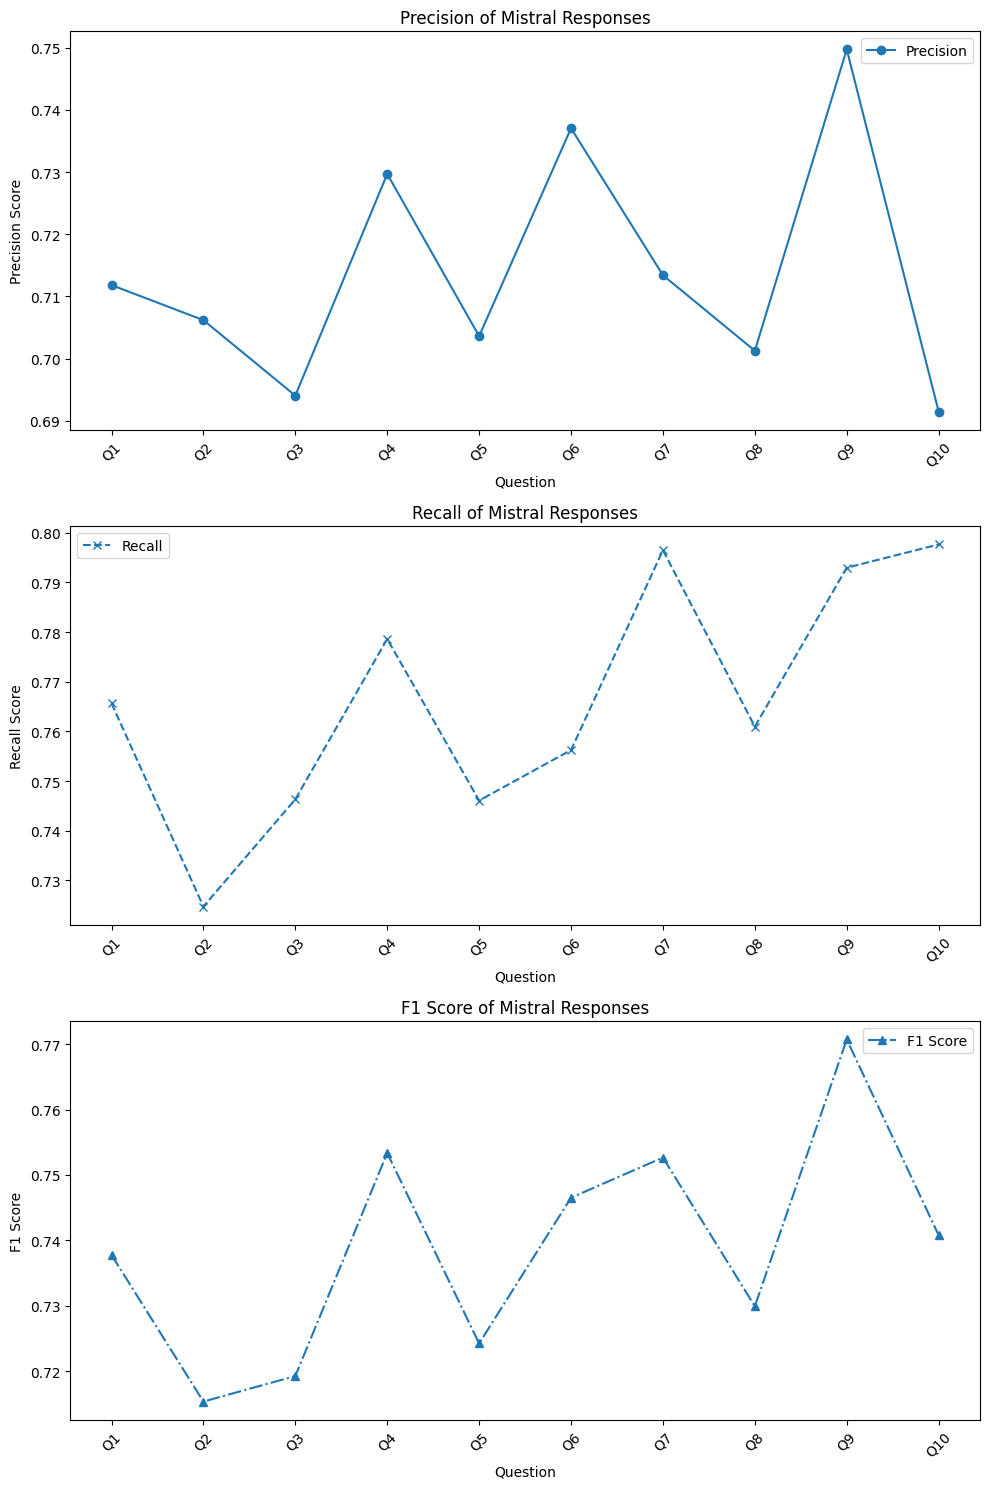

In [82]:
import matplotlib.pyplot as plt

# Assuming BERT_Mistral_Barbie DataFrame exists with the required data

# Generate question numbers based on the length of the DataFrame
question_numbers = [f'Q{i+1}' for i in range(len(BERT_Mistral_Barbie))]

# Plotting Precision, Recall, and F1 Scores for Mistral Model Responses
fig, ax = plt.subplots(3, 1, figsize=(10, 15))

# Precision
ax[0].plot(question_numbers, BERT_Mistral_Barbie['Precision'], label='Precision', marker='o', linestyle='-')
ax[0].set_title('Precision of Mistral Responses')
ax[0].set_xlabel('Question')
ax[0].set_ylabel('Precision Score')
ax[0].tick_params(axis='x', rotation=45)
ax[0].legend()

# Recall
ax[1].plot(question_numbers, BERT_Mistral_Barbie['Recall'], label='Recall', marker='x', linestyle='--')
ax[1].set_title('Recall of Mistral Responses')
ax[1].set_xlabel('Question')
ax[1].set_ylabel('Recall Score')
ax[1].tick_params(axis='x', rotation=45)
ax[1].legend()

# F1 Score
ax[2].plot(question_numbers, BERT_Mistral_Barbie['F1 Score'], label='F1 Score', marker='^', linestyle='-.')
ax[2].set_title('F1 Score of Mistral Responses')
ax[2].set_xlabel('Question')
ax[2].set_ylabel('F1 Score')
ax[2].tick_params(axis='x', rotation=45)
ax[2].legend()

plt.tight_layout()
plt.show()


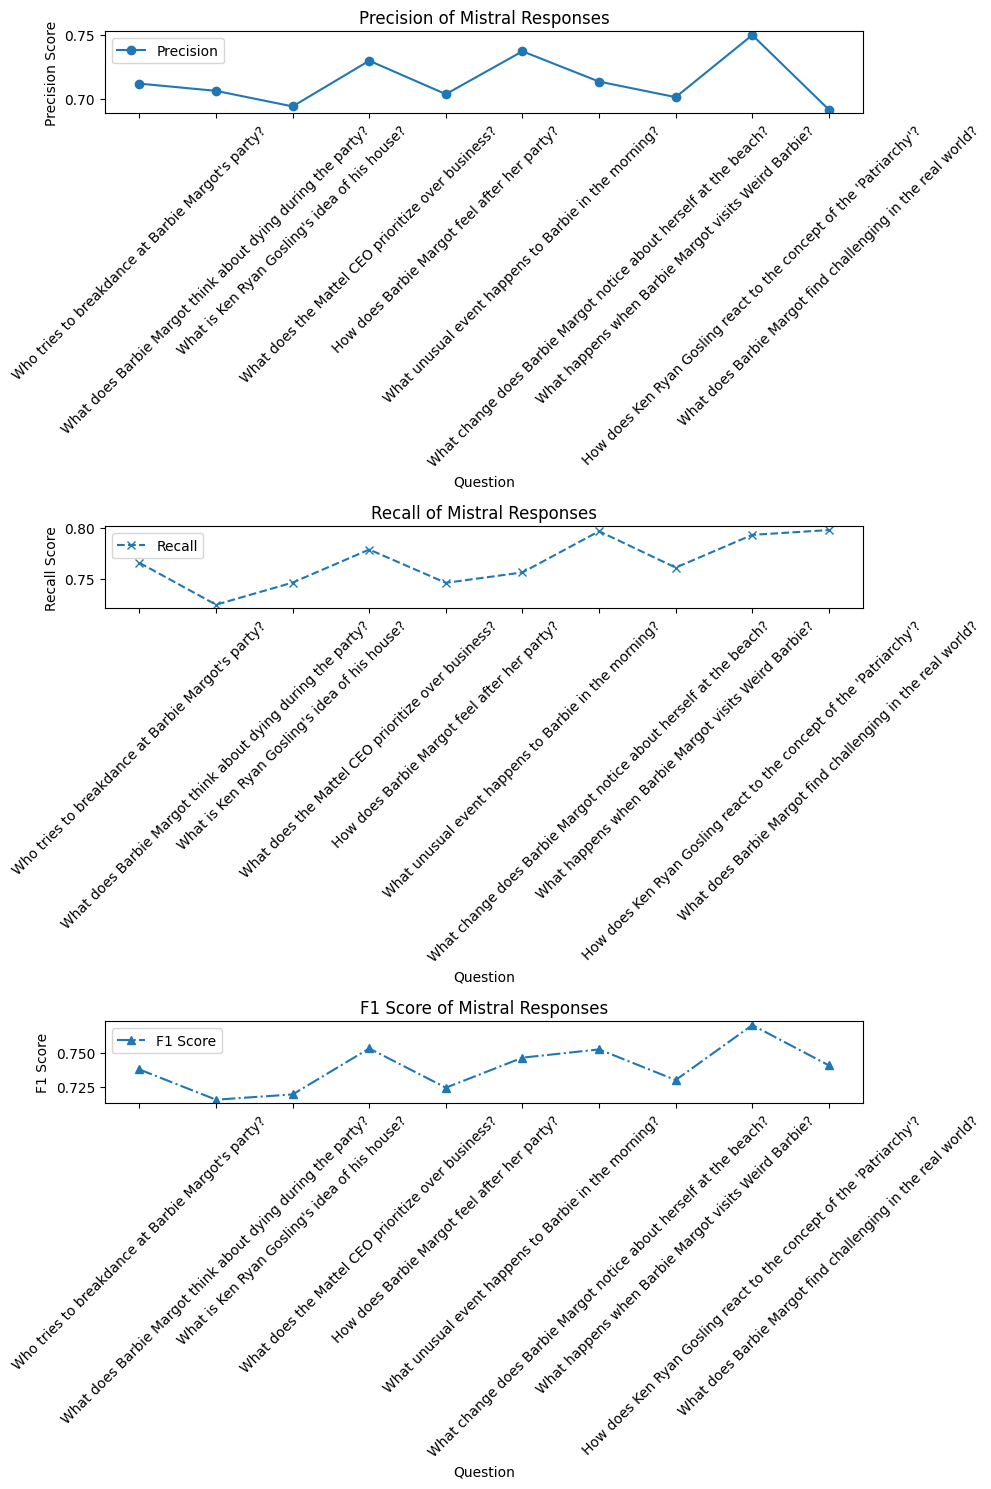

In [80]:
import matplotlib.pyplot as plt

# Assuming BERT_Mistral_Barbie DataFrame exists with the required data

# Plotting Precision, Recall, and F1 Scores for Mistral Model Responses
fig, ax = plt.subplots(3, 1, figsize=(10, 15))

# Precision
ax[0].plot(BERT_Mistral_Barbie['Question'], BERT_Mistral_Barbie['Precision'], label='Precision', marker='o', linestyle='-')
ax[0].set_title('Precision of Mistral Responses')
ax[0].set_xlabel('Question')
ax[0].set_ylabel('Precision Score')
ax[0].tick_params(axis='x', rotation=45)
ax[0].legend()

# Recall
ax[1].plot(BERT_Mistral_Barbie['Question'], BERT_Mistral_Barbie['Recall'], label='Recall', marker='x', linestyle='--')
ax[1].set_title('Recall of Mistral Responses')
ax[1].set_xlabel('Question')
ax[1].set_ylabel('Recall Score')
ax[1].tick_params(axis='x', rotation=45)
ax[1].legend()

# F1 Score
ax[2].plot(BERT_Mistral_Barbie['Question'], BERT_Mistral_Barbie['F1 Score'], label='F1 Score', marker='^', linestyle='-.')
ax[2].set_title('F1 Score of Mistral Responses')
ax[2].set_xlabel('Question')
ax[2].set_ylabel('F1 Score')
ax[2].tick_params(axis='x', rotation=45)
ax[2].legend()

plt.tight_layout()
plt.show()


## Barbie Llama BERT 

In [79]:
import pandas as pd
from bert_score import score
# Assuming Ollama can be initialized as shown, though it's a conceptual representation
from llama_index.llms.ollama import Ollama


# Initialize Ollama with the Llama model
ollama = Ollama(model="llama2", request_timeout=30.0)

# Lists to store results
Llama_responses_BERT = []
Llama_BERT_P_scores = []
Llama_BERT_R_scores = []
Llama_BERT_F1_scores = []

for i in range(len(BarbieQA_verbose)):
    # Generate response for each question
    prompt = BarbieQA_verbose['Question'][i]
    response = ollama.complete(prompt)

    # Store the response text
    Llama_responses_BERT.append(response.text)

    # Calculate BERTscore
    P, R, F1 = score([response.text], [BarbieQA_verbose['Reference Text'][i]], lang="en", verbose=True, model_type="distilbert-base-uncased")

    # Store scores
    Llama_BERT_P_scores.append(P[0].item())
    Llama_BERT_R_scores.append(R[0].item())
    Llama_BERT_F1_scores.append(F1[0].item())


# Example of how to create a DataFrame from the stored results
BERT_Llama_Barbie = pd.DataFrame({
    'Question': BarbieQA_verbose['Question'],
    'Reference Text': BarbieQA_verbose['Reference Text'],
    'Llama Response': Llama_responses_BERT,
    'Precision': Llama_BERT_P_scores,
    'Recall': Llama_BERT_R_scores,
    'F1 Score': Llama_BERT_F1_scores
})


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 27.18it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 480.06it/s]

done in 0.04 seconds, 23.62 sentences/sec


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 16.12it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 685.34it/s]

done in 0.07 seconds, 15.18 sentences/sec


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 27.91it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 1086.89it/s]

done in 0.04 seconds, 25.85 sentences/sec


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 12.66it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 591.33it/s]

done in 0.08 seconds, 12.00 sentences/sec


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 29.20it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 719.06it/s]

done in 0.04 seconds, 26.30 sentences/sec


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 14.80it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 810.96it/s]

done in 0.07 seconds, 14.16 sentences/sec


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 31.94it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 236.39it/s]

done in 0.04 seconds, 23.39 sentences/sec


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  6.93it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 564.28it/s]

done in 0.15 seconds, 6.76 sentences/sec


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  9.87it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 527.06it/s]

done in 0.11 seconds, 9.44 sentences/sec


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  6.32it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 509.95it/s]

done in 0.16 seconds, 6.18 sentences/sec


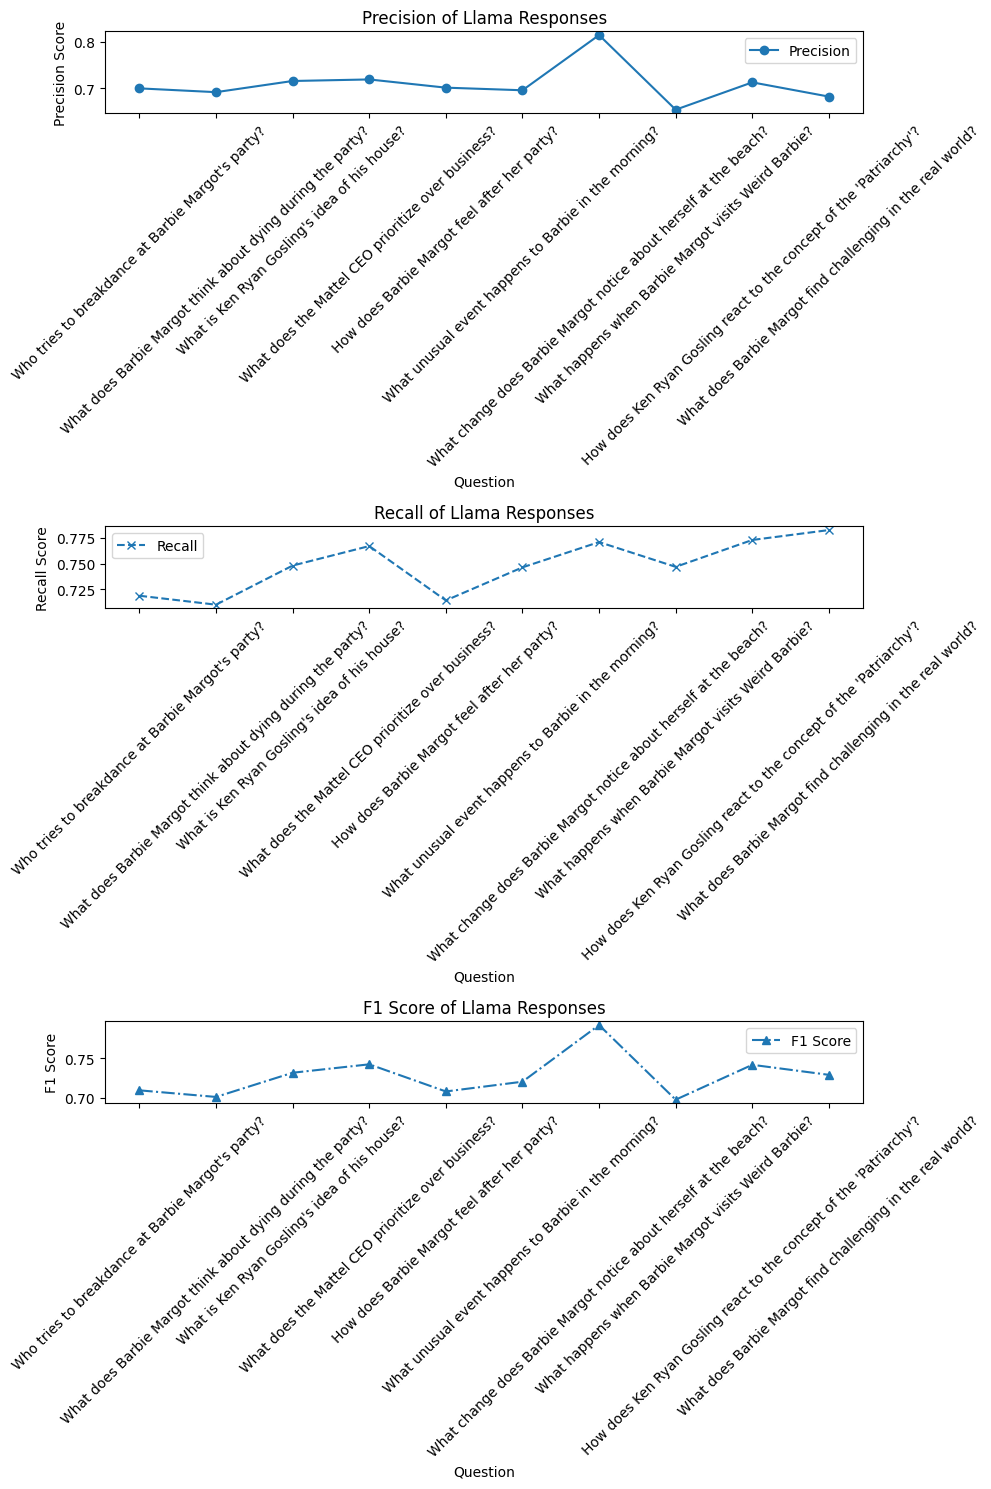

In [81]:
import matplotlib.pyplot as plt

# Assuming BERT_Llama_Barbie DataFrame exists with the required data

# Plotting Precision, Recall, and F1 Scores for Llama Model Responses
fig, ax = plt.subplots(3, 1, figsize=(10, 15))

# Precision
ax[0].plot(BERT_Llama_Barbie['Question'], BERT_Llama_Barbie['Precision'], label='Precision', marker='o', linestyle='-')
ax[0].set_title('Precision of Llama Responses')
ax[0].set_xlabel('Question')
ax[0].set_ylabel('Precision Score')
ax[0].tick_params(axis='x', rotation=45)
ax[0].legend()

# Recall
ax[1].plot(BERT_Llama_Barbie['Question'], BERT_Llama_Barbie['Recall'], label='Recall', marker='x', linestyle='--')
ax[1].set_title('Recall of Llama Responses')
ax[1].set_xlabel('Question')
ax[1].set_ylabel('Recall Score')
ax[1].tick_params(axis='x', rotation=45)
ax[1].legend()

# F1 Score
ax[2].plot(BERT_Llama_Barbie['Question'], BERT_Llama_Barbie['F1 Score'], label='F1 Score', marker='^', linestyle='-.')
ax[2].set_title('F1 Score of Llama Responses')
ax[2].set_xlabel('Question')
ax[2].set_ylabel('F1 Score')
ax[2].tick_params(axis='x', rotation=45)
ax[2].legend()

plt.tight_layout()
plt.show()


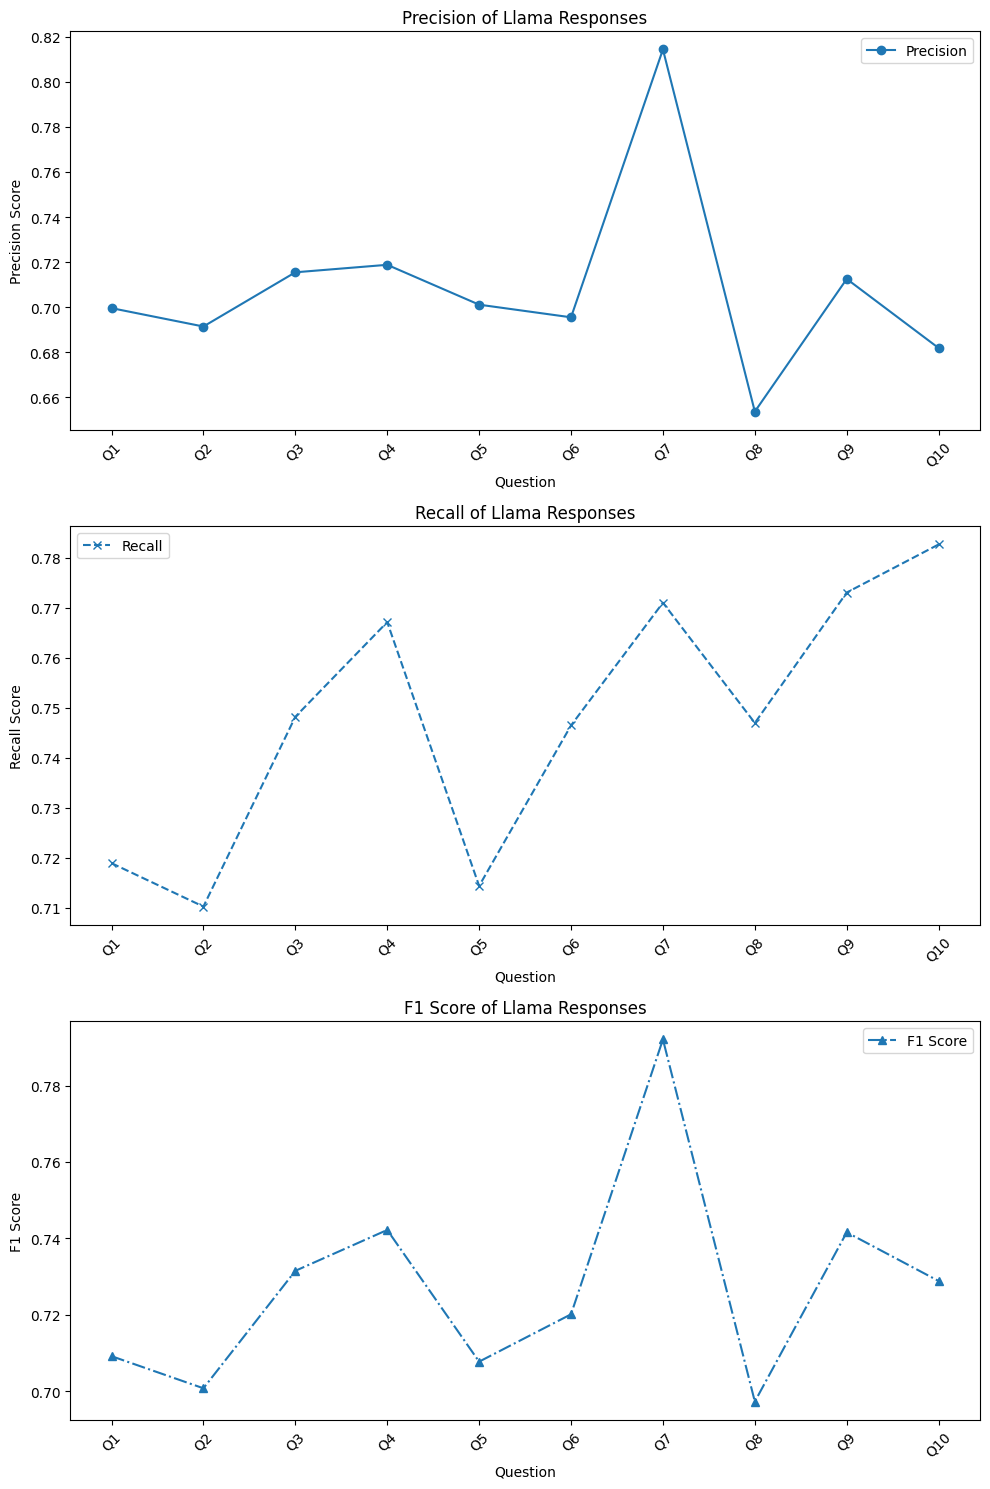

In [83]:
import matplotlib.pyplot as plt

# Assuming BERT_Llama_Barbie DataFrame exists with the required data

# Generate question numbers based on the length of the DataFrame
question_numbers = [f'Q{i+1}' for i in range(len(BERT_Llama_Barbie))]

# Plotting Precision, Recall, and F1 Scores for Llama Model Responses
fig, ax = plt.subplots(3, 1, figsize=(10, 15))

# Precision
ax[0].plot(question_numbers, BERT_Llama_Barbie['Precision'], label='Precision', marker='o', linestyle='-')
ax[0].set_title('Precision of Llama Responses')
ax[0].set_xlabel('Question')
ax[0].set_ylabel('Precision Score')
ax[0].tick_params(axis='x', rotation=45)
ax[0].legend()

# Recall
ax[1].plot(question_numbers, BERT_Llama_Barbie['Recall'], label='Recall', marker='x', linestyle='--')
ax[1].set_title('Recall of Llama Responses')
ax[1].set_xlabel('Question')
ax[1].set_ylabel('Recall Score')
ax[1].tick_params(axis='x', rotation=45)
ax[1].legend()

# F1 Score
ax[2].plot(question_numbers, BERT_Llama_Barbie['F1 Score'], label='F1 Score', marker='^', linestyle='-.')
ax[2].set_title('F1 Score of Llama Responses')
ax[2].set_xlabel('Question')
ax[2].set_ylabel('F1 Score')
ax[2].tick_params(axis='x', rotation=45)
ax[2].legend()

plt.tight_layout()
plt.show()


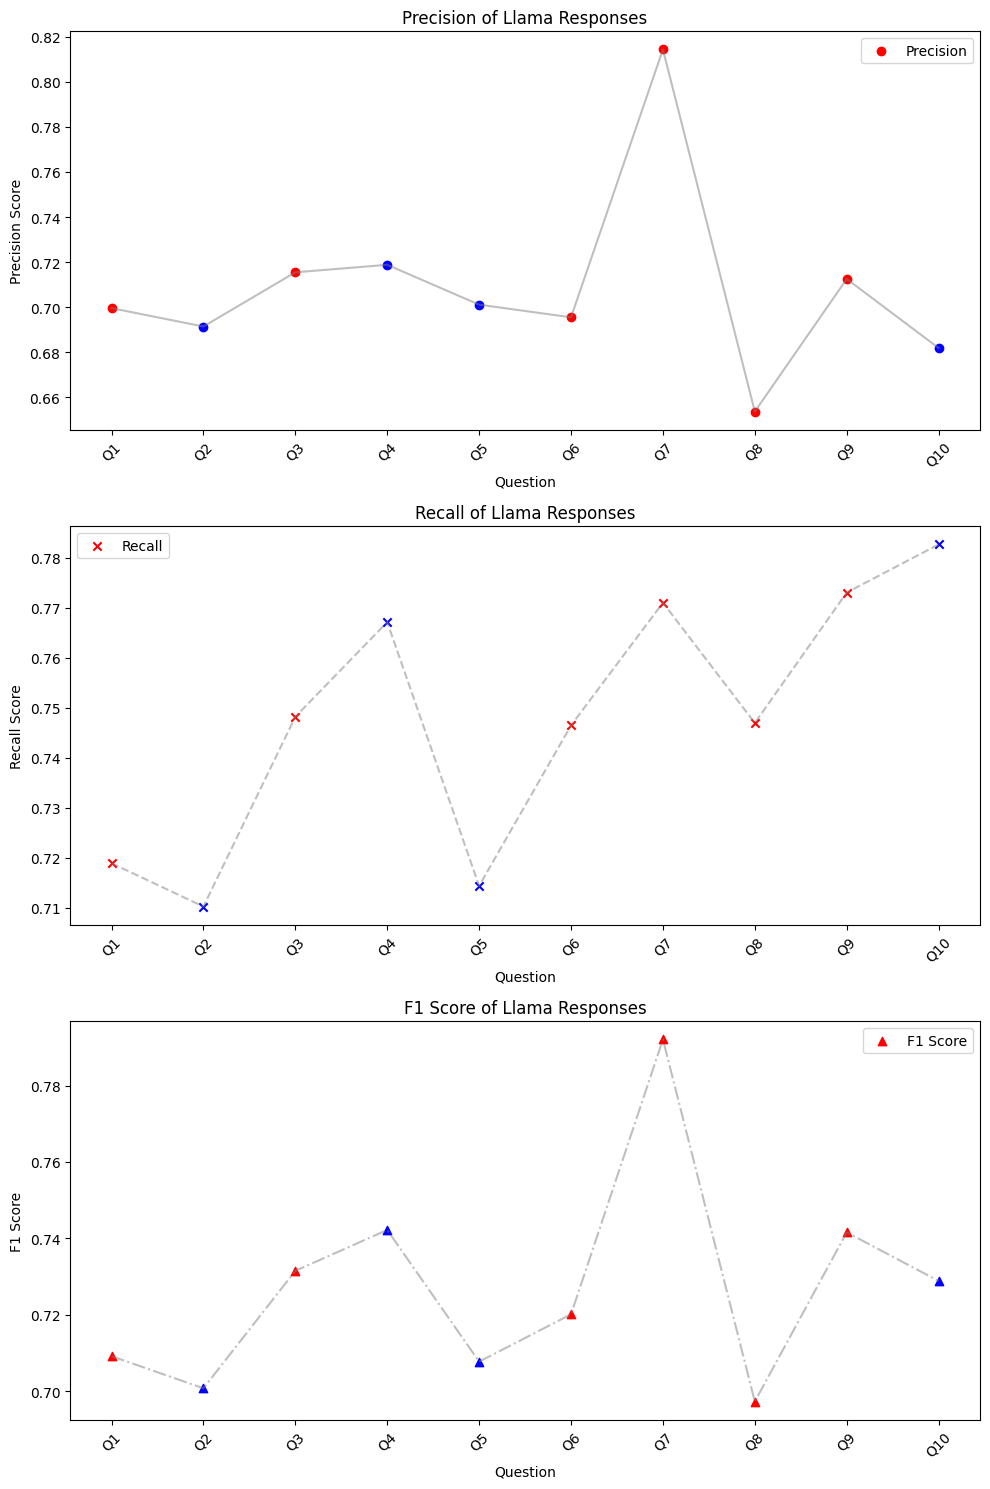

In [98]:
import matplotlib.pyplot as plt

# Assuming BERT_Llama_Barbie DataFrame exists with the required data

# Generate question numbers based on the length of the DataFrame
question_numbers = [f'Q{i+1}' for i in range(len(BERT_Llama_Barbie))]

# Determining the colors for the dots based on Question Kind
colors = ['red' if kind == 'Fact' else 'blue' for kind in Question_kind_Barbie['Question_Kind']]


# Plotting Precision, Recall, and F1 Scores for Llama Model Responses
fig, ax = plt.subplots(3, 1, figsize=(10, 15))

# Precision
for i, color in enumerate(colors):
    ax[0].scatter(question_numbers[i], BERT_Llama_Barbie['Precision'].iloc[i], label='Precision' if i == 0 else "", color=color, marker='o')
ax[0].plot(question_numbers, BERT_Llama_Barbie['Precision'], linestyle='-', color='grey', alpha=0.5)  # Connect points with a line
ax[0].set_title('Precision of Llama Responses')
ax[0].set_xlabel('Question')
ax[0].set_ylabel('Precision Score')
ax[0].tick_params(axis='x', rotation=45)
ax[0].legend()

# Recall
for i, color in enumerate(colors):
    ax[1].scatter(question_numbers[i], BERT_Llama_Barbie['Recall'].iloc[i], label='Recall' if i == 0 else "", color=color, marker='x')
ax[1].plot(question_numbers, BERT_Llama_Barbie['Recall'], linestyle='--', color='grey', alpha=0.5)  # Connect points with a line
ax[1].set_title('Recall of Llama Responses')
ax[1].set_xlabel('Question')
ax[1].set_ylabel('Recall Score')
ax[1].tick_params(axis='x', rotation=45)
ax[1].legend()

# F1 Score
for i, color in enumerate(colors):
    ax[2].scatter(question_numbers[i], BERT_Llama_Barbie['F1 Score'].iloc[i], label='F1 Score' if i == 0 else "", color=color, marker='^')
ax[2].plot(question_numbers, BERT_Llama_Barbie['F1 Score'], linestyle='-.', color='grey', alpha=0.5)  # Connect points with a line
ax[2].set_title('F1 Score of Llama Responses')
ax[2].set_xlabel('Question')
ax[2].set_ylabel('F1 Score')
ax[2].tick_params(axis='x', rotation=45)
ax[2].legend()

plt.tight_layout()
plt.show()


## BERT Llama Oppenheimer 

In [112]:
import pandas as pd
from bert_score import score
# Assuming Ollama can be initialized as shown, though it's a conceptual representation
from llama_index.llms.ollama import Ollama


# Initialize Ollama with the Llama model
ollama = Ollama(model="llama2", request_timeout=30.0)

# Lists to store results
Llama_responses_BERT = []
Llama_BERT_P_scores = []
Llama_BERT_R_scores = []
Llama_BERT_F1_scores = []

for i in range(len(OppenheimerQA_verbose)):
    # Generate response for each question
    prompt = OppenheimerQA_verbose['Question'][i]
    response = ollama.complete(prompt)

    # Store the response text
    Llama_responses_BERT.append(response.text)

    # Calculate BERTscore
    P, R, F1 = score([response.text], [OppenheimerQA_verbose['Answer'][i]], lang="en", verbose=True, model_type="distilbert-base-uncased")

    # Store scores
    Llama_BERT_P_scores.append(P[0].item())
    Llama_BERT_R_scores.append(R[0].item())
    Llama_BERT_F1_scores.append(F1[0].item())


# Example of how to create a DataFrame from the stored results
BERT_Llama_Oppenheimer = pd.DataFrame({
    'Question': OppenheimerQA_verbose['Question'],
    'Answer': OppenheimerQA_verbose['Answer'],
    'Llama Response': Llama_responses_BERT,
    'Precision': Llama_BERT_P_scores,
    'Recall': Llama_BERT_R_scores,
    'F1 Score': Llama_BERT_F1_scores
})


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  5.23it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 129.55it/s]


done in 0.20 seconds, 4.94 sentences/sec
calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  4.89it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 495.78it/s]


done in 0.21 seconds, 4.73 sentences/sec
calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 10.43it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 695.92it/s]

done in 0.10 seconds, 9.87 sentences/sec


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  8.16it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 649.78it/s]

done in 0.13 seconds, 7.94 sentences/sec


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  5.68it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 553.12it/s]

done in 0.18 seconds, 5.47 sentences/sec


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  5.60it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 326.25it/s]

done in 0.19 seconds, 5.35 sentences/sec


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  7.19it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 588.26it/s]

done in 0.14 seconds, 6.99 sentences/sec


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  6.03it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 580.04it/s]

done in 0.17 seconds, 5.89 sentences/sec


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  5.85it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 723.65it/s]

done in 0.17 seconds, 5.72 sentences/sec


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  5.77it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 444.83it/s]

done in 0.18 seconds, 5.61 sentences/sec


In [113]:
import pandas as pd
from bert_score import score
# Assuming Ollama can be initialized as shown, though it's a conceptual representation
from llama_index.llms.ollama import Ollama


# Initialize Ollama with the Llama model
ollama = Ollama(model="mistral", request_timeout=30.0)

# Lists to store results
Mistral_responses_BERT = []
Mistral_BERT_P_scores = []
Mistral_BERT_R_scores = []
Mistral_BERT_F1_scores = []

for i in range(len(OppenheimerQA_verbose)):
    # Generate response for each question
    prompt = OppenheimerQA_verbose['Question'][i]
    response = ollama.complete(prompt)

    # Store the response text
    Mistral_responses_BERT.append(response.text)

    # Calculate BERTscore
    P, R, F1 = score([response.text], [OppenheimerQA_verbose['Answer'][i]], lang="en", verbose=True, model_type="distilbert-base-uncased")

    # Store scores
    Mistral_BERT_P_scores.append(P[0].item())
    Mistral_BERT_R_scores.append(R[0].item())
    Mistral_BERT_F1_scores.append(F1[0].item())


# Example of how to create a DataFrame from the stored results
BERT_Mistral_Oppenheimer = pd.DataFrame({
    'Question': OppenheimerQA_verbose['Question'],
    'Answer': OppenheimerQA_verbose['Answer'],
    'Mistral Response': Mistral_responses_BERT,
    'Precision': Mistral_BERT_P_scores,
    'Recall': Mistral_BERT_R_scores,
    'F1 Score': Mistral_BERT_F1_scores
})


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  7.18it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 533.63it/s]

done in 0.14 seconds, 7.00 sentences/sec


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  6.42it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 615.36it/s]

done in 0.16 seconds, 6.27 sentences/sec


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  8.73it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 477.55it/s]

done in 0.12 seconds, 8.38 sentences/sec


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  7.46it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 445.49it/s]

done in 0.14 seconds, 7.24 sentences/sec


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  5.73it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 744.46it/s]

done in 0.18 seconds, 5.62 sentences/sec


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  7.97it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 471.27it/s]

done in 0.13 seconds, 7.73 sentences/sec


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  7.22it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 456.85it/s]

done in 0.14 seconds, 6.98 sentences/sec


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  8.25it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 692.93it/s]

done in 0.12 seconds, 8.02 sentences/sec


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  6.14it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 498.49it/s]

done in 0.17 seconds, 5.98 sentences/sec


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  5.24it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 692.59it/s]

done in 0.19 seconds, 5.13 sentences/sec


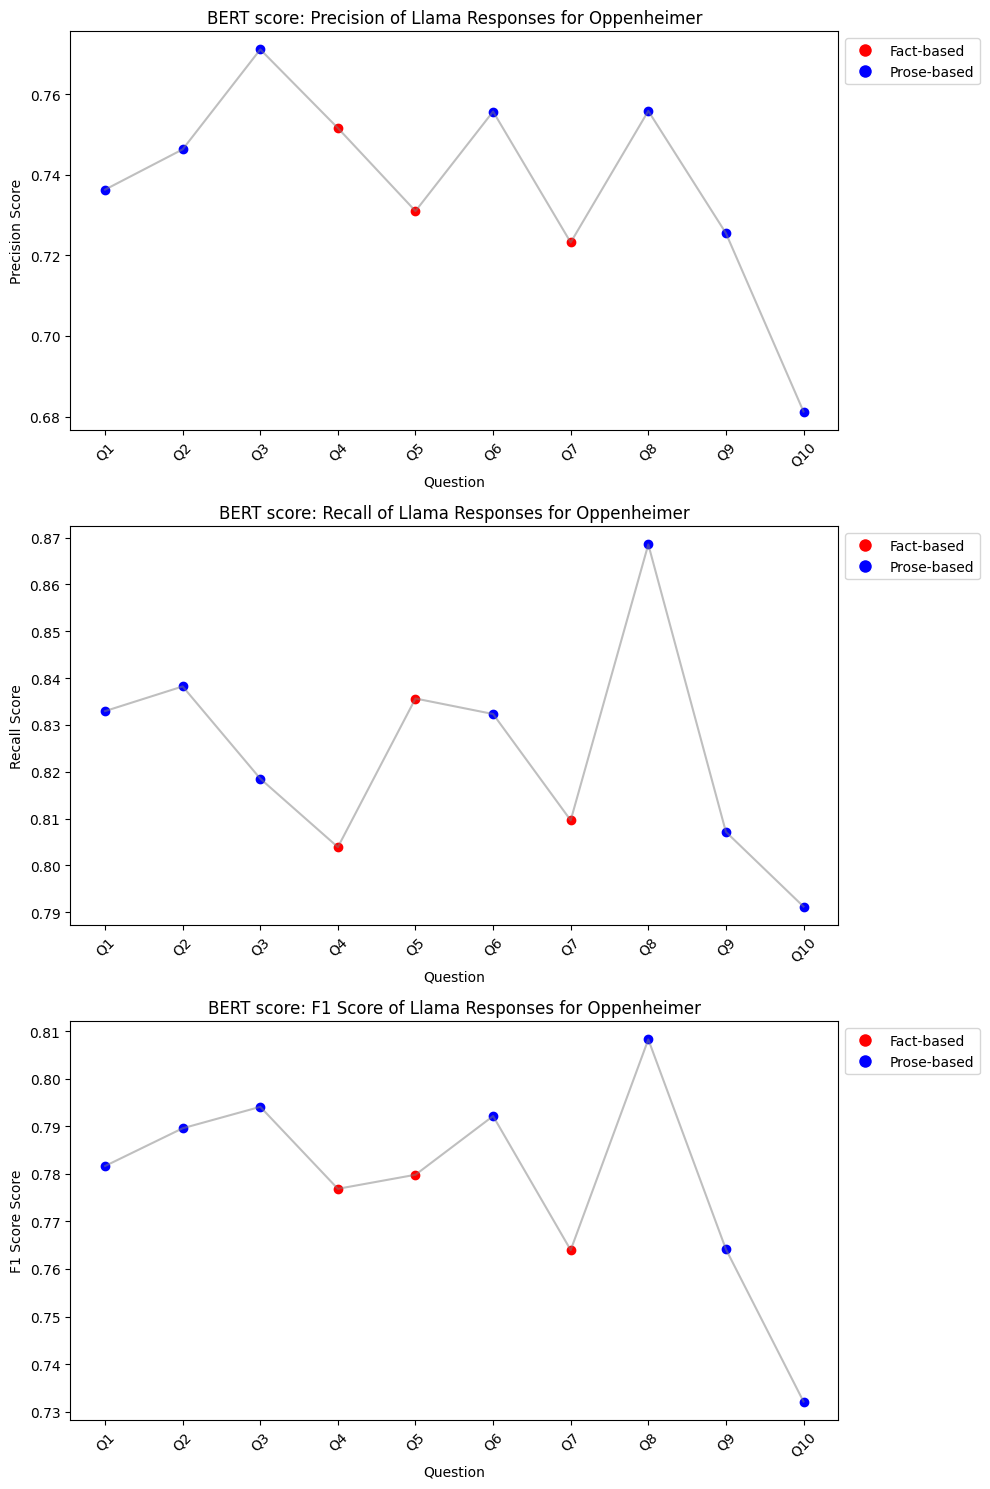

In [114]:
import matplotlib.pyplot as plt

# Assuming BERT_Llama_Oppenheimer DataFrame exists with the required data
# Assuming Question_kind_Oppenheimer DataFrame or a similar structure for question kinds

# Generate question numbers based on the length of the DataFrame
question_numbers = [f'Q{i+1}' for i in range(len(BERT_Llama_Oppenheimer))]

# Assuming colors are determined based on Question Kind from a DataFrame like Question_kind_Oppenheimer
colors = ['red' if kind == 'Fact' else 'blue' for kind in Question_kind_Oppenheimer['Question_Kind']]

# Plotting Precision, Recall, and F1 Scores for Llama Model Responses
fig, ax = plt.subplots(3, 1, figsize=(10, 15))

# Custom legend items
score_legend_items = [plt.Line2D([0], [0], color='grey', lw=2, linestyle='-', label='Precision'),
                      plt.Line2D([0], [0], color='grey', lw=2, linestyle='--', label='Recall'),
                      plt.Line2D([0], [0], color='grey', lw=2, linestyle='-.', label='F1 Score')]
question_kind_legend_items = [plt.Line2D([0], [0], marker='o', color='w', label='Fact-based',
                          markerfacecolor='red', markersize=10),
                          plt.Line2D([0], [0], marker='o', color='w', label='Prose-based',
                          markerfacecolor='blue', markersize=10)]

# Plotting each metric with its corresponding color for each question
metrics = ['Precision', 'Recall', 'F1 Score']
for ax_idx, metric in enumerate(metrics):
    for i, color in enumerate(colors):
        ax[ax_idx].scatter(question_numbers[i], BERT_Llama_Oppenheimer[metric].iloc[i], color=color, marker='o')
    ax[ax_idx].plot(question_numbers, BERT_Llama_Oppenheimer[metric], linestyle='-', color='grey', alpha=0.5)  # Connecting points
    ax[ax_idx].set_title(f'BERT score: {metric} of Llama Responses for Oppenheimer')
    ax[ax_idx].set_xlabel('Question')
    ax[ax_idx].set_ylabel(f'{metric} Score')
    ax[ax_idx].tick_params(axis='x', rotation=45)

# Adding custom legends to the plot
for ax_single in ax:
    question_kind_legend = ax_single.legend(handles=question_kind_legend_items, loc='lower left')
    ax_single.legend(handles=question_kind_legend_items, loc='upper left', bbox_to_anchor=(1,1))

plt.tight_layout()
plt.show()


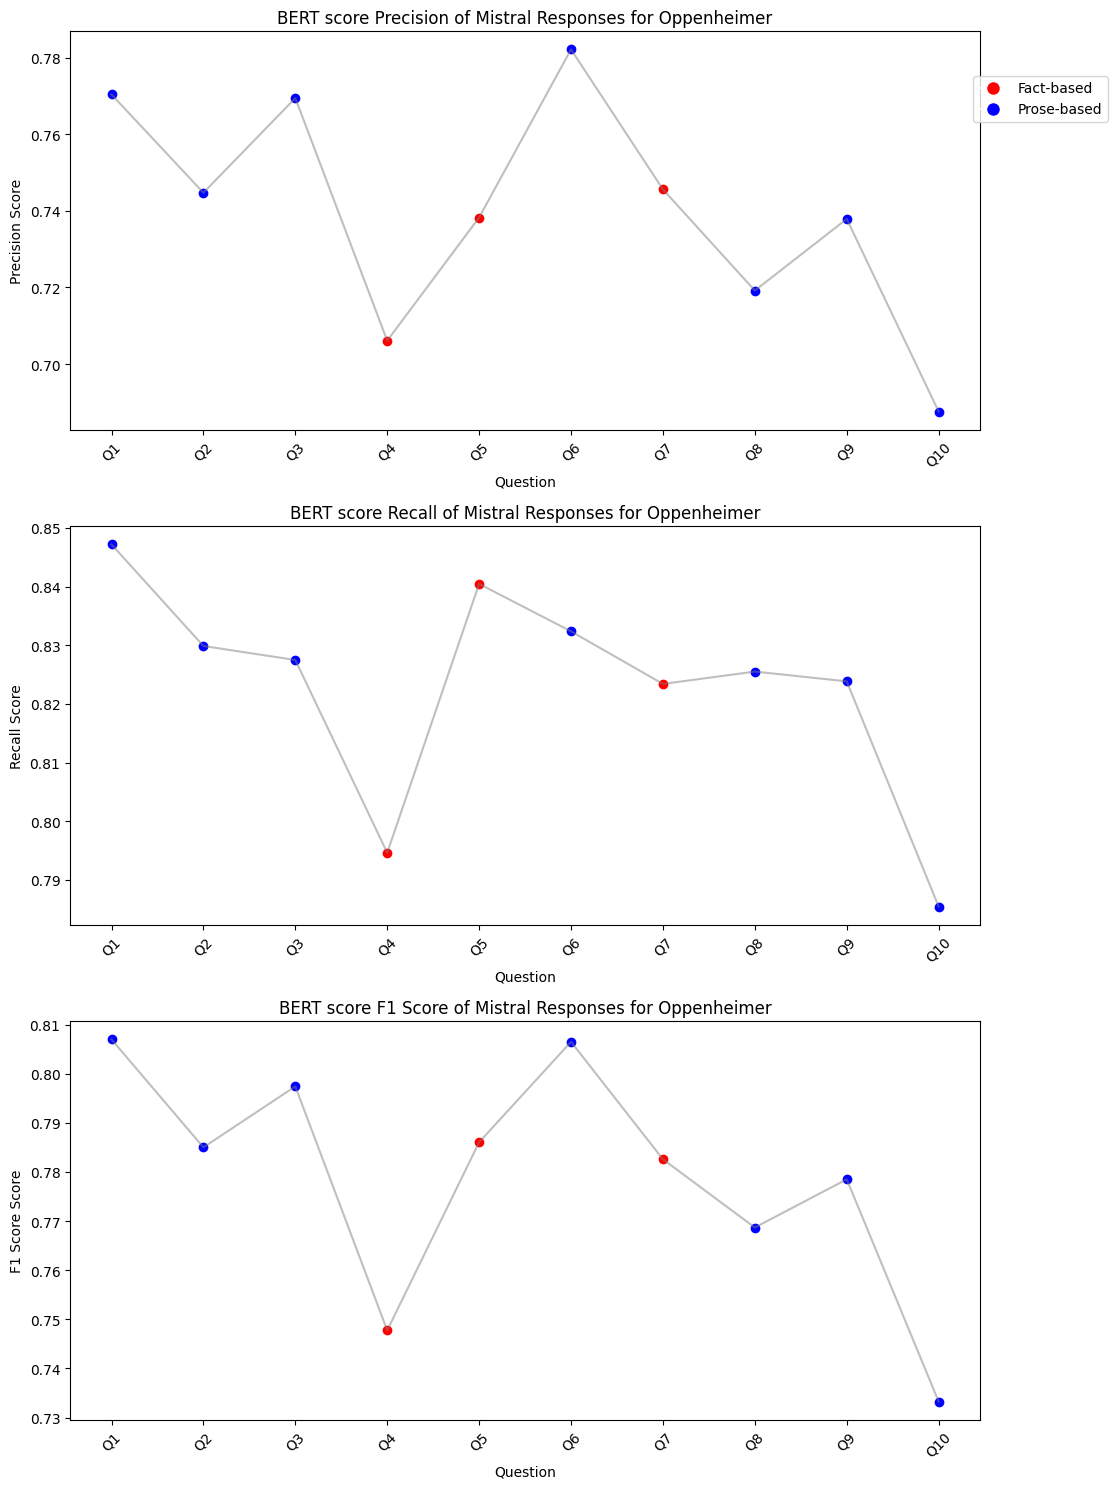

In [115]:
import matplotlib.pyplot as plt

# Assuming BERT_Mistral_Oppenheimer DataFrame exists with the required data
# Assuming Question_kind_Oppenheimer DataFrame or a similar structure for question kinds

# Generate question numbers based on the length of the DataFrame
question_numbers = [f'Q{i+1}' for i in range(len(BERT_Mistral_Oppenheimer))]

# Determining the colors for the dots based on Question Kind
colors = ['red' if kind == 'Fact' else 'blue' for kind in Question_kind_Oppenheimer['Question_Kind']]

# Plotting Precision, Recall, and F1 Scores for Mistral Model Responses
fig, ax = plt.subplots(3, 1, figsize=(10, 15))

# Defining plotting for each metric
metrics = ['Precision', 'Recall', 'F1 Score']
for i, metric in enumerate(metrics):
    # Scatter plot with color coding for question type
    for q_num, color in zip(question_numbers, colors):
        ax[i].scatter(q_num, BERT_Mistral_Oppenheimer[metric].iloc[question_numbers.index(q_num)], color=color, marker='o')
    # Connect the dots with grey lines for visual clarity
    ax[i].plot(question_numbers, BERT_Mistral_Oppenheimer[metric], linestyle='-', color='grey', alpha=0.5)
    ax[i].set_title(f'BERT score {metric} of Mistral Responses for Oppenheimer')
    ax[i].set_xlabel('Question')
    ax[i].set_ylabel(f'{metric} Score')
    ax[i].tick_params(axis='x', rotation=45)

# Creating custom legend for question kinds
question_kind_legend_items = [plt.Line2D([0], [0], marker='o', color='w', label='Fact-based', markerfacecolor='red', markersize=10),
                              plt.Line2D([0], [0], marker='o', color='w', label='Prose-based', markerfacecolor='blue', markersize=10)]
fig.legend(handles=question_kind_legend_items, loc='upper right', bbox_to_anchor=(1.12, 0.95))

plt.tight_layout()
plt.show()


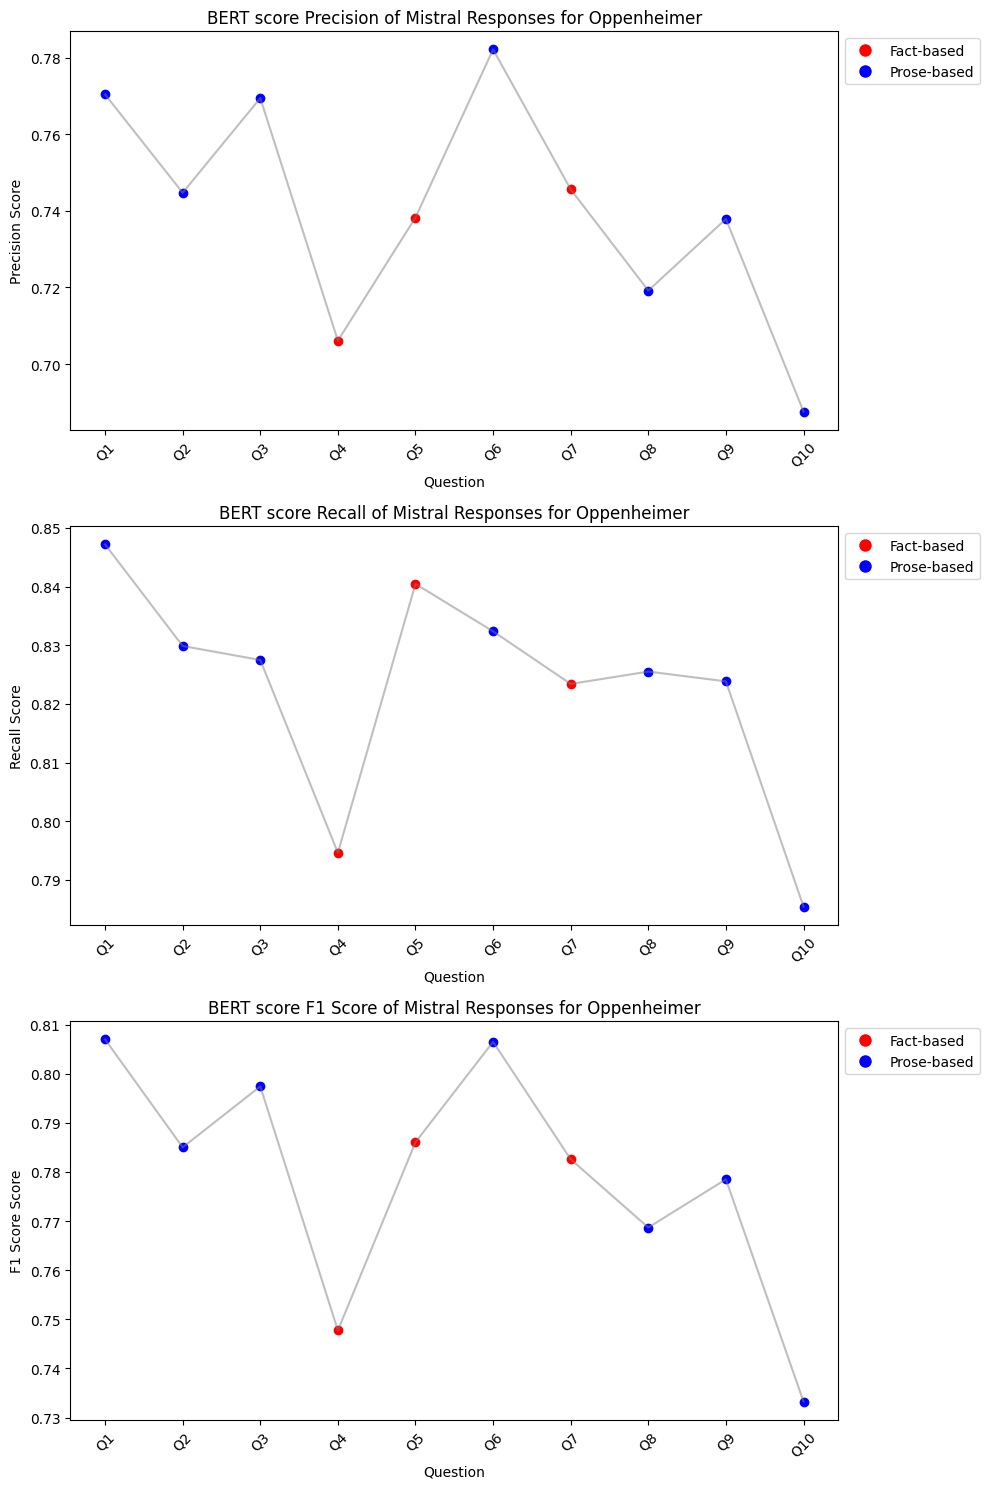

In [117]:
import matplotlib.pyplot as plt

# Assuming BERT_Mistral_Oppenheimer DataFrame exists with the required data
# Assuming Question_kind_Oppenheimer DataFrame or a similar structure for question kinds

# Generate question numbers based on the length of the DataFrame
question_numbers = [f'Q{i+1}' for i in range(len(BERT_Mistral_Oppenheimer))]

# Assuming colors are determined based on Question Kind from a DataFrame like Question_kind_Oppenheimer
colors = ['red' if kind == 'Fact' else 'blue' for kind in Question_kind_Oppenheimer['Question_Kind']]

# Plotting Precision, Recall, and F1 Scores for Mistral Model Responses
fig, ax = plt.subplots(3, 1, figsize=(10, 15))

# Custom legend items
score_legend_items = [plt.Line2D([0], [0], color='grey', lw=2, linestyle='-', label='Precision'),
                      plt.Line2D([0], [0], color='grey', lw=2, linestyle='--', label='Recall'),
                      plt.Line2D([0], [0], color='grey', lw=2, linestyle='-.', label='F1 Score')]
question_kind_legend_items = [plt.Line2D([0], [0], marker='o', color='w', label='Fact-based',
                          markerfacecolor='red', markersize=10),
                          plt.Line2D([0], [0], marker='o', color='w', label='Prose-based',
                          markerfacecolor='blue', markersize=10)]

# Plotting each metric with its corresponding color for each question
metrics = ['Precision', 'Recall', 'F1 Score']
for ax_idx, metric in enumerate(metrics):
    for i, color in enumerate(colors):
        ax[ax_idx].scatter(question_numbers[i], BERT_Mistral_Oppenheimer[metric].iloc[i], color=color, marker='o')
    ax[ax_idx].plot(question_numbers, BERT_Mistral_Oppenheimer[metric], linestyle='-', color='grey', alpha=0.5)  # Connecting points
    ax[ax_idx].set_title(f'BERT score {metric} of Mistral Responses for Oppenheimer')
    ax[ax_idx].set_xlabel('Question')
    ax[ax_idx].set_ylabel(f'{metric} Score')
    ax[ax_idx].tick_params(axis='x', rotation=45)

# Adding custom legends to the plot
for ax_single in ax:
    question_kind_legend = ax_single.legend(handles=question_kind_legend_items, loc='lower left')
    ax_single.legend(handles=question_kind_legend_items, loc='upper left', bbox_to_anchor=(1,1))

plt.tight_layout()
plt.show()


# Trying out more graphs with BERT 

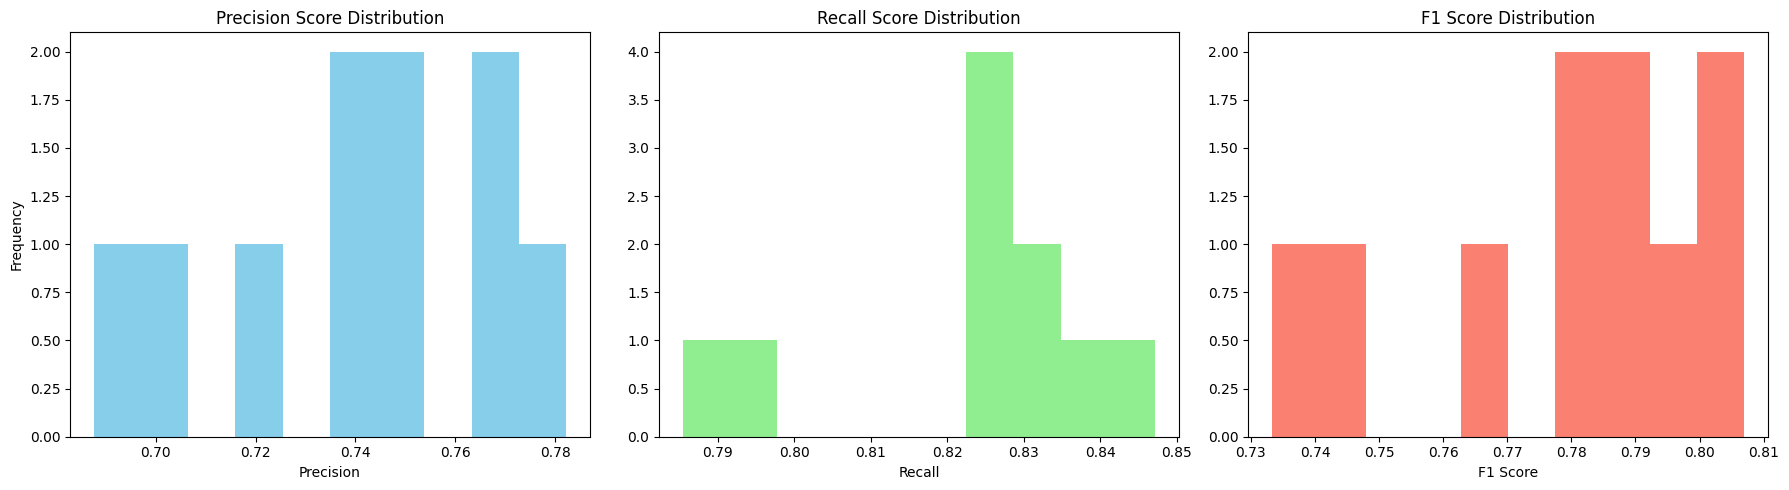

In [121]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
axes[0].hist(BERT_Mistral_Oppenheimer['Precision'], bins=10, color='skyblue')
axes[0].set_title('Precision Score Distribution')
axes[0].set_xlabel('Precision')
axes[0].set_ylabel('Frequency')

axes[1].hist(BERT_Mistral_Oppenheimer['Recall'], bins=10, color='lightgreen')
axes[1].set_title('Recall Score Distribution')
axes[1].set_xlabel('Recall')

axes[2].hist(BERT_Mistral_Oppenheimer['F1 Score'], bins=10, color='salmon')
axes[2].set_title('F1 Score Distribution')
axes[2].set_xlabel('F1 Score')

plt.tight_layout()
plt.show()


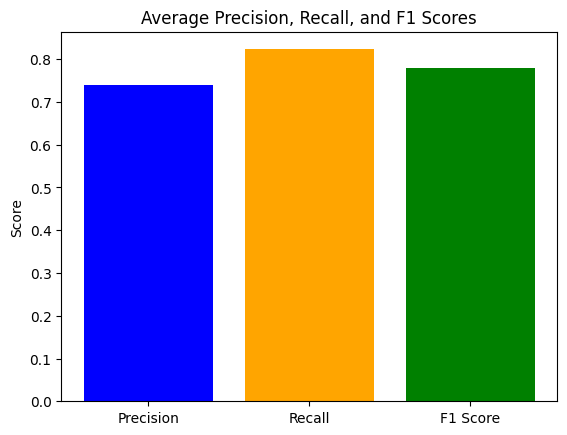

In [122]:
avg_scores = {
    'Precision': BERT_Mistral_Oppenheimer['Precision'].mean(),
    'Recall': BERT_Mistral_Oppenheimer['Recall'].mean(),
    'F1 Score': BERT_Mistral_Oppenheimer['F1 Score'].mean()
}

plt.bar(avg_scores.keys(), avg_scores.values(), color=['blue', 'orange', 'green'])
plt.title('Average Precision, Recall, and F1 Scores')
plt.ylabel('Score')
plt.show()


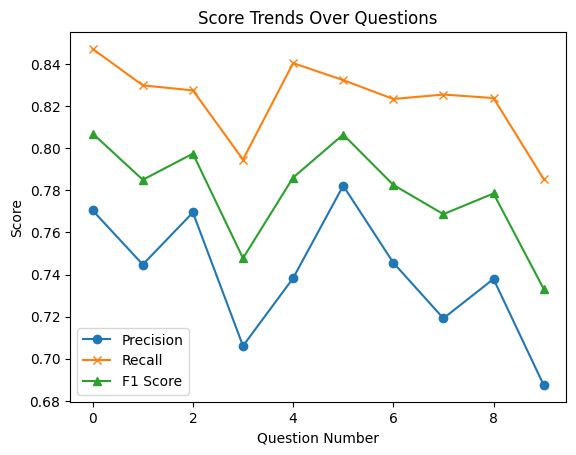

In [123]:
plt.plot(BERT_Mistral_Oppenheimer['Precision'], label='Precision', marker='o')
plt.plot(BERT_Mistral_Oppenheimer['Recall'], label='Recall', marker='x')
plt.plot(BERT_Mistral_Oppenheimer['F1 Score'], label='F1 Score', marker='^')
plt.title('Score Trends Over Questions')
plt.xlabel('Question Number')
plt.ylabel('Score')
plt.legend()
plt.show()


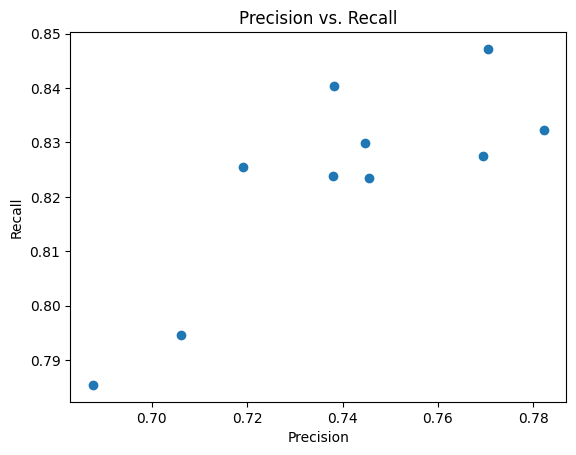

In [124]:
plt.scatter(BERT_Mistral_Oppenheimer['Precision'], BERT_Mistral_Oppenheimer['Recall'])
plt.title('Precision vs. Recall')
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.show()


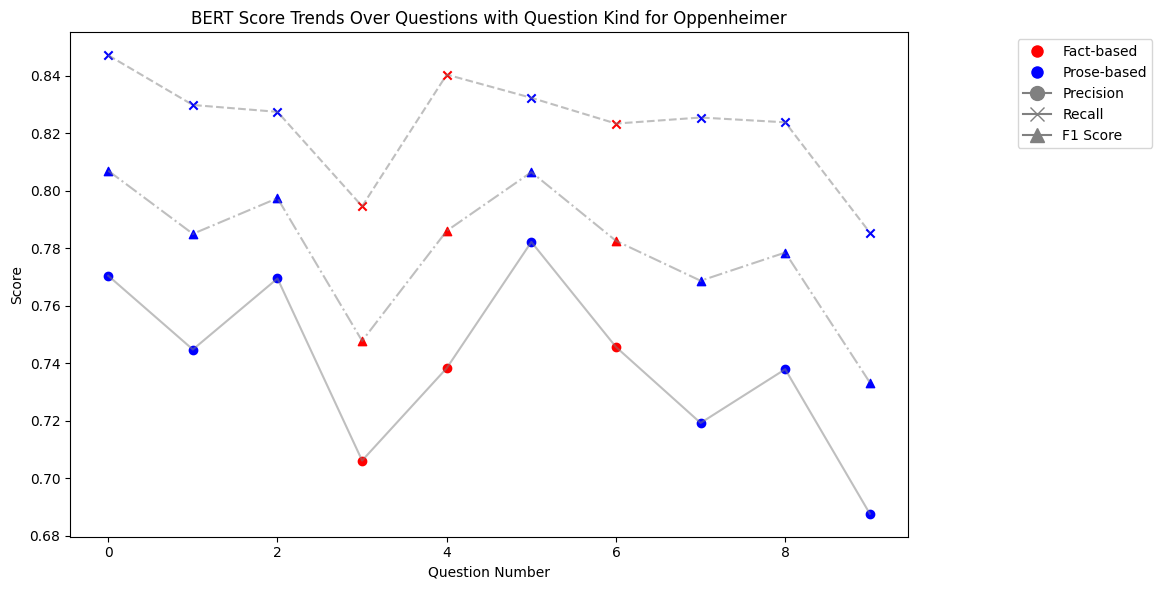

In [129]:
import matplotlib.pyplot as plt

# Assuming 'Question_kind_Oppenheimer' contains the kind of each question
colors = ['red' if kind == 'Fact' else 'blue' for kind in Question_kind_Oppenheimer['Question_Kind']]

# Plotting the score trends with question kinds demarcated
plt.figure(figsize=(12, 6))
for i, (prec, rec, f1) in enumerate(zip(BERT_Mistral_Oppenheimer['Precision'], BERT_Mistral_Oppenheimer['Recall'], BERT_Mistral_Oppenheimer['F1 Score'])):
    plt.scatter(i, prec, color=colors[i], label='Precision (o)' if i == 0 else "", marker='o')
    plt.scatter(i, rec, color=colors[i], label='Recall (x)' if i == 0 else "", marker='x')
    plt.scatter(i, f1, color=colors[i], label='F1 Score (^)' if i == 0 else "", marker='^')

plt.plot(BERT_Mistral_Oppenheimer['Precision'], linestyle='-', color='grey', alpha=0.5)
plt.plot(BERT_Mistral_Oppenheimer['Recall'], linestyle='--', color='grey', alpha=0.5)
plt.plot(BERT_Mistral_Oppenheimer['F1 Score'], linestyle='-.', color='grey', alpha=0.5)
plt.title('BERT Score Trends Over Questions with Question Kind for Oppenheimer')
plt.xlabel('Question Number')
plt.ylabel('Score')

# Creating a combined legend for both question kinds and score types outside the plot
combined_legend_items = question_kind_legend_items + [
    plt.Line2D([0], [0], marker='o', color='grey', label='Precision', markerfacecolor='grey', markersize=10),
    plt.Line2D([0], [0], marker='x', color='grey', label='Recall', markerfacecolor='grey', markersize=10),
    plt.Line2D([0], [0], marker='^', color='grey', label='F1 Score', markerfacecolor='grey', markersize=10)
]

plt.legend(handles=combined_legend_items, loc='upper right', bbox_to_anchor=(1.3, 1))

plt.tight_layout()
plt.show()


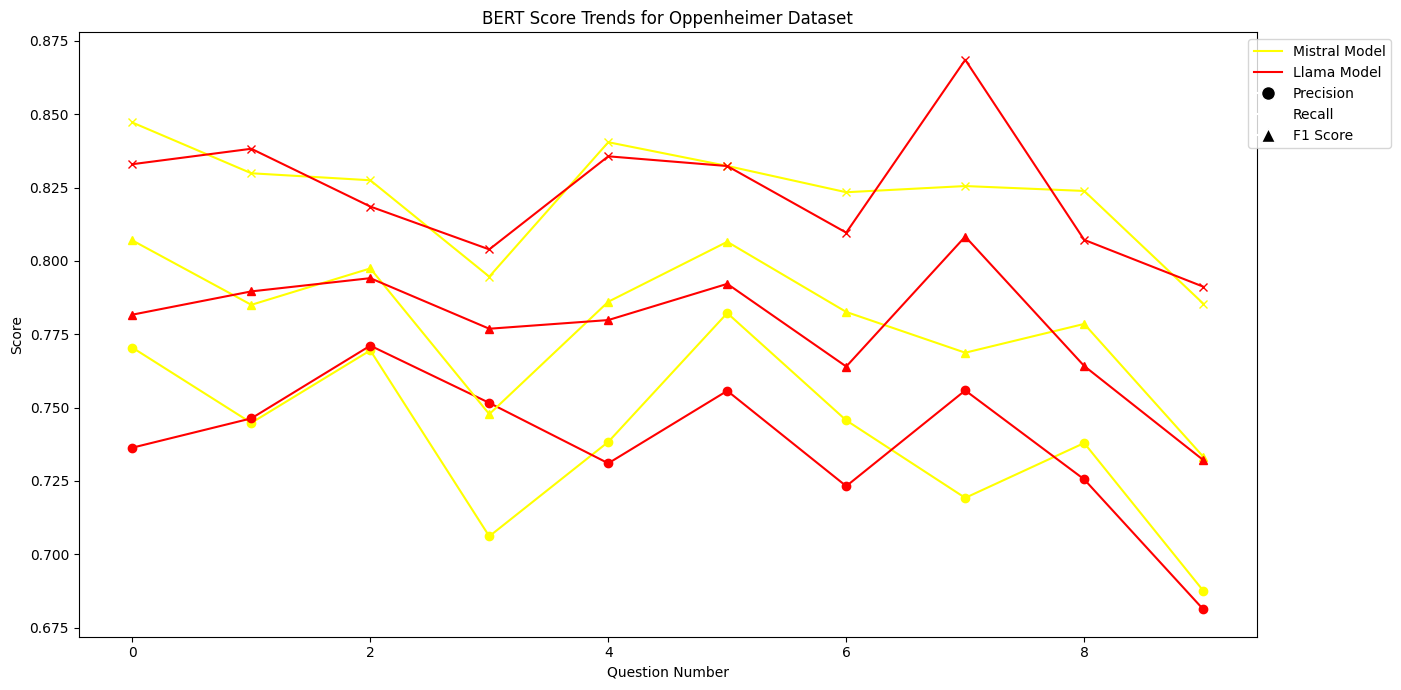

In [136]:
import matplotlib.pyplot as plt

# Assuming 'Question_kind_Oppenheimer' and 'BERT_Llama_Oppenheimer' are defined
# Note: Replace BERT_Llama_Oppenheimer with your actual DataFrame variable names

# Setting up the figure
plt.figure(figsize=(14, 7))

# Defining markers and colors for readability
metrics = ['Precision', 'Recall', 'F1 Score']
markers = ['o', 'x', '^']
colors = {'Llama': 'red', 'Mistral': 'yellow'}

# Plotting for each metric
for i, metric in enumerate(metrics):
    # Mistral Model
    plt.plot(BERT_Mistral_Oppenheimer[metric], label=f'Mistral {metric}', color=colors['Mistral'], marker=markers[i], linestyle='-')
    
    # Llama Model
    plt.plot(BERT_Llama_Oppenheimer[metric], label=f'Llama {metric}', color=colors['Llama'], marker=markers[i], linestyle='-')

plt.title('BERT Score Trends for Oppenheimer Dataset')
plt.xlabel('Question Number')
plt.ylabel('Score')

# Creating custom legend for question kinds
question_kind_legend_items = [
    plt.Line2D([0], [0], color=colors['Mistral'], label='Mistral Model'),
    plt.Line2D([0], [0], color=colors['Llama'], label='Llama Model'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='black', label='Precision', markersize=10),
    plt.Line2D([0], [0], marker='x', color='w', markerfacecolor='black', label='Recall', markersize=10),
    plt.Line2D([0], [0], marker='^', color='w', markerfacecolor='black', label='F1 Score', markersize=10)
]

# Adding legends for models and metrics
plt.legend(handles=question_kind_legend_items, loc='upper right', bbox_to_anchor=(1.12, 1))

plt.tight_layout()
plt.show()


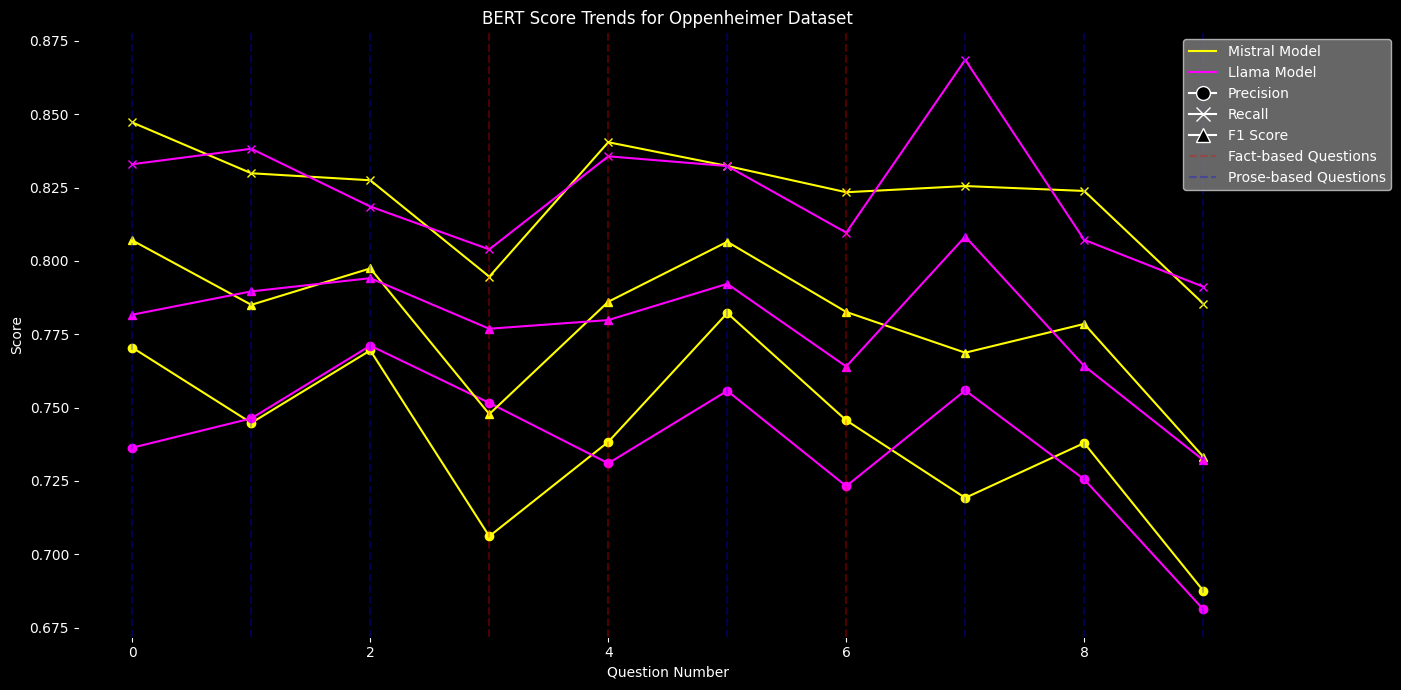

In [140]:
import matplotlib.pyplot as plt

# Assuming 'Question_kind_Oppenheimer' and 'BERT_Llama_Oppenheimer' are defined
# Note: Replace BERT_Llama_Oppenheimer and BERT_Mistral_Oppenheimer with your actual DataFrame variable names

# Setting the background color
plt.rcParams['axes.facecolor'] = 'black'
plt.rcParams['figure.facecolor'] = 'black'
plt.rcParams['text.color'] = 'white'
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['legend.facecolor'] = 'grey'

# Setting up the figure
plt.figure(figsize=(14, 7))

# Defining markers and colors for readability
metrics = ['Precision', 'Recall', 'F1 Score']
markers = ['o', 'x', '^']
colors = {'Llama': 'magenta', 'Mistral': 'yellow'}

# Plotting for each metric
for i, metric in enumerate(metrics):
    # Mistral Model
    plt.plot(BERT_Mistral_Oppenheimer[metric], label=f'Mistral {metric}', color=colors['Mistral'], marker=markers[i], linestyle='-')
    
    # Llama Model
    plt.plot(BERT_Llama_Oppenheimer[metric], label=f'Llama {metric}', color=colors['Llama'], marker=markers[i], linestyle='-')

# Demarcating question types
for i, kind in enumerate(Question_kind_Oppenheimer['Question_Kind']):
    color = 'red' if kind == 'Fact' else 'blue'
    plt.axvline(x=i, linestyle='--', color=color, alpha=0.3)

plt.title('BERT Score Trends for Oppenheimer Dataset')
plt.xlabel('Question Number')
plt.ylabel('Score')

# Creating custom legend for question kinds and models
question_kind_legend_items = [
    plt.Line2D([0], [0], color=colors['Mistral'], label='Mistral Model'),
    plt.Line2D([0], [0], color=colors['Llama'], label='Llama Model'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='black', label='Precision', markersize=10),
    plt.Line2D([0], [0], marker='x', color='w', markerfacecolor='black', label='Recall', markersize=10),
    plt.Line2D([0], [0], marker='^', color='w', markerfacecolor='black', label='F1 Score', markersize=10),
    plt.Line2D([0], [0], linestyle='--', color='red', label='Fact-based Questions', alpha=0.3),
    plt.Line2D([0], [0], linestyle='--', color='blue', label='Prose-based Questions', alpha=0.3)
]

# Adding legends for models and metrics
plt.legend(handles=question_kind_legend_items, loc='upper right', bbox_to_anchor=(1.12, 1))

plt.tight_layout()
plt.show()

# Reset matplotlib style to default
plt.rcParams.update(plt.rcParamsDefault)


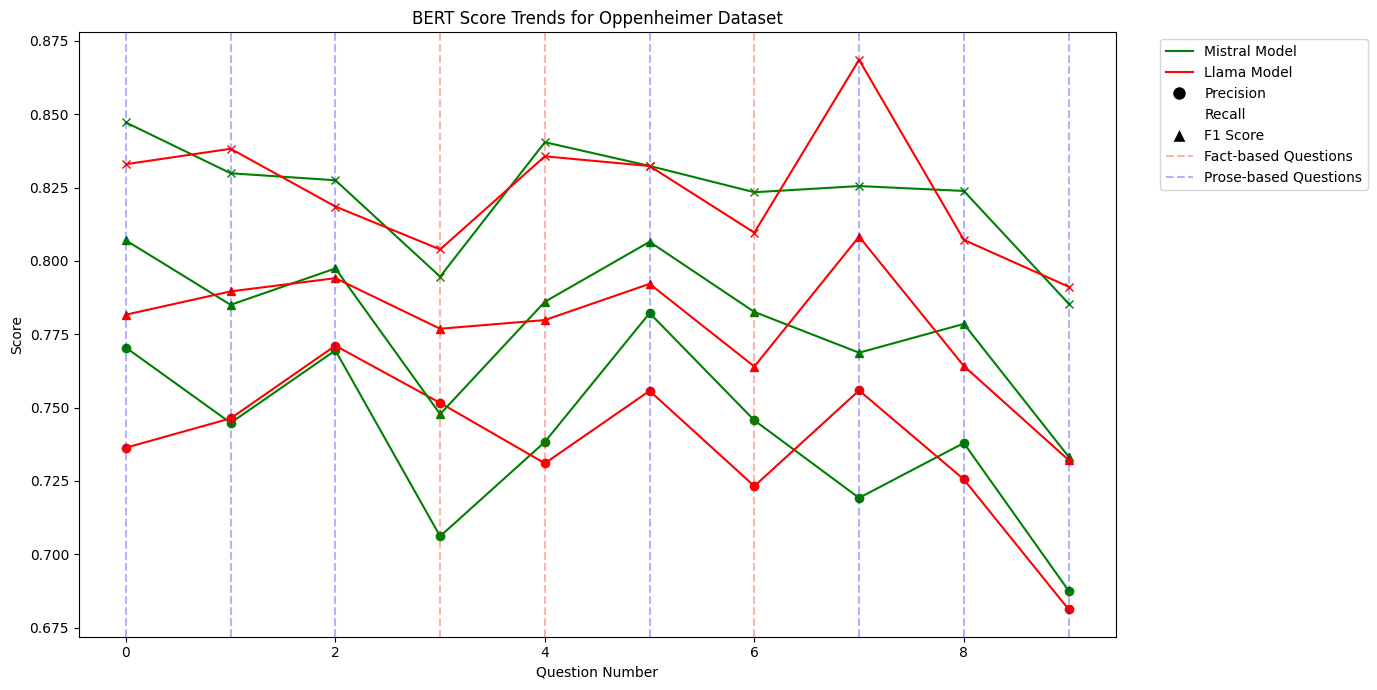

In [159]:
import matplotlib.pyplot as plt

# Assuming 'Question_kind_Oppenheimer' and 'BERT_Llama_Oppenheimer' are defined

# Resetting to default in case previously set for black background
plt.rcParams.update(plt.rcParamsDefault)

# Setting up the figure
plt.figure(figsize=(14, 7))

# Defining markers and colors for readability
metrics = ['Precision', 'Recall', 'F1 Score']
markers = ['o', 'x', '^']
colors = {'Llama': 'red', 'Mistral': 'green'}

# Plotting for each metric
for i, metric in enumerate(metrics):
    # Mistral Model
    plt.plot(BERT_Mistral_Oppenheimer[metric], label=f'Mistral {metric}', color=colors['Mistral'], marker=markers[i], linestyle='-')
    
    # Llama Model
    plt.plot(BERT_Llama_Oppenheimer[metric], label=f'Llama {metric}', color=colors['Llama'], marker=markers[i], linestyle='-')

# Demarcating question types
for i, kind in enumerate(Question_kind_Oppenheimer['Question_Kind']):
    color = 'red' if kind == 'Fact' else 'blue'
    plt.axvline(x=i, linestyle='--', color=color, alpha=0.3)

plt.title('BERT Score Trends for Oppenheimer Dataset')
plt.xlabel('Question Number')
plt.ylabel('Score')

# Creating custom legend for question kinds and models
question_kind_legend_items = [
    plt.Line2D([0], [0], color=colors['Mistral'], label='Mistral Model'),
    plt.Line2D([0], [0], color=colors['Llama'], label='Llama Model'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='black', label='Precision', markersize=10),
    plt.Line2D([0], [0], marker='x', color='w', markerfacecolor='black', label='Recall', markersize=10),
    plt.Line2D([0], [0], marker='^', color='w', markerfacecolor='black', label='F1 Score', markersize=10),
    plt.Line2D([0], [0], linestyle='--', color='red', label='Fact-based Questions', alpha=0.3),
    plt.Line2D([0], [0], linestyle='--', color='blue', label='Prose-based Questions', alpha=0.3)
]

# Adding legends for models and metrics
plt.legend(handles=question_kind_legend_items, loc='upper right', bbox_to_anchor=(1.25, 1))

plt.tight_layout()
plt.show()


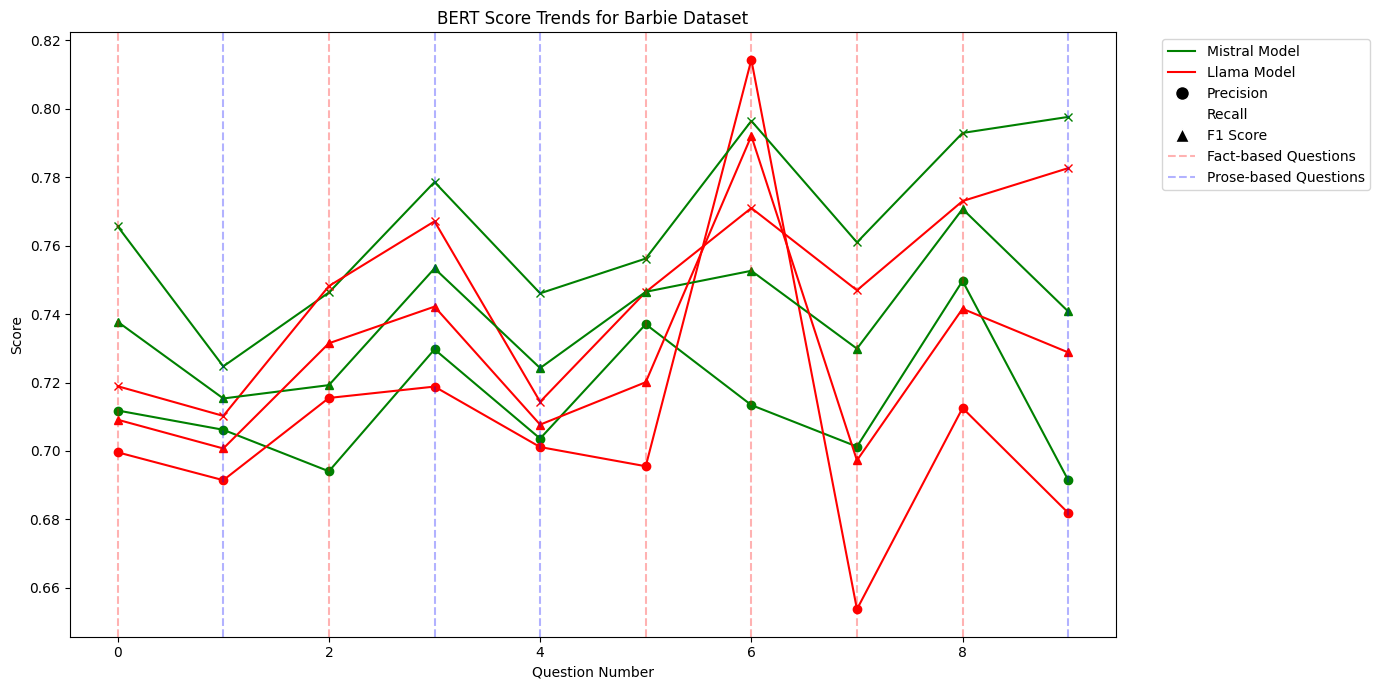

In [158]:
import matplotlib.pyplot as plt

# Assuming 'Question_kind_Barbie' and 'BERT_Llama_Barbie' are defined

# Resetting to default in case previously set for black background
plt.rcParams.update(plt.rcParamsDefault)

# Setting up the figure
plt.figure(figsize=(14, 7))

# Defining markers and colors for readability
metrics = ['Precision', 'Recall', 'F1 Score']
markers = ['o', 'x', '^']
colors = {'Llama': 'red', 'Mistral': 'Green'}

# Plotting for each metric
for i, metric in enumerate(metrics):
    # Mistral Model
    plt.plot(BERT_Mistral_Barbie[metric], label=f'Mistral {metric}', color=colors['Mistral'], marker=markers[i], linestyle='-')
    
    # Llama Model
    plt.plot(BERT_Llama_Barbie[metric], label=f'Llama {metric}', color=colors['Llama'], marker=markers[i], linestyle='-')

# Demarcating question types
for i, kind in enumerate(Question_kind_Barbie['Question_Kind']):
    color = 'red' if kind == 'Fact' else 'blue'
    plt.axvline(x=i, linestyle='--', color=color, alpha=0.3)

plt.title('BERT Score Trends for Barbie Dataset')
plt.xlabel('Question Number')
plt.ylabel('Score')

# Creating custom legend for question kinds and models
question_kind_legend_items = [
    plt.Line2D([0], [0], color=colors['Mistral'], label='Mistral Model'),
    plt.Line2D([0], [0], color=colors['Llama'], label='Llama Model'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='black', label='Precision', markersize=10),
    plt.Line2D([0], [0], marker='x', color='w', markerfacecolor='black', label='Recall', markersize=10),
    plt.Line2D([0], [0], marker='^', color='w', markerfacecolor='black', label='F1 Score', markersize=10),
    plt.Line2D([0], [0], linestyle='--', color='red', label='Fact-based Questions', alpha=0.3),
    plt.Line2D([0], [0], linestyle='--', color='blue', label='Prose-based Questions', alpha=0.3)
]

# Adding legends for models and metrics
plt.legend(handles=question_kind_legend_items, loc='upper right', bbox_to_anchor=(1.25, 1))

plt.tight_layout()
plt.show()


In [139]:
# Example for Precision vs. Recall with Question Kind
plt.figure(figsize=(8, 6))
for i, (prec, rec) in enumerate(zip(BERT_Mistral_Oppenheimer['Precision'], BERT_Mistral_Oppenheimer['Recall'])):
    plt.scatter(prec, rec, color=colors[i])

plt.title('BERT Precision vs. Recall with Question Kind for Oppenheimer')
plt.xlabel('Precision')
plt.ylabel('Recall')

# Creating custom legend for question kinds outside the plot
plt.legend(handles=question_kind_legend_items, loc='upper right', bbox_to_anchor=(1.3, 1))

plt.tight_layout()
plt.show()


KeyError: 0

<Figure size 800x600 with 0 Axes>

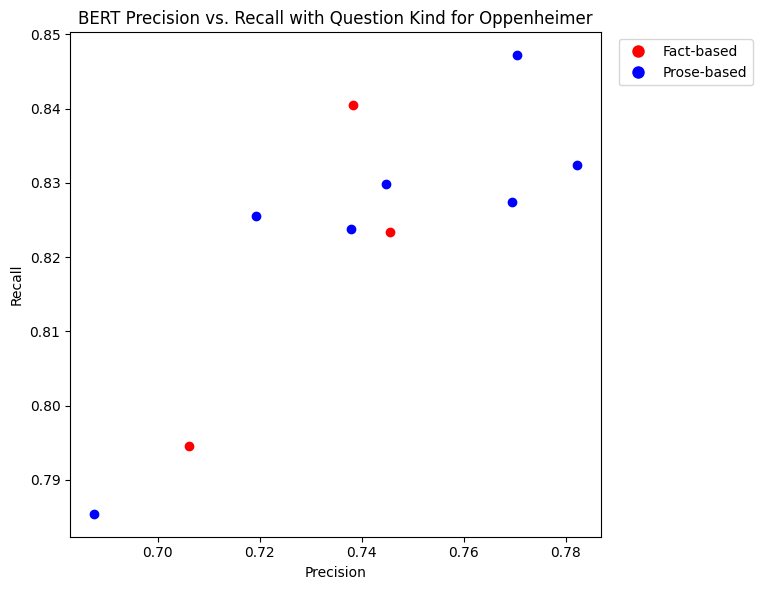

In [165]:
import matplotlib.pyplot as plt

# Assuming 'Question_kind_Oppenheimer' contains the kind of each question
colors = ['red' if kind == 'Fact' else 'blue' for kind in Question_kind_Oppenheimer['Question_Kind']]

# Recreating custom legend for question kinds
question_kind_legend_items = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', label='Fact-based', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', label='Prose-based', markersize=10)
]

# Example for Precision vs. Recall with Question Kind
plt.figure(figsize=(8, 6))
for i, (prec, rec) in enumerate(zip(BERT_Mistral_Oppenheimer['Precision'], BERT_Mistral_Oppenheimer['Recall'])):
    plt.scatter(prec, rec, color=colors[i])  # Removed the label addition for Q1 and Q10

plt.title('BERT Precision vs. Recall with Question Kind for Oppenheimer')
plt.xlabel('Precision')
plt.ylabel('Recall')

# Adding legends for question kinds outside the plot, without Q1 and Q10 in the legend
plt.legend(handles=question_kind_legend_items, loc='upper right', bbox_to_anchor=(1.3, 1))

plt.tight_layout()
plt.show()


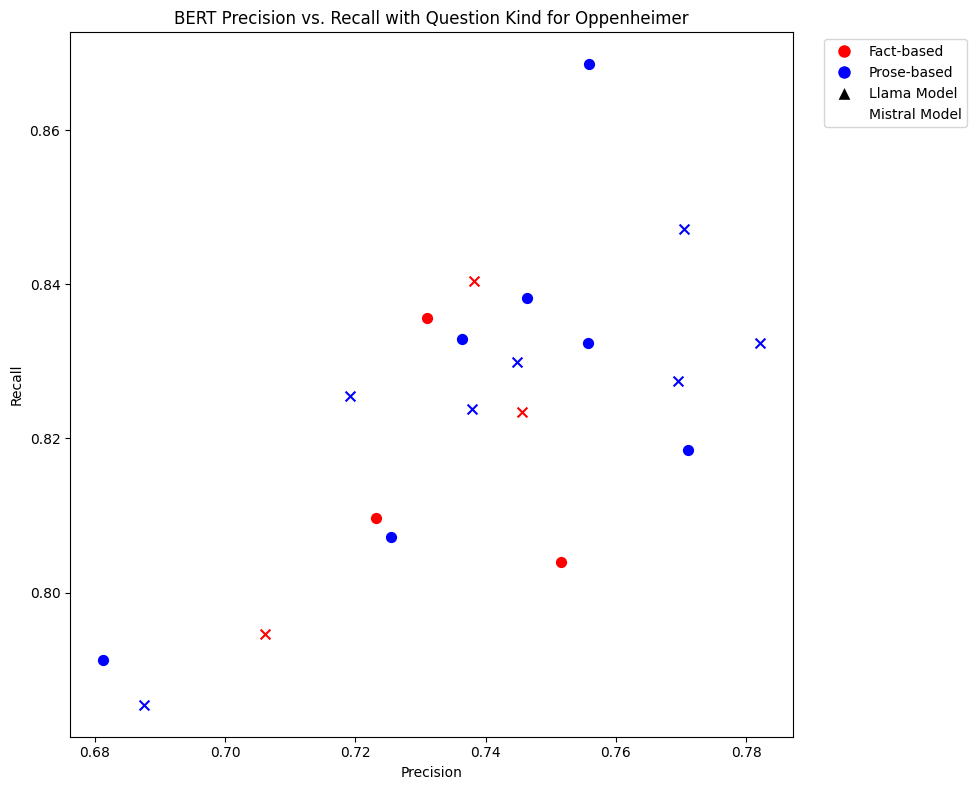

In [169]:
import matplotlib.pyplot as plt

# Assuming 'Question_kind_Oppenheimer' contains the kind of each question
colors = ['red' if kind == 'Fact' else 'blue' for kind in Question_kind_Oppenheimer['Question_Kind']]

# Recreating custom legend for question kinds and models
question_kind_legend_items = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', label='Fact-based', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', label='Prose-based', markersize=10),
    plt.Line2D([0], [0], marker='^', color='w', markerfacecolor='black', label='Llama Model', markersize=10),
    plt.Line2D([0], [0], marker='x', color='w', markerfacecolor='black', label='Mistral Model', markersize=10)
]

# Example for Precision vs. Recall with Question Kind, including Llama and Mistral
plt.figure(figsize=(10, 8))
# Mistral Model
for i, (prec, rec) in enumerate(zip(BERT_Mistral_Oppenheimer['Precision'], BERT_Mistral_Oppenheimer['Recall'])):
    plt.scatter(prec, rec, color=colors[i], marker='x', s=50)  # Using 'x' marker for Mistral

# Llama Model
for i, (prec, rec) in enumerate(zip(BERT_Llama_Oppenheimer['Precision'], BERT_Llama_Oppenheimer['Recall'])):
    plt.scatter(prec, rec, color=colors[i], marker='o', s=50)  # Using 'o' marker for Llama

plt.title('BERT Precision vs. Recall with Question Kind for Oppenheimer')
plt.xlabel('Precision')
plt.ylabel('Recall')

# Adding legends for question kinds outside the plot, including model distinction
plt.legend(handles=question_kind_legend_items, loc='upper right', bbox_to_anchor=(1.25, 1))

plt.tight_layout()
plt.show()


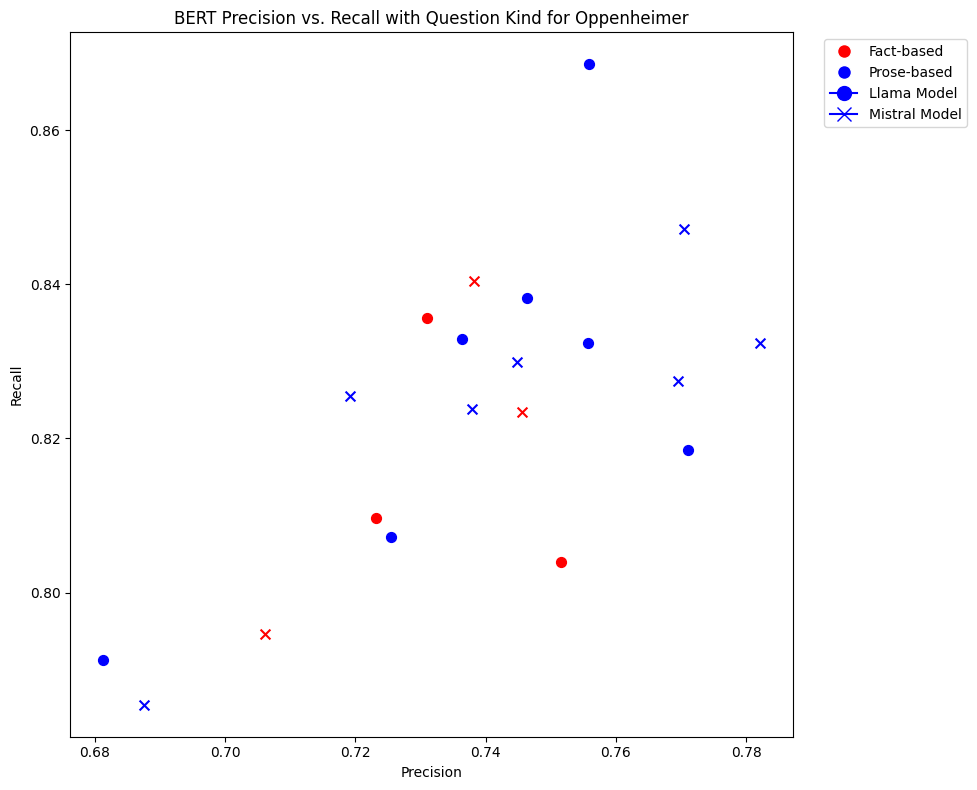

In [175]:
import matplotlib.pyplot as plt

# Assuming 'Question_kind_Oppenheimer' contains the kind of each question
colors = ['red' if kind == 'Fact' else 'blue' for kind in Question_kind_Oppenheimer['Question_Kind']]

# Recreating custom legend for question kinds and models
question_kind_legend_items = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', label='Fact-based', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', label='Prose-based', markersize=10),
    plt.Line2D([0], [0], marker='o', color='b', markerfacecolor='blue', label='Llama Model', markersize=10),
    plt.Line2D([0], [0], marker='x', color='b', markerfacecolor='cyan', label='Mistral Model', markersize=10)
]

# Example for Precision vs. Recall with Question Kind, including Llama and Mistral
plt.figure(figsize=(10, 8))
# Llama Model
for i, (prec, rec) in enumerate(zip(BERT_Llama_Oppenheimer['Precision'], BERT_Llama_Oppenheimer['Recall'])):
    plt.scatter(prec, rec, color=colors[i], marker='o', s=50)  # Using 'o' marker for Llama
# Mistral Model
for i, (prec, rec) in enumerate(zip(BERT_Mistral_Oppenheimer['Precision'], BERT_Mistral_Oppenheimer['Recall'])):
    plt.scatter(prec, rec, color=colors[i], marker='x', s=50)  # Using 'x' marker for Mistral

plt.title('BERT Precision vs. Recall with Question Kind for Oppenheimer')
plt.xlabel('Precision')
plt.ylabel('Recall')

# Adding legends for question kinds outside the plot, including model distinction
plt.legend(handles=question_kind_legend_items, loc='upper right', bbox_to_anchor=(1.25, 1))

plt.tight_layout()
plt.show()


## trying RAG with BERT 

### Running Oppenheimer

In [180]:
import pandas as pd
from bert_score import score
from llama_index.core import VectorStoreIndex, StorageContext, load_index_from_storage, Settings, SimpleDirectoryReader
from llama_index.core.embeddings import resolve_embed_model
from llama_index.llms.ollama import Ollama

# Path to persistently store the indexed data
Persist_DIR = "./storageOppenheimer"

# Initialize settings for embeddings and LLM model
Settings.embed_model = resolve_embed_model("local:BAAI/bge-small-en-v1.5")
Settings.llm = Ollama(model="mistral", request_timeout=30.0)

# Check if the persistent storage directory exists; if not, initialize and load documents
if not os.path.exists(Persist_DIR):
    print("Initializing storage and loading documents.")
    documents = SimpleDirectoryReader("Data/Oppenheimer").load_data()
    index = VectorStoreIndex.from_documents(documents)
    index.storage_context.persist(persist_dir=Persist_DIR)
else:
    print("Loading existing storage.")
    storage_context = StorageContext.from_defaults(persist_dir=Persist_DIR)
    index = load_index_from_storage(storage_context)

# Convert the index into a query engine for the LLM
query_engine = index.as_query_engine()

# Lists to store results
RAG_Mistral_responses_BERT = []
RAG_Mistral_BERT_P_scores = []
RAG_Mistral_BERT_R_scores = []
RAG_Mistral_BERT_F1_scores = []

# Assuming 'OppenheimerQA_verbose' is a DataFrame containing 'Question' and 'Answer' columns
for i in range(len(OppenheimerQA_verbose)):
    question = OppenheimerQA_verbose['Question'][i]
    
    # Use the query engine to generate a response based on the indexed documents
    response = query_engine.query(question)
    response_text = response.response
    
    # Store the response text
    RAG_Mistral_responses_BERT.append(response_text)
    
    # Calculate BERTscore
    P, R, F1 = score([response_text], [OppenheimerQA_verbose['Answer'][i]], lang="en", verbose=True, model_type="distilbert-base-uncased")
    
    # Store scores
    RAG_Mistral_BERT_P_scores.append(P[0].item())
    RAG_Mistral_BERT_R_scores.append(R[0].item())
    RAG_Mistral_BERT_F1_scores.append(F1[0].item())

# Create a DataFrame from the stored results
RAG_BERT_Mistral_Oppenheimer = pd.DataFrame({
    'Question': OppenheimerQA_verbose['Question'],
    'Answer': OppenheimerQA_verbose['Answer'],
    'Mistral Response': RAG_Mistral_responses_BERT,
    'Precision': RAG_Mistral_BERT_P_scores,
    'Recall': RAG_Mistral_BERT_R_scores,
    'F1 Score': RAG_Mistral_BERT_F1_scores
})


Loading existing storage.
calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 20.77it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 534.71it/s]

done in 0.05 seconds, 18.47 sentences/sec


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 21.07it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 780.05it/s]

done in 0.05 seconds, 19.75 sentences/sec


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 23.42it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 806.44it/s]

done in 0.05 seconds, 20.95 sentences/sec


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 13.81it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 809.71it/s]

done in 0.08 seconds, 13.24 sentences/sec


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 11.87it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 651.49it/s]

done in 0.09 seconds, 11.30 sentences/sec


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 23.46it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 853.19it/s]

done in 0.05 seconds, 21.93 sentences/sec


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 10.79it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 502.73it/s]

done in 0.10 seconds, 9.79 sentences/sec


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 13.31it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 819.04it/s]

done in 0.08 seconds, 12.75 sentences/sec


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 22.08it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 938.95it/s]

done in 0.05 seconds, 20.69 sentences/sec


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 11.88it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 498.79it/s]

done in 0.09 seconds, 11.30 sentences/sec


In [182]:
import pandas as pd
from bert_score import score
from llama_index.core import VectorStoreIndex, StorageContext, load_index_from_storage, Settings, SimpleDirectoryReader
from llama_index.core.embeddings import resolve_embed_model
from llama_index.llms.ollama import Ollama

# Path to persistently store the indexed data
Persist_DIR = "./storageOppenheimer"

# Initialize settings for embeddings and LLM model
Settings.embed_model = resolve_embed_model("local:BAAI/bge-small-en-v1.5")
Settings.llm = Ollama(model="llama2", request_timeout=50.0)

# Check if the persistent storage directory exists; if not, initialize and load documents
if not os.path.exists(Persist_DIR):
    print("Initializing storage and loading documents.")
    documents = SimpleDirectoryReader("Data/Oppenheimer").load_data()
    index = VectorStoreIndex.from_documents(documents)
    index.storage_context.persist(persist_dir=Persist_DIR)
else:
    print("Loading existing storage.")
    storage_context = StorageContext.from_defaults(persist_dir=Persist_DIR)
    index = load_index_from_storage(storage_context)

# Convert the index into a query engine for the LLM
query_engine = index.as_query_engine()

# Lists to store results
RAG_Llama2_responses_BERT = []
RAG_Llama2_BERT_P_scores = []
RAG_Llama2_BERT_R_scores = []
RAG_Llama2_BERT_F1_scores = []

# Assuming 'OppenheimerQA_verbose' is a DataFrame containing 'Question' and 'Answer' columns
for i in range(len(OppenheimerQA_verbose)):
    question = OppenheimerQA_verbose['Question'][i]
    
    # Use the query engine to generate a response based on the indexed documents
    response = query_engine.query(question)
    response_text = response.response
    
    # Store the response text
    RAG_Llama2_responses_BERT.append(response_text)
    
    # Calculate BERTscore
    P, R, F1 = score([response_text], [OppenheimerQA_verbose['Answer'][i]], lang="en", verbose=True, model_type="distilbert-base-uncased")
    
    # Store scores
    RAG_Llama2_BERT_P_scores.append(P[0].item())
    RAG_Llama2_BERT_R_scores.append(R[0].item())
    RAG_Llama2_BERT_F1_scores.append(F1[0].item())

# Create a DataFrame from the stored results
RAG_BERT_Llama2_Oppenheimer = pd.DataFrame({
    'Question': OppenheimerQA_verbose['Question'],
    'Answer': OppenheimerQA_verbose['Answer'],
    'Llama2 Response': RAG_Llama2_responses_BERT,
    'Precision': RAG_Llama2_BERT_P_scores,
    'Recall': RAG_Llama2_BERT_R_scores,
    'F1 Score': RAG_Llama2_BERT_F1_scores
})


Loading existing storage.
calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  8.88it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 636.08it/s]

done in 0.12 seconds, 8.54 sentences/sec


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  8.98it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 573.62it/s]

done in 0.11 seconds, 8.71 sentences/sec


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 14.39it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 771.58it/s]

done in 0.07 seconds, 13.64 sentences/sec


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 10.09it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 735.33it/s]

done in 0.10 seconds, 9.70 sentences/sec


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 10.70it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 604.28it/s]

done in 0.10 seconds, 10.09 sentences/sec


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 11.72it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 510.94it/s]

done in 0.09 seconds, 11.03 sentences/sec


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 14.52it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 810.49it/s]

done in 0.07 seconds, 13.95 sentences/sec


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 11.62it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 836.69it/s]

done in 0.09 seconds, 11.22 sentences/sec


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 10.96it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 765.66it/s]

done in 0.09 seconds, 10.57 sentences/sec


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  8.89it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 683.11it/s]

done in 0.12 seconds, 8.65 sentences/sec


### Running Barbie RAG BERT 

In [183]:
import pandas as pd
from bert_score import score
from llama_index.core import VectorStoreIndex, StorageContext, load_index_from_storage, Settings, SimpleDirectoryReader
from llama_index.core.embeddings import resolve_embed_model
from llama_index.llms.ollama import Ollama

# Path to persistently store the indexed data
Persist_DIR = "./storageBarbie"

# Initialize settings for embeddings and LLM model
Settings.embed_model = resolve_embed_model("local:BAAI/bge-small-en-v1.5")
Settings.llm = Ollama(model="llama2", request_timeout=50.0)

# Check if the persistent storage directory exists; if not, initialize and load documents
if not os.path.exists(Persist_DIR):
    print("Initializing storage and loading documents.")
    documents = SimpleDirectoryReader("Data/Barbie").load_data()
    index = VectorStoreIndex.from_documents(documents)
    index.storage_context.persist(persist_dir=Persist_DIR)
else:
    print("Loading existing storage.")
    storage_context = StorageContext.from_defaults(persist_dir=Persist_DIR)
    index = load_index_from_storage(storage_context)

# Convert the index into a query engine for the LLM
query_engine = index.as_query_engine()

# Lists to store results
RAG_Llama2_responses_BERT = []
RAG_Llama2_BERT_P_scores = []
RAG_Llama2_BERT_R_scores = []
RAG_Llama2_BERT_F1_scores = []

# Assuming 'BarbieQA_verbose' is a DataFrame containing 'Question' and 'Answer' columns
for i in range(len(BarbieQA_verbose)):
    question = BarbieQA_verbose['Question'][i]
    
    # Use the query engine to generate a response based on the indexed documents
    response = query_engine.query(question)
    response_text = response.response
    
    # Store the response text
    RAG_Llama2_responses_BERT.append(response_text)
    
    # Calculate BERTscore
    P, R, F1 = score([response_text], [BarbieQA_verbose['Reference Text'][i]], lang="en", verbose=True, model_type="distilbert-base-uncased")
    
    # Store scores
    RAG_Llama2_BERT_P_scores.append(P[0].item())
    RAG_Llama2_BERT_R_scores.append(R[0].item())
    RAG_Llama2_BERT_F1_scores.append(F1[0].item())

# Create a DataFrame from the stored results
RAG_BERT_Llama2_Barbie = pd.DataFrame({
    'Question': BarbieQA_verbose['Question'],
    'Reference Text': BarbieQA_verbose['Reference Text'],
    'Llama2 Response': RAG_Llama2_responses_BERT,
    'Precision': RAG_Llama2_BERT_P_scores,
    'Recall': RAG_Llama2_BERT_R_scores,
    'F1 Score': RAG_Llama2_BERT_F1_scores
})


Loading existing storage.
calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 36.14it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 152.55it/s]

done in 0.04 seconds, 27.49 sentences/sec


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 13.64it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 650.58it/s]

done in 0.08 seconds, 12.99 sentences/sec


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 31.40it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 930.21it/s]

done in 0.03 seconds, 28.87 sentences/sec


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 40.34it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 1002.94it/s]

done in 0.03 seconds, 36.02 sentences/sec


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 29.17it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 972.03it/s]

done in 0.04 seconds, 26.84 sentences/sec


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 32.36it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 844.60it/s]

done in 0.03 seconds, 29.52 sentences/sec


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 13.68it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 62.28it/s]

done in 0.10 seconds, 10.22 sentences/sec


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 10.35it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 752.88it/s]

done in 0.10 seconds, 9.77 sentences/sec


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 12.36it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 551.59it/s]

done in 0.09 seconds, 11.50 sentences/sec


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 26.80it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 938.11it/s]

done in 0.04 seconds, 24.96 sentences/sec


In [184]:
import pandas as pd
from bert_score import score
from llama_index.core import VectorStoreIndex, StorageContext, load_index_from_storage, Settings, SimpleDirectoryReader
from llama_index.core.embeddings import resolve_embed_model
from llama_index.llms.ollama import Ollama

# Path to persistently store the indexed data
Persist_DIR = "./storageBarbie"

# Initialize settings for embeddings and LLM model
Settings.embed_model = resolve_embed_model("local:BAAI/bge-small-en-v1.5")
Settings.llm = Ollama(model="mistral", request_timeout=50.0)

# Check if the persistent storage directory exists; if not, initialize and load documents
if not os.path.exists(Persist_DIR):
    print("Initializing storage and loading documents.")
    documents = SimpleDirectoryReader("Data/Barbie").load_data()
    index = VectorStoreIndex.from_documents(documents)
    index.storage_context.persist(persist_dir=Persist_DIR)
else:
    print("Loading existing storage.")
    storage_context = StorageContext.from_defaults(persist_dir=Persist_DIR)
    index = load_index_from_storage(storage_context)

# Convert the index into a query engine for the LLM
query_engine = index.as_query_engine()

# Lists to store results
RAG_Mistral_responses_BERT = []
RAG_Mistral_BERT_P_scores = []
RAG_Mistral_BERT_R_scores = []
RAG_Mistral_BERT_F1_scores = []

# Assuming 'BarbieQA_verbose' is a DataFrame containing 'Question' and 'Answer' columns
for i in range(len(BarbieQA_verbose)):
    question = BarbieQA_verbose['Question'][i]
    
    # Use the query engine to generate a response based on the indexed documents
    response = query_engine.query(question)
    response_text = response.response
    
    # Store the response text
    RAG_Mistral_responses_BERT.append(response_text)
    
    # Calculate BERTscore
    P, R, F1 = score([response_text], [BarbieQA_verbose['Reference Text'][i]], lang="en", verbose=True, model_type="distilbert-base-uncased")
    
    # Store scores
    RAG_Mistral_BERT_P_scores.append(P[0].item())
    RAG_Mistral_BERT_R_scores.append(R[0].item())
    RAG_Mistral_BERT_F1_scores.append(F1[0].item())

# Create a DataFrame from the stored results
RAG_BERT_Mistral_Barbie = pd.DataFrame({
    'Question': BarbieQA_verbose['Question'],
    'Reference Text': BarbieQA_verbose['Reference Text'],
    'Mistral Response': RAG_Mistral_responses_BERT,
    'Precision': RAG_Mistral_BERT_P_scores,
    'Recall': RAG_Mistral_BERT_R_scores,
    'F1 Score': RAG_Mistral_BERT_F1_scores
})


Loading existing storage.
calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 36.96it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 913.00it/s]

done in 0.03 seconds, 33.38 sentences/sec


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 23.24it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 1003.18it/s]

done in 0.05 seconds, 21.82 sentences/sec


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 23.68it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 998.88it/s]

done in 0.05 seconds, 22.18 sentences/sec


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 41.43it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 817.13it/s]

done in 0.03 seconds, 36.80 sentences/sec


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 30.20it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 903.36it/s]

done in 0.04 seconds, 27.53 sentences/sec


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 19.56it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 942.33it/s]

done in 0.05 seconds, 18.44 sentences/sec


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 45.66it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 943.39it/s]

done in 0.02 seconds, 40.42 sentences/sec


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 11.29it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 540.50it/s]

done in 0.09 seconds, 10.82 sentences/sec


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 19.70it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 870.91it/s]

done in 0.05 seconds, 18.45 sentences/sec


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 26.15it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 946.15it/s]

done in 0.04 seconds, 23.90 sentences/sec


## Visualizing results for above 

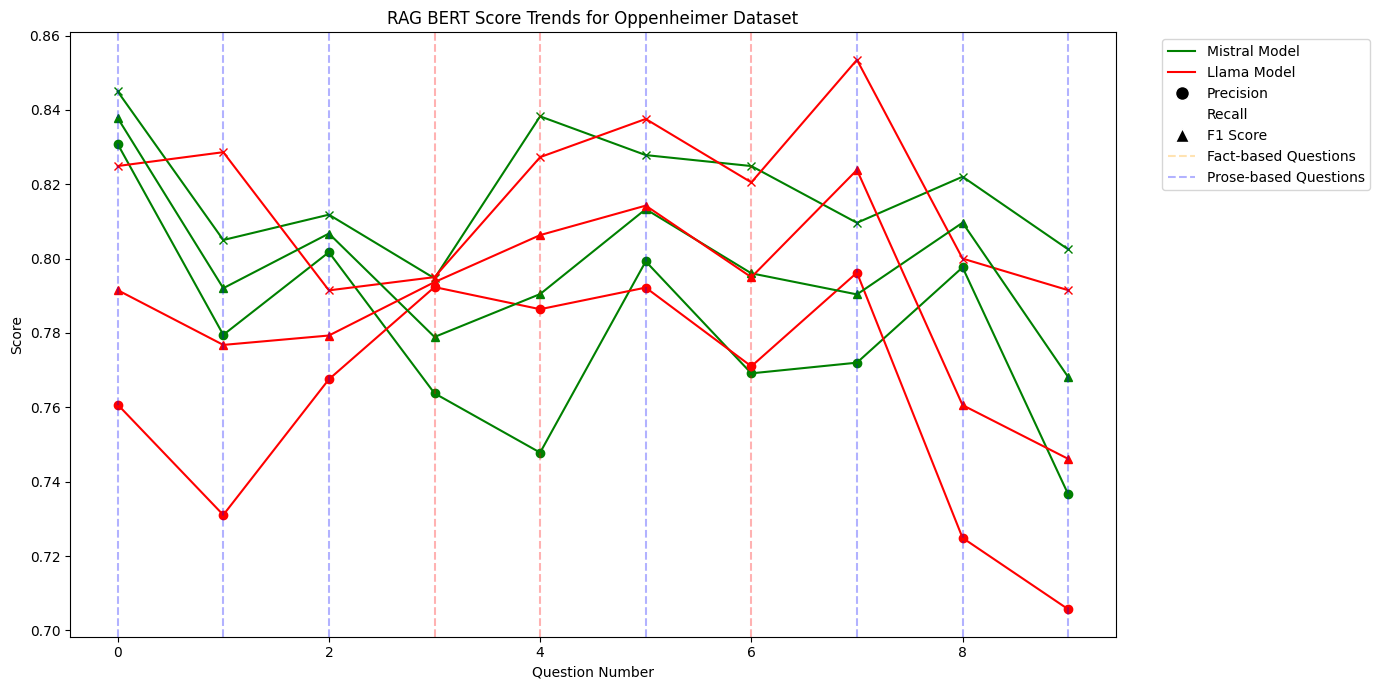

In [196]:
import matplotlib.pyplot as plt

# Assuming 'Question_kind_Oppenheimer' and 'RAG_BERT_Llama_Oppenheimer' are defined

# Resetting to default in case previously set for black background
plt.rcParams.update(plt.rcParamsDefault)

# Setting up the figure
plt.figure(figsize=(14, 7))

# Defining markers and colors for readability
metrics = ['Precision', 'Recall', 'F1 Score']
markers = ['o', 'x', '^']
colors = {'Llama': 'red', 'Mistral': 'green'}

# Plotting for each metric
for i, metric in enumerate(metrics):
    # Mistral Model
    plt.plot(RAG_BERT_Mistral_Oppenheimer[metric], label=f'Mistral {metric}', color=colors['Mistral'], marker=markers[i], linestyle='-')
    
    # Llama Model
    plt.plot(RAG_BERT_Llama2_Oppenheimer[metric], label=f'Llama {metric}', color=colors['Llama'], marker=markers[i], linestyle='-')

# Demarcating question types
for i, kind in enumerate(Question_kind_Oppenheimer['Question_Kind']):
    color = 'red' if kind == 'Fact' else 'blue'
    plt.axvline(x=i, linestyle='--', color=color, alpha=0.3)

plt.title('RAG BERT Score Trends for Oppenheimer Dataset')
plt.xlabel('Question Number')
plt.ylabel('Score')

# Creating custom legend for question kinds and models
question_kind_legend_items = [
    plt.Line2D([0], [0], color=colors['Mistral'], label='Mistral Model'),
    plt.Line2D([0], [0], color=colors['Llama'], label='Llama Model'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='black', label='Precision', markersize=10),
    plt.Line2D([0], [0], marker='x', color='w', markerfacecolor='black', label='Recall', markersize=10),
    plt.Line2D([0], [0], marker='^', color='w', markerfacecolor='black', label='F1 Score', markersize=10),
    plt.Line2D([0], [0], linestyle='--', color='orange', label='Fact-based Questions', alpha=0.3),
    plt.Line2D([0], [0], linestyle='--', color='blue', label='Prose-based Questions', alpha=0.3)
]

# Adding legends for models and metrics
plt.legend(handles=question_kind_legend_items, loc='upper right', bbox_to_anchor=(1.25, 1))

plt.tight_layout()
plt.show()


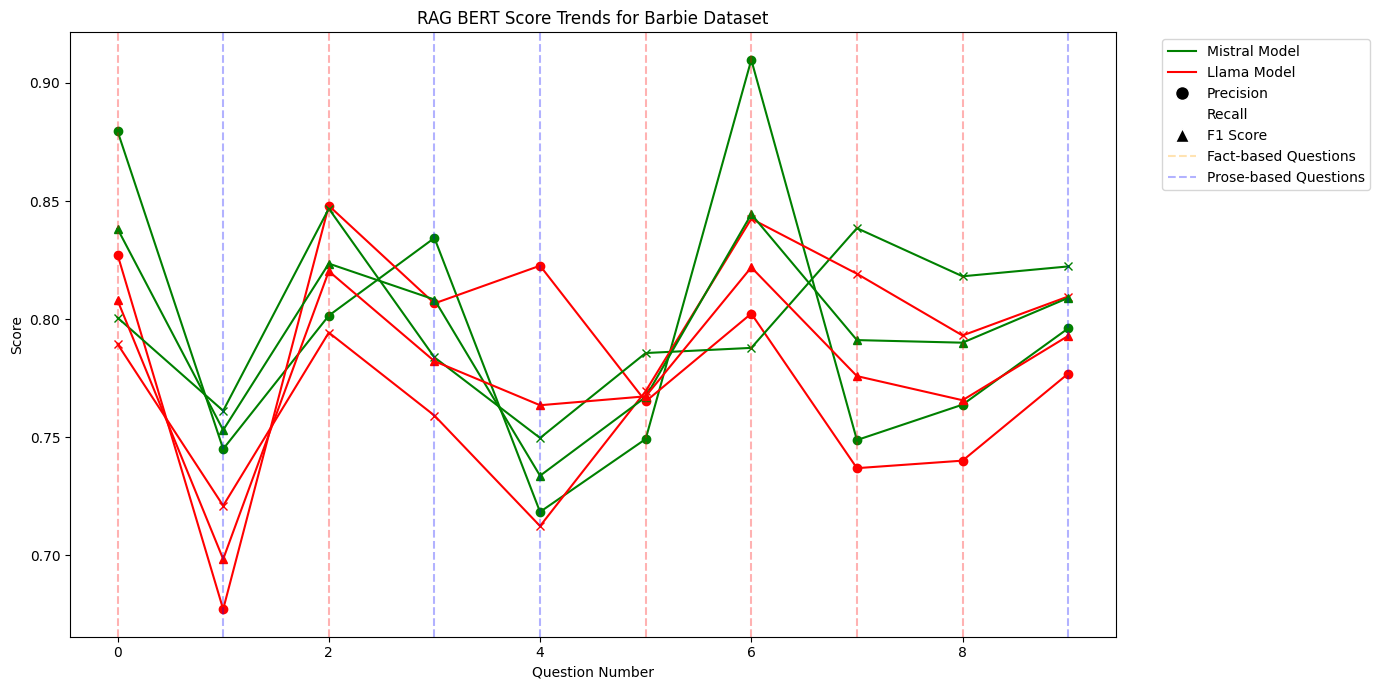

In [197]:
import matplotlib.pyplot as plt

# Assuming 'Question_kind_Barbie' and 'RAG_BERT_Llama_Oppenheimer' are defined

# Resetting to default in case previously set for black background
plt.rcParams.update(plt.rcParamsDefault)

# Setting up the figure
plt.figure(figsize=(14, 7))

# Defining markers and colors for readability
metrics = ['Precision', 'Recall', 'F1 Score']
markers = ['o', 'x', '^']
colors = {'Llama': 'red', 'Mistral': 'green'}

# Plotting for each metric
for i, metric in enumerate(metrics):
    # Mistral Model
    plt.plot(RAG_BERT_Mistral_Barbie[metric], label=f'Mistral {metric}', color=colors['Mistral'], marker=markers[i], linestyle='-')
    
    # Llama Model
    plt.plot(RAG_BERT_Llama2_Barbie[metric], label=f'Llama {metric}', color=colors['Llama'], marker=markers[i], linestyle='-')

# Demarcating question types
for i, kind in enumerate(Question_kind_Barbie['Question_Kind']):
    color = 'red' if kind == 'Fact' else 'blue'
    plt.axvline(x=i, linestyle='--', color=color, alpha=0.3)

plt.title('RAG BERT Score Trends for Barbie Dataset')
plt.xlabel('Question Number')
plt.ylabel('Score')

# Creating custom legend for question kinds and models
question_kind_legend_items = [
    plt.Line2D([0], [0], color=colors['Mistral'], label='Mistral Model'),
    plt.Line2D([0], [0], color=colors['Llama'], label='Llama Model'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='black', label='Precision', markersize=10),
    plt.Line2D([0], [0], marker='x', color='w', markerfacecolor='black', label='Recall', markersize=10),
    plt.Line2D([0], [0], marker='^', color='w', markerfacecolor='black', label='F1 Score', markersize=10),
    plt.Line2D([0], [0], linestyle='--', color='orange', label='Fact-based Questions', alpha=0.3),
    plt.Line2D([0], [0], linestyle='--', color='blue', label='Prose-based Questions', alpha=0.3)
]

# Adding legends for models and metrics
plt.legend(handles=question_kind_legend_items, loc='upper right', bbox_to_anchor=(1.25, 1))

plt.tight_layout()
plt.show()


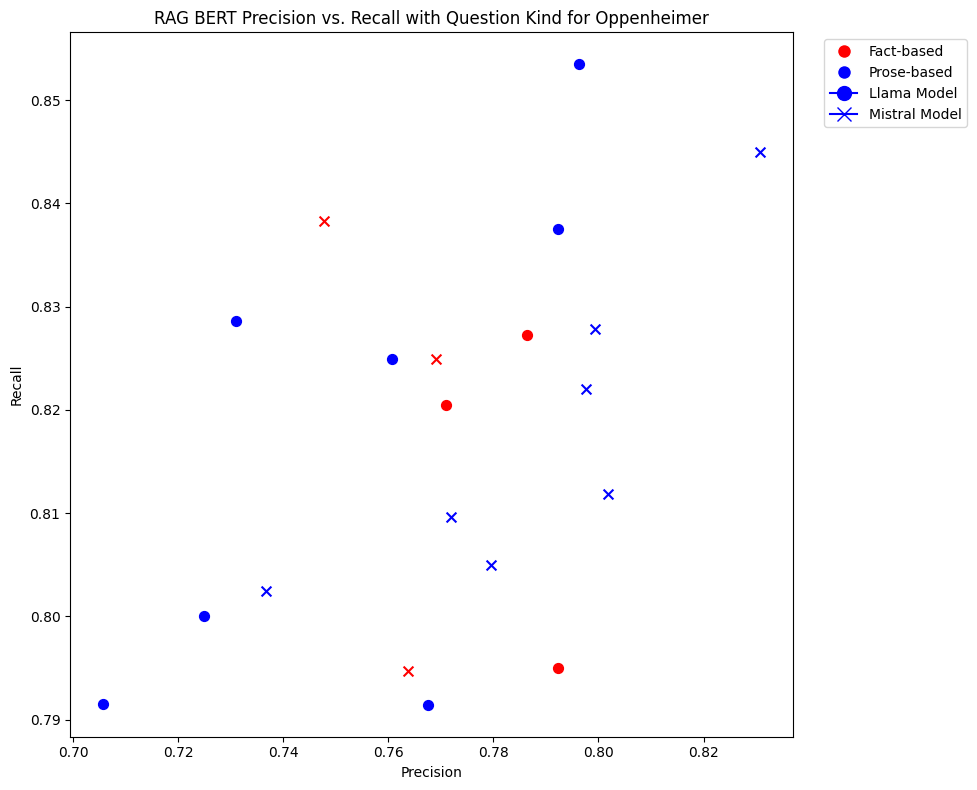

In [198]:
import matplotlib.pyplot as plt

# Assuming 'Question_kind_Oppenheimer' contains the kind of each question
colors = ['red' if kind == 'Fact' else 'blue' for kind in Question_kind_Oppenheimer['Question_Kind']]

# Recreating custom legend for question kinds and models
question_kind_legend_items = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', label='Fact-based', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', label='Prose-based', markersize=10),
    plt.Line2D([0], [0], marker='o', color='b', markerfacecolor='blue', label='Llama Model', markersize=10),
    plt.Line2D([0], [0], marker='x', color='b', markerfacecolor='cyan', label='Mistral Model', markersize=10)
]

# Example for Precision vs. Recall with Question Kind, including Llama and Mistral
plt.figure(figsize=(10, 8))
# Llama Model
for i, (prec, rec) in enumerate(zip(RAG_BERT_Llama2_Oppenheimer['Precision'], RAG_BERT_Llama2_Oppenheimer['Recall'])):
    plt.scatter(prec, rec, color=colors[i], marker='o', s=50)  # Using 'o' marker for Llama
# Mistral Model
for i, (prec, rec) in enumerate(zip(RAG_BERT_Mistral_Oppenheimer['Precision'], RAG_BERT_Mistral_Oppenheimer['Recall'])):
    plt.scatter(prec, rec, color=colors[i], marker='x', s=50)  # Using 'x' marker for Mistral

plt.title('RAG BERT Precision vs. Recall with Question Kind for Oppenheimer')
plt.xlabel('Precision')
plt.ylabel('Recall')

# Adding legends for question kinds outside the plot, including model distinction
plt.legend(handles=question_kind_legend_items, loc='upper right', bbox_to_anchor=(1.25, 1))

plt.tight_layout()
plt.show()


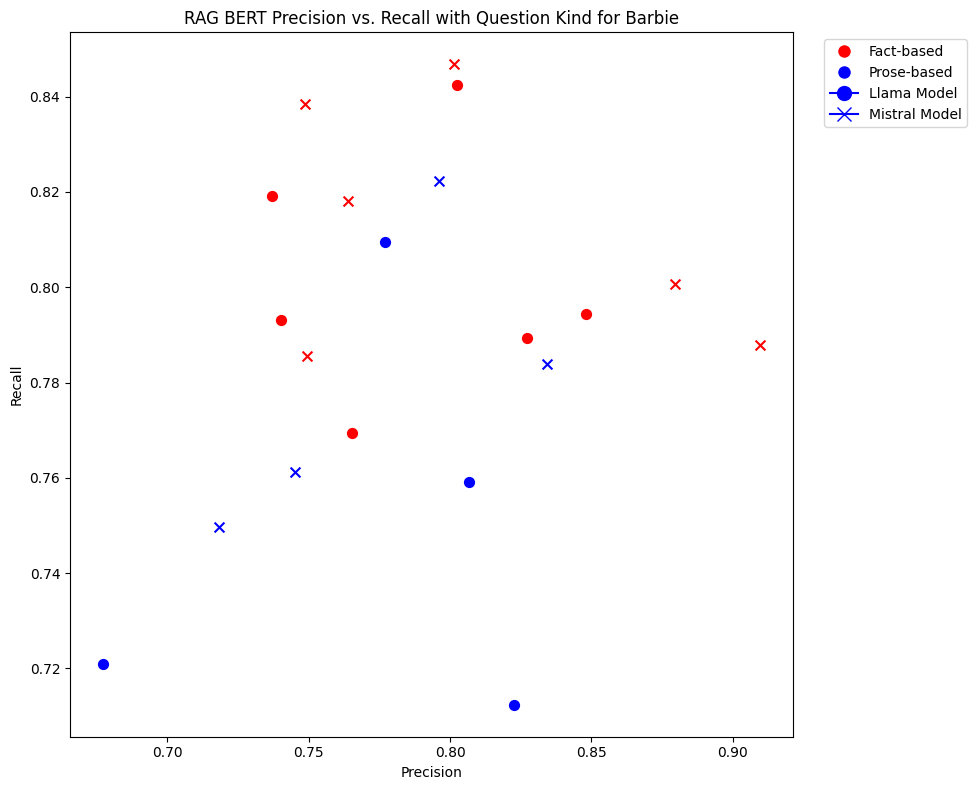

In [199]:
import matplotlib.pyplot as plt

# Assuming 'Question_kind_Barbie' contains the kind of each question
colors = ['red' if kind == 'Fact' else 'blue' for kind in Question_kind_Barbie['Question_Kind']]

# Recreating custom legend for question kinds and models
question_kind_legend_items = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', label='Fact-based', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', label='Prose-based', markersize=10),
    plt.Line2D([0], [0], marker='o', color='b', markerfacecolor='blue', label='Llama Model', markersize=10),
    plt.Line2D([0], [0], marker='x', color='b', markerfacecolor='cyan', label='Mistral Model', markersize=10)
]

# Example for Precision vs. Recall with Question Kind, including Llama and Mistral
plt.figure(figsize=(10, 8))
# Llama Model
for i, (prec, rec) in enumerate(zip(RAG_BERT_Llama2_Barbie['Precision'], RAG_BERT_Llama2_Barbie['Recall'])):
    plt.scatter(prec, rec, color=colors[i], marker='o', s=50)  # Using 'o' marker for Llama
# Mistral Model
for i, (prec, rec) in enumerate(zip(RAG_BERT_Mistral_Barbie['Precision'], RAG_BERT_Mistral_Barbie['Recall'])):
    plt.scatter(prec, rec, color=colors[i], marker='x', s=50)  # Using 'x' marker for Mistral

plt.title('RAG BERT Precision vs. Recall with Question Kind for Barbie')
plt.xlabel('Precision')
plt.ylabel('Recall')

# Adding legends for question kinds outside the plot, including model distinction
plt.legend(handles=question_kind_legend_items, loc='upper right', bbox_to_anchor=(1.25, 1))

plt.tight_layout()
plt.show()


### Semantic Search 

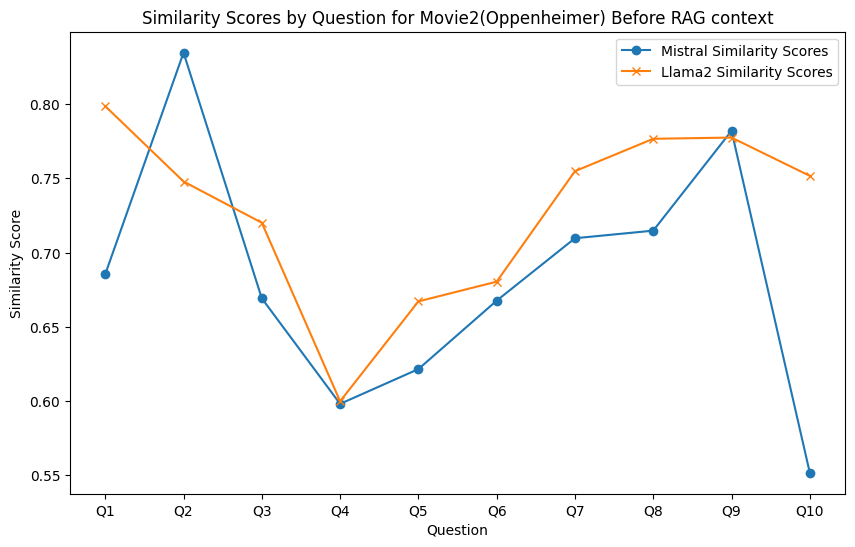

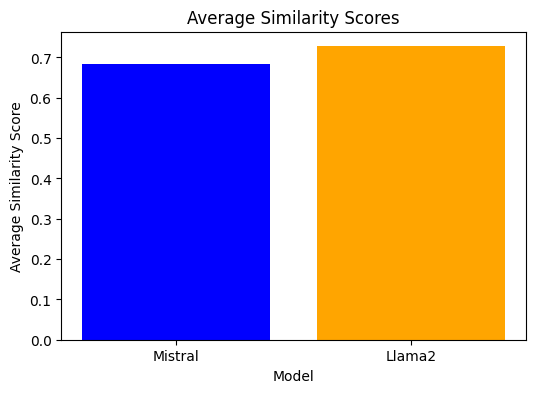

In [204]:


questions = ["Q1", "Q2", "Q3", "Q4", "Q5", "Q6", "Q7", "Q8", "Q9", "Q10"]

# Plotting similarity scores for each model across questions
plt.figure(figsize=(10, 6))
plt.plot(questions, NO_RAG_Oppenheimer_mistral_scores, label='Mistral Similarity Scores', marker='o')
plt.plot(questions, NO_RAG_Oppenheimer_llama2_scores, label='Llama2 Similarity Scores', marker='x')
plt.title('Similarity Scores by Question for Movie2(Oppenheimer) Before RAG context')
plt.xlabel('Question')
plt.ylabel('Similarity Score')
plt.legend()
plt.show()

# Plotting average similarity scores for both models
NO_RAG_Oppenheimer_average_scores = [np.mean(NO_RAG_Oppenheimer_mistral_scores), np.mean(NO_RAG_Oppenheimer_llama2_scores)]
models = ['Mistral', 'Llama2']

plt.figure(figsize=(6, 4))
plt.bar(models, NO_RAG_Oppenheimer_average_scores, color=['blue', 'orange'])
plt.title('Average Similarity Scores')
plt.xlabel('Model')
plt.ylabel('Average Similarity Score')
plt.show()

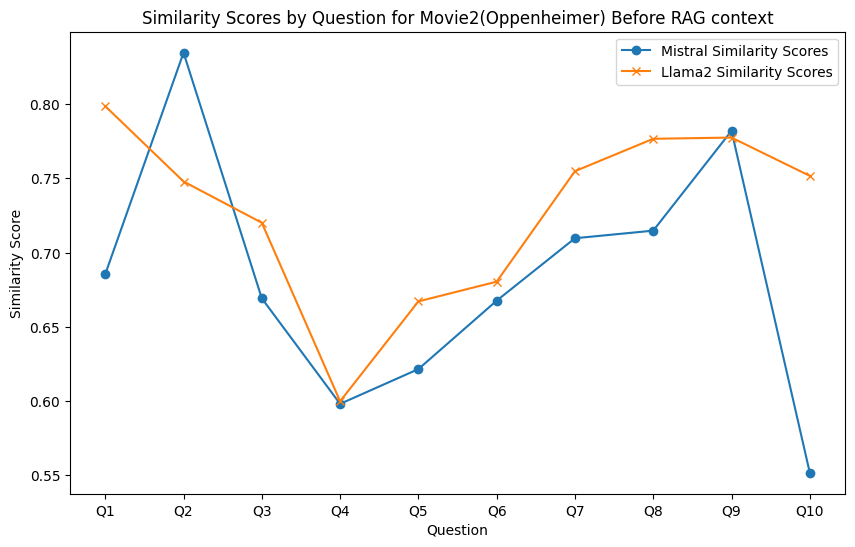

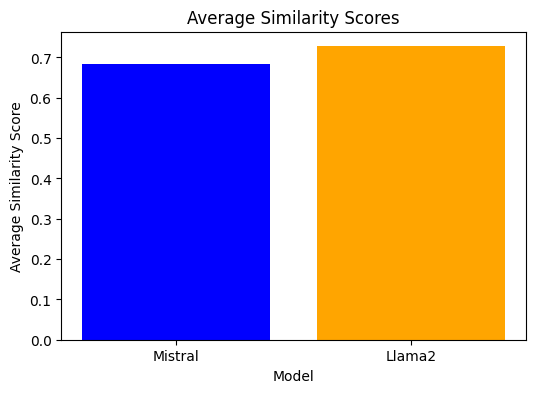

In [205]:


questions = ["Q1", "Q2", "Q3", "Q4", "Q5", "Q6", "Q7", "Q8", "Q9", "Q10"]

# Plotting similarity scores for each model across questions
plt.figure(figsize=(10, 6))
plt.plot(questions, NO_RAG_Oppenheimer_mistral_scores, label='Mistral Similarity Scores', marker='o')
plt.plot(questions, NO_RAG_Oppenheimer_llama2_scores, label='Llama2 Similarity Scores', marker='x')
plt.title('Similarity Scores by Question for Movie2(Oppenheimer) Before RAG context')
plt.xlabel('Question')
plt.ylabel('Similarity Score')
plt.legend()
plt.show()

# Plotting average similarity scores for both models
NO_RAG_Oppenheimer_average_scores = [np.mean(NO_RAG_Oppenheimer_mistral_scores), np.mean(NO_RAG_Oppenheimer_llama2_scores)]
models = ['Mistral', 'Llama2']

plt.figure(figsize=(6, 4))
plt.bar(models, NO_RAG_Oppenheimer_average_scores, color=['blue', 'orange'])
plt.title('Average Similarity Scores')
plt.xlabel('Model')
plt.ylabel('Average Similarity Score')
plt.show()

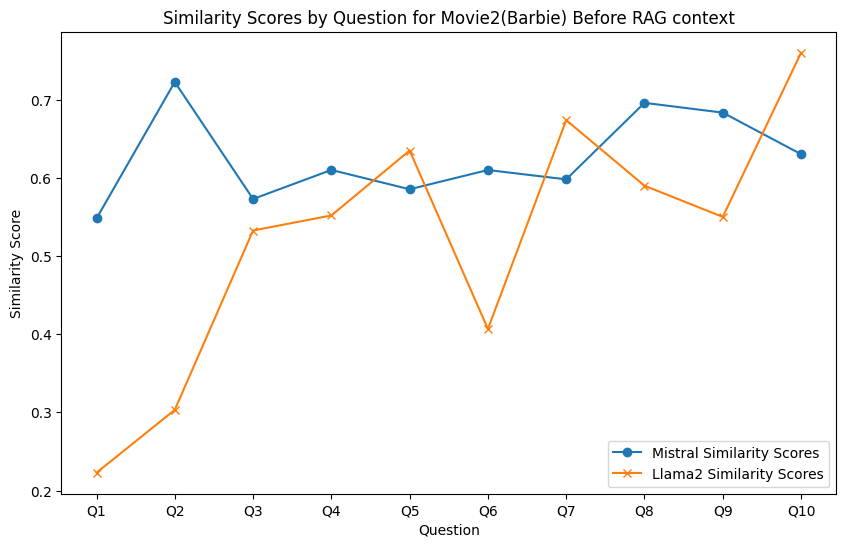

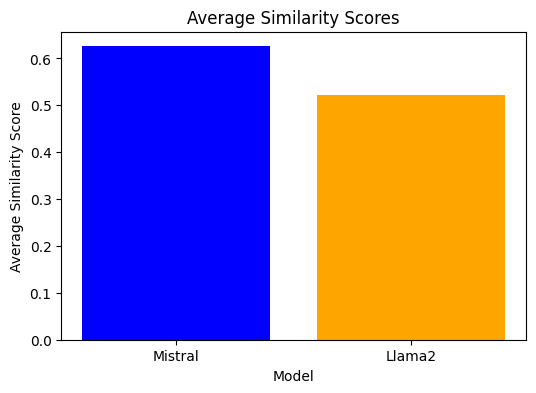

In [206]:

questions = ["Q1", "Q2", "Q3", "Q4", "Q5", "Q6", "Q7", "Q8", "Q9", "Q10"]

# Plotting similarity scores for each model across questions
plt.figure(figsize=(10, 6))
plt.plot(questions, NO_RAG_Barbie_mistral_scores, label='Mistral Similarity Scores', marker='o')
plt.plot(questions, NO_RAG_Barbie_llama2_scores, label='Llama2 Similarity Scores', marker='x')
plt.title('Similarity Scores by Question for Movie2(Barbie) Before RAG context')
plt.xlabel('Question')
plt.ylabel('Similarity Score')
plt.legend()
plt.show()

# Plotting average similarity scores for both models
NO_RAG_BARBIE_average_scores = [np.mean(NO_RAG_Barbie_mistral_scores), np.mean(NO_RAG_Barbie_llama2_scores)]
models = ['Mistral', 'Llama2']

plt.figure(figsize=(6, 4))
plt.bar(models, NO_RAG_BARBIE_average_scores, color=['blue', 'orange'])
plt.title('Average Similarity Scores')
plt.xlabel('Model')
plt.ylabel('Average Similarity Score')
plt.show()


In [241]:
RAG_Barbie_llama2_scores = llama2_scores
RAG_Barbie_mistral_scores = mistral_scores

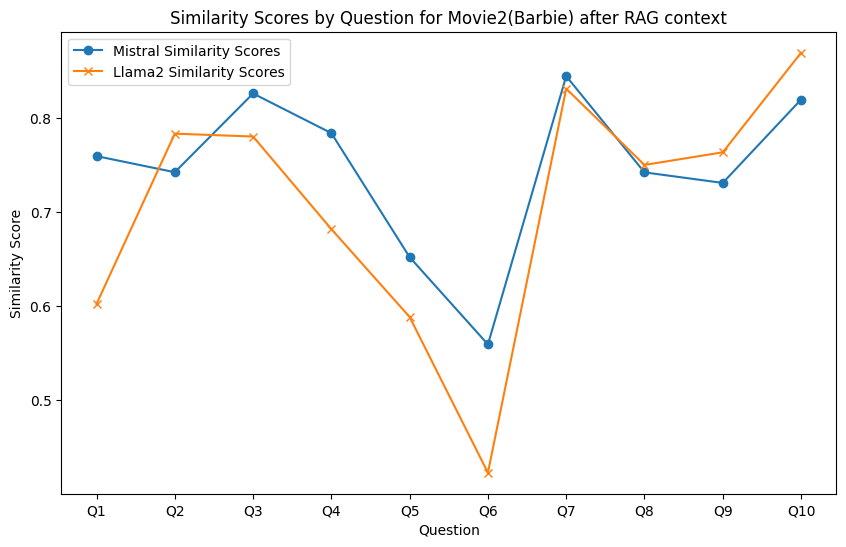

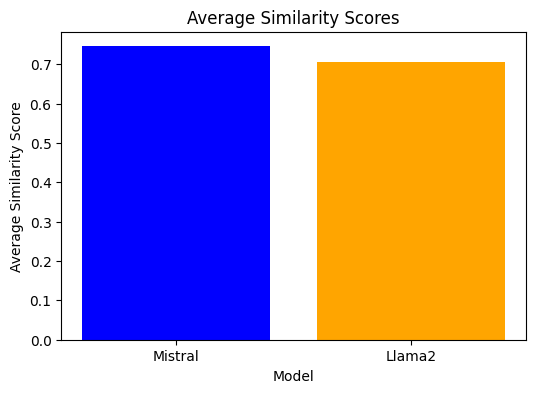

In [207]:

questions = ["Q1", "Q2", "Q3", "Q4", "Q5", "Q6", "Q7", "Q8", "Q9", "Q10"]

# Plotting similarity scores for each model across questions
plt.figure(figsize=(10, 6))
plt.plot(questions, RAG_Barbie_mistral_scores, label='Mistral Similarity Scores', marker='o')
plt.plot(questions, RAG_Barbie_mistral_scores, label='Llama2 Similarity Scores', marker='x')
plt.title('Similarity Scores by Question for Movie2(Barbie) after RAG context')
plt.xlabel('Question')
plt.ylabel('Similarity Score')
plt.legend()
plt.show()

# Plotting average similarity scores for both models
average_scores = [np.mean(RAG_Barbie_mistral_scores), np.mean(RAG_Barbie_mistral_scores)]
models = ['Mistral', 'Llama2']

plt.figure(figsize=(6, 4))
plt.bar(models, average_scores, color=['blue', 'orange'])
plt.title('Average Similarity Scores')
plt.xlabel('Model')
plt.ylabel('Average Similarity Score')
plt.show()

In [209]:
import time
import numpy as np
import os
from sentence_transformers import SentenceTransformer, util
from llama_index.core import VectorStoreIndex, SimpleDirectoryReader, StorageContext, load_index_from_storage, Settings
from llama_index.core.embeddings import resolve_embed_model
from llama_index.llms.ollama import Ollama

# Path to persistently store the indexed data
Persist_DIR = "./storageOppenheimer"

# Check if the persistent storage directory exists; if not, initialize and load documents
if not os.path.exists(Persist_DIR):
    print("Initializing storage and loading documents.")
    documents = SimpleDirectoryReader("Data/Oppenheimer").load_data()
    Settings.embed_model = resolve_embed_model("local:BAAI/bge-small-en-v1.5")
    index = VectorStoreIndex.from_documents(documents)
    index.storage_context.persist(persist_dir=Persist_DIR)
else:
    print("Loading existing storage.")
    storage_context = StorageContext.from_defaults(persist_dir=Persist_DIR)
    Settings.embed_model = resolve_embed_model("local:BAAI/bge-small-en-v1.5")
    index = load_index_from_storage(storage_context)

# Load the sentence transformer model
model = SentenceTransformer('all-MiniLM-L6-v2')

RAG_Oppenheimer_mistral_scores = []
RAG_Oppenheimer_llama2_scores = []
RAG_Oppenheimer_mistral_times = []
RAG_Oppenheimer_llama2_times = []

for i in range(len(OppenheimerQA_verbose["Question"])):
    question = OppenheimerQA_verbose["Question"][i]
    reference_text = OppenheimerQA_verbose["Answer"][i]

    # Mistral
    start_time = time.time()
    Settings.llm = Ollama(model="mistral", request_timeout=50.0)
    mistral_query_engine = index.as_query_engine()
    mistral_response = mistral_query_engine.query(question)
    mistral_time = time.time() - start_time
    RAG_Oppenheimer_mistral_times.append(mistral_time)

    # Llama2
    start_time = time.time()
    Settings.llm = Ollama(model="llama2", request_timeout=50.0)
    llama2_query_engine = index.as_query_engine()
    llama2_response = llama2_query_engine.query(question)
    llama2_time = time.time() - start_time
    RAG_Oppenheimer_llama2_times.append(llama2_time)

    # Encode the responses and the reference text to get their embeddings
    responses_embeddings = model.encode([mistral_response.response, llama2_response.response], convert_to_tensor=True)
    reference_embedding = model.encode(reference_text, convert_to_tensor=True)

    # Compute semantic similarity scores between the LLM responses and the reference text
    similarity_scores = util.pytorch_cos_sim(responses_embeddings, reference_embedding)

    RAG_Oppenheimer_mistral_scores.append(similarity_scores[0][0].item())
    RAG_Oppenheimer_llama2_scores.append(similarity_scores[1][0].item())

print("Average Mistral Similarity Score:", np.mean(RAG_Oppenheimer_mistral_scores))
print("Average Llama2 Similarity Score:", np.mean(RAG_Oppenheimer_llama2_scores))
print("Average Mistral Response Time:", np.mean(RAG_Oppenheimer_mistral_times))
print("Average Llama2 Response Time:", np.mean(RAG_Oppenheimer_llama2_times))

# Printing individual scores for review
for i in range(len(RAG_Oppenheimer_mistral_scores)):
    print(f"Q{i+1} Mistral Score: {RAG_Oppenheimer_mistral_scores[i]}, Time: {RAG_Oppenheimer_mistral_times[i]}")
    print(f"Q{i+1} Llama2 Score: {RAG_Oppenheimer_llama2_scores[i]}, Time: {RAG_Oppenheimer_llama2_times[i]}")


Loading existing storage.
Average Mistral Similarity Score: 0.7404147148132324
Average Llama2 Similarity Score: 0.7582681536674499
Average Mistral Response Time: 20.928688216209412
Average Llama2 Response Time: 30.083823370933533
Q1 Mistral Score: 0.884268045425415, Time: 6.070004940032959
Q1 Llama2 Score: 0.8458335399627686, Time: 34.12549877166748
Q2 Mistral Score: 0.6583249568939209, Time: 21.421052932739258
Q2 Llama2 Score: 0.7703788876533508, Time: 23.588365077972412
Q3 Mistral Score: 0.7860623598098755, Time: 21.872661113739014
Q3 Llama2 Score: 0.8166218996047974, Time: 26.986494064331055
Q4 Mistral Score: 0.691191554069519, Time: 23.649930000305176
Q4 Llama2 Score: 0.7402843832969666, Time: 35.781481981277466
Q5 Mistral Score: 0.7124372720718384, Time: 25.50288486480713
Q5 Llama2 Score: 0.6681159138679504, Time: 30.62000012397766
Q6 Mistral Score: 0.8121469020843506, Time: 22.321843147277832
Q6 Llama2 Score: 0.761898398399353, Time: 26.266409873962402
Q7 Mistral Score: 0.7291285

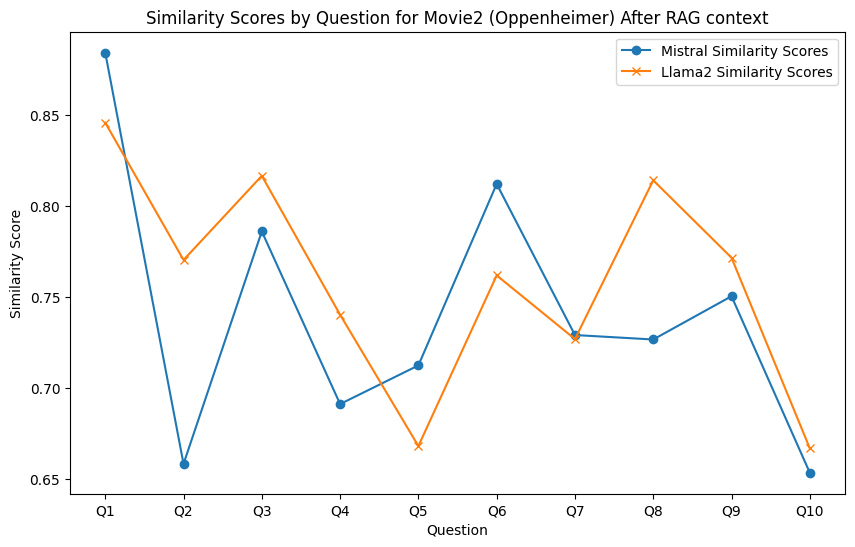

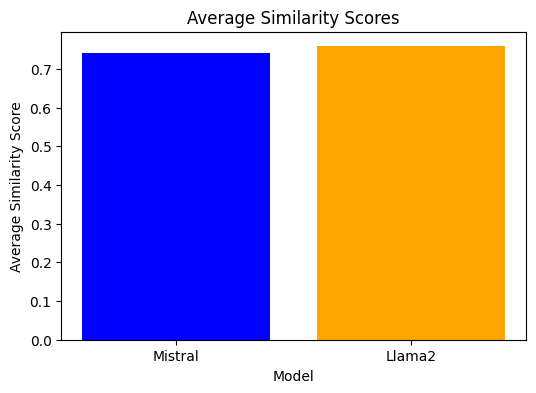

In [210]:
import matplotlib.pyplot as plt

questions = ["Q1", "Q2", "Q3", "Q4", "Q5", "Q6", "Q7", "Q8", "Q9", "Q10"]

# Plotting similarity scores for each model across questions
plt.figure(figsize=(10, 6))
plt.plot(questions, RAG_Oppenheimer_mistral_scores, label='Mistral Similarity Scores', marker='o')
plt.plot(questions, RAG_Oppenheimer_llama2_scores, label='Llama2 Similarity Scores', marker='x')
plt.title('Similarity Scores by Question for Movie2 (Oppenheimer) After RAG context')
plt.xlabel('Question')
plt.ylabel('Similarity Score')
plt.legend()
plt.show()

# Plotting average similarity scores for both models
RAG_Oppenheimer_average_scores = [np.mean(RAG_Oppenheimer_mistral_scores), np.mean(RAG_Oppenheimer_llama2_scores)]
models = ['Mistral', 'Llama2']

plt.figure(figsize=(6, 4))
plt.bar(models, RAG_Oppenheimer_average_scores, color=['blue', 'orange'])
plt.title('Average Similarity Scores')
plt.xlabel('Model')
plt.ylabel('Average Similarity Score')
plt.show()


In [211]:
RAG_Oppenheimer_mistral_scores

[0.884268045425415,
 0.6583249568939209,
 0.7860623598098755,
 0.691191554069519,
 0.7124372720718384,
 0.8121469020843506,
 0.7291285991668701,
 0.7266712188720703,
 0.7504568099975586,
 0.6534594297409058]

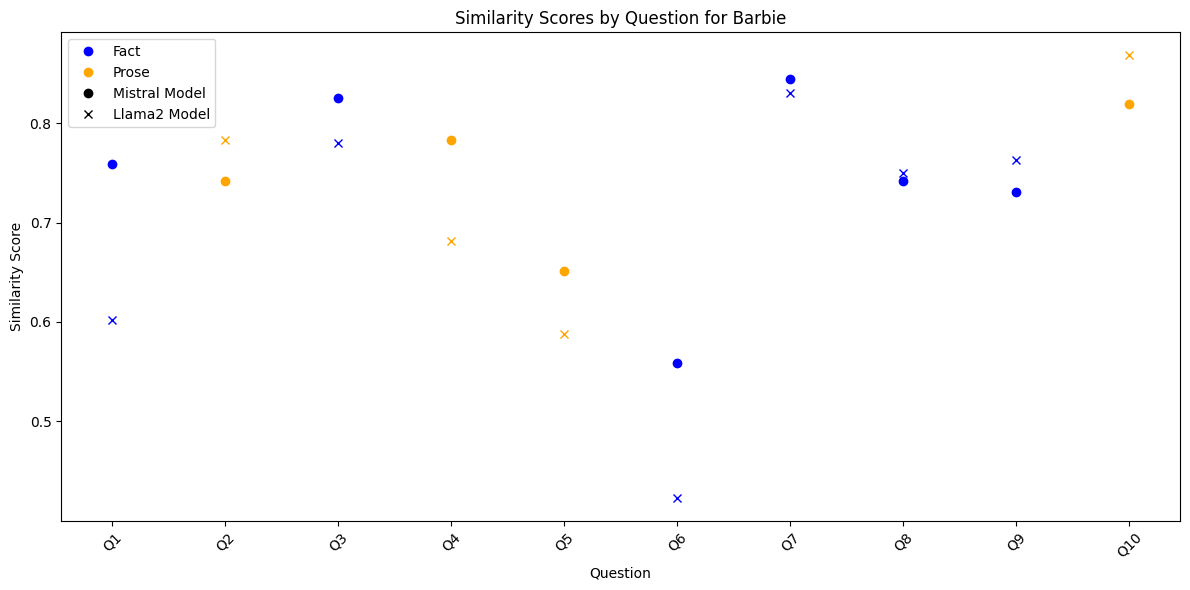

In [214]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data (replace with actual paths and data)
BarbieQA_df = pd.read_csv('BarbieQA.csv')

# Extract question kinds
# This assumes that the DataFrame has a column that specifies whether a question is 'Fact' or 'Prose'
question_kinds = BarbieQA_df['Question_Kind'].tolist()  # or replace with the actual column name

# Define color map for question kinds
color_map = {'Fact': 'blue', 'Prose': 'orange'}


# Plotting similarity scores for each model across questions
plt.figure(figsize=(12, 6))

for i, kind in enumerate(question_kinds):
    plt.plot(i, mistral_scores[i], label='Mistral' if i == 0 else "", marker='o', color=color_map[kind])
    plt.plot(i, llama2_scores[i], label='Llama2' if i == 0 else "", marker='x', color=color_map[kind])

# Create custom legends for models and question kinds
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='blue', marker='o', linestyle='None', label='Fact'),
                Line2D([0], [0], color='orange', marker='o', linestyle='None', label='Prose'),
                Line2D([0], [0], color='black', marker='o', linestyle='None', label='Mistral Model'),
                Line2D([0], [0], color='black', marker='x', linestyle='None', label='Llama2 Model')]

plt.legend(handles=custom_lines, loc='best')

plt.xticks(ticks=np.arange(len(question_kinds)), labels=['Q' + str(i+1) for i in range(len(question_kinds))], rotation=45)
plt.title('Similarity Scores by Question for Barbie')
plt.xlabel('Question')
plt.ylabel('Similarity Score')

plt.tight_layout()
plt.show()


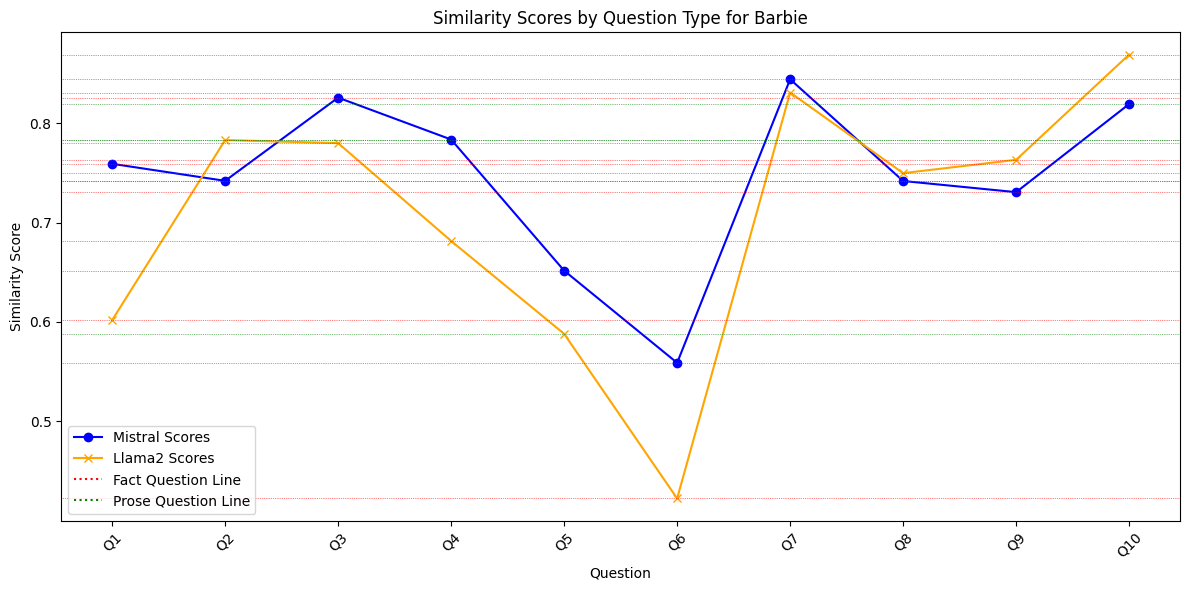

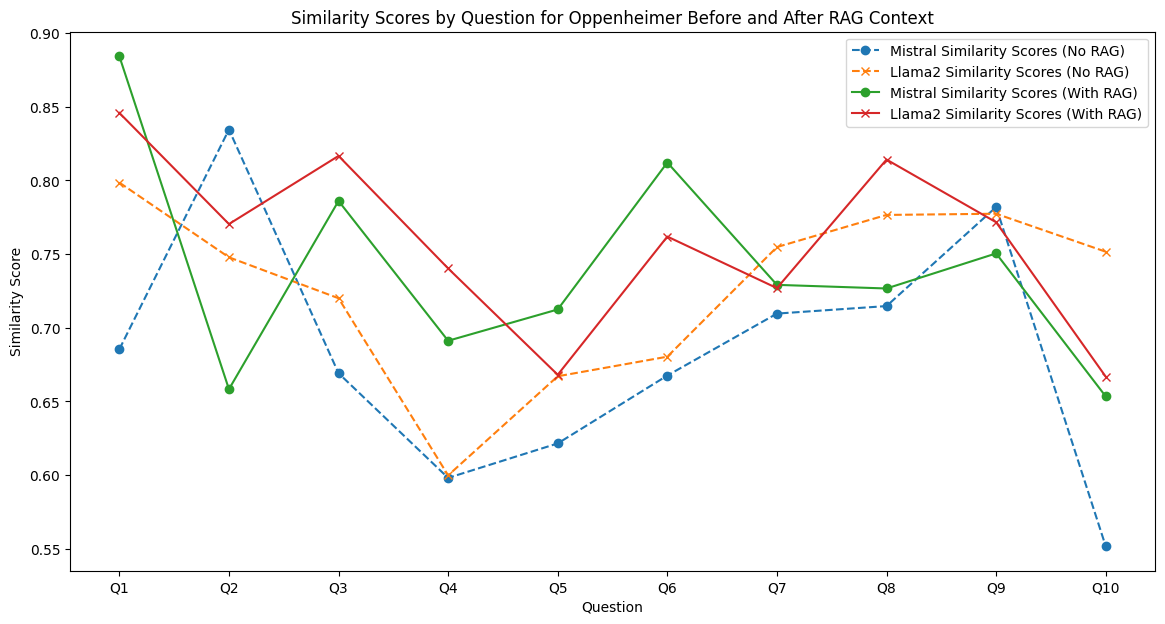

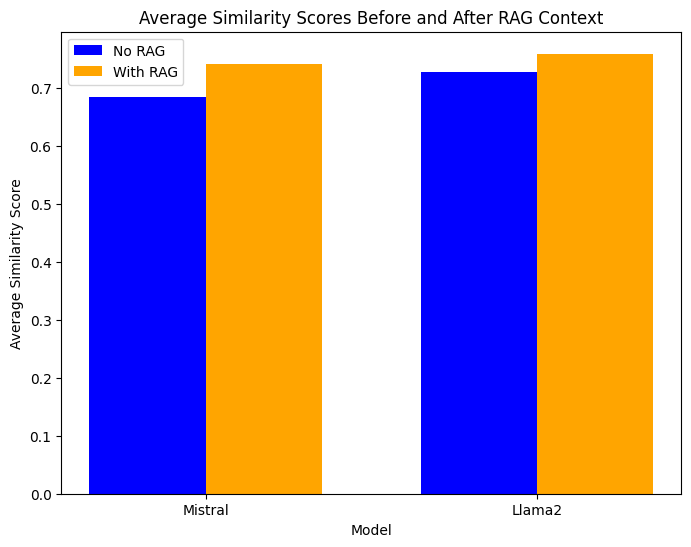

In [217]:
import matplotlib.pyplot as plt
import numpy as np


questions = ["Q1", "Q2", "Q3", "Q4", "Q5", "Q6", "Q7", "Q8", "Q9", "Q10"]

# Plotting similarity scores for each model across questions before and after RAG context
plt.figure(figsize=(14, 7))
plt.plot(questions, NO_RAG_Oppenheimer_mistral_scores, label='Mistral Similarity Scores (No RAG)', marker='o', linestyle='--')
plt.plot(questions, NO_RAG_Oppenheimer_llama2_scores, label='Llama2 Similarity Scores (No RAG)', marker='x', linestyle='--')
plt.plot(questions, RAG_Oppenheimer_mistral_scores, label='Mistral Similarity Scores (With RAG)', marker='o', linestyle='-')
plt.plot(questions, RAG_Oppenheimer_llama2_scores, label='Llama2 Similarity Scores (With RAG)', marker='x', linestyle='-')
plt.title('Similarity Scores by Question for Oppenheimer Before and After RAG Context')
plt.xlabel('Question')
plt.ylabel('Similarity Score')
plt.legend()
plt.show()

# Plotting average similarity scores for both models before and after RAG context
# NO_RAG_Oppenheimer_average_scores = [np.mean(NO_RAG_Oppenheimer_mistral_scores), np.mean(NO_RAG_Oppenheimer_llama2_scores)]
# RAG_Oppenheimer_average_scores = [np.mean(RAG_Oppenheimer_mistral_scores), np.mean(RAG_Oppenheimer_llama2_scores)]
models = ['Mistral', 'Llama2']

# X axis locations for the groups
ind = np.arange(len(models))
width = 0.35  # the width of the bars

plt.figure(figsize=(8, 6))
plt.bar(ind, NO_RAG_Oppenheimer_average_scores, width, label='No RAG', color='blue')
plt.bar(ind + width, RAG_Oppenheimer_average_scores, width, label='With RAG', color='orange')

plt.title('Average Similarity Scores Before and After RAG Context')
plt.xlabel('Model')
plt.ylabel('Average Similarity Score')
plt.xticks(ind + width / 2, models)
plt.legend()
plt.show()


In [219]:
Question_kind_Oppenheimer["Question_Kind"]

0    Prose
1    Prose
2    Prose
3     Fact
4     Fact
5    Prose
6     Fact
7    Prose
8    Prose
9    Prose
Name: Question_Kind, dtype: object

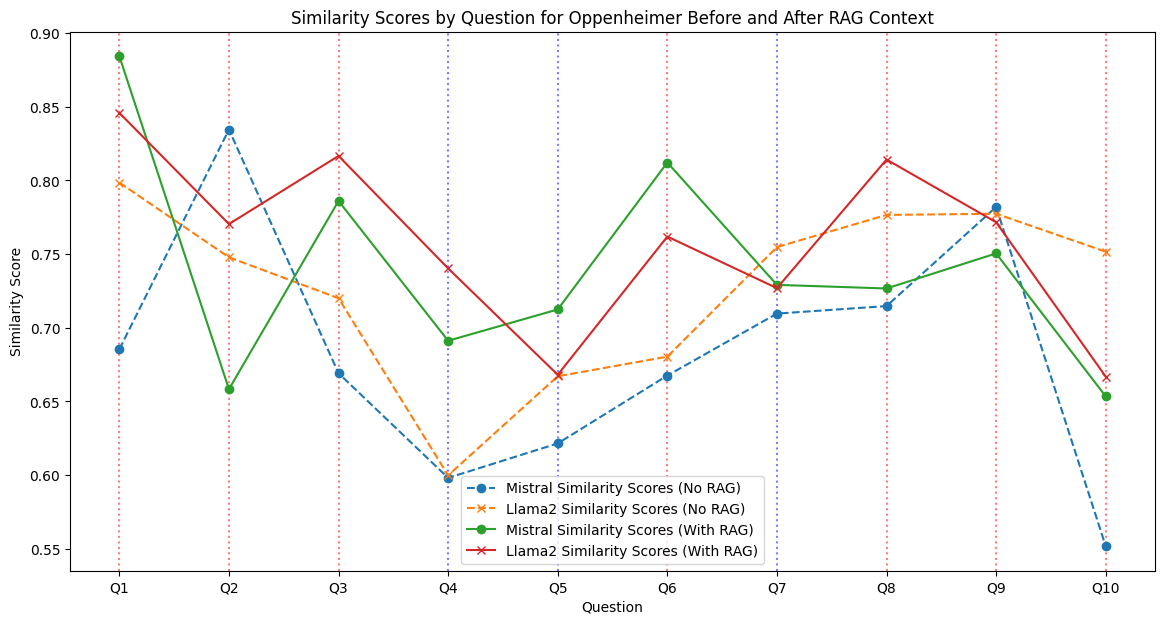

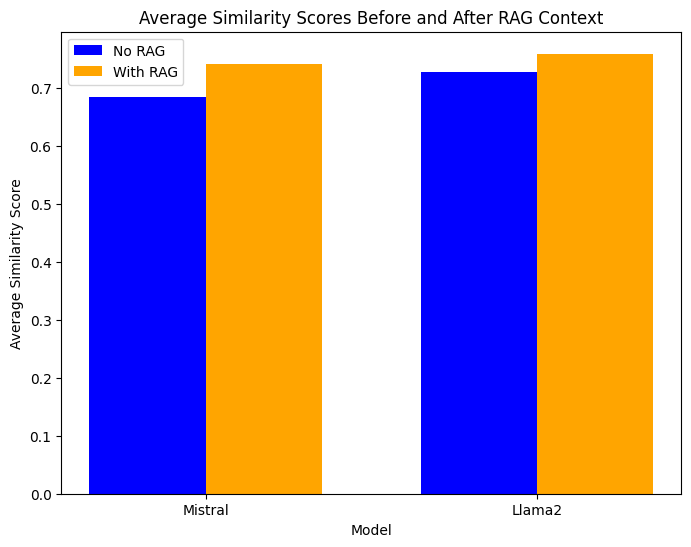

In [221]:
import matplotlib.pyplot as plt
import numpy as np

questions = ["Q1", "Q2", "Q3", "Q4", "Q5", "Q6", "Q7", "Q8", "Q9", "Q10"]

# Plotting similarity scores for each model across questions before and after RAG context
plt.figure(figsize=(14, 7))
for i, kind in enumerate(Question_kind_Oppenheimer['Question_Kind']):
    line_color = 'blue' if kind == 'Fact' else 'red'
    plt.axvline(x=i, linestyle=':', color=line_color, alpha=0.5)  # Vertical line for question kind

plt.plot(questions, NO_RAG_Oppenheimer_mistral_scores, label='Mistral Similarity Scores (No RAG)', marker='o', linestyle='--')
plt.plot(questions, NO_RAG_Oppenheimer_llama2_scores, label='Llama2 Similarity Scores (No RAG)', marker='x', linestyle='--')
plt.plot(questions, RAG_Oppenheimer_mistral_scores, label='Mistral Similarity Scores (With RAG)', marker='o', linestyle='-')
plt.plot(questions, RAG_Oppenheimer_llama2_scores, label='Llama2 Similarity Scores (With RAG)', marker='x', linestyle='-')
plt.title('Similarity Scores by Question for Oppenheimer Before and After RAG Context')
plt.xlabel('Question')
plt.ylabel('Similarity Score')
plt.legend()
plt.show()

# Plotting average similarity scores for both models before and after RAG context
# NO_RAG_Oppenheimer_average_scores = [np.mean(NO_RAG_Oppenheimer_mistral_scores), np.mean(NO_RAG_Oppenheimer_llama2_scores)]
# RAG_Oppenheimer_average_scores = [np.mean(RAG_Oppenheimer_mistral_scores), np.mean(RAG_Oppenheimer_llama2_scores)]
models = ['Mistral', 'Llama2']

# X axis locations for the groups
ind = np.arange(len(models))
width = 0.35  # the width of the bars

plt.figure(figsize=(8, 6))
plt.bar(ind, NO_RAG_Oppenheimer_average_scores, width, label='No RAG', color='blue')
plt.bar(ind + width, RAG_Oppenheimer_average_scores, width, label='With RAG', color='orange')

plt.title('Average Similarity Scores Before and After RAG Context')
plt.xlabel('Model')
plt.ylabel('Average Similarity Score')
plt.xticks(ind + width / 2, models)
plt.legend()
plt.show()


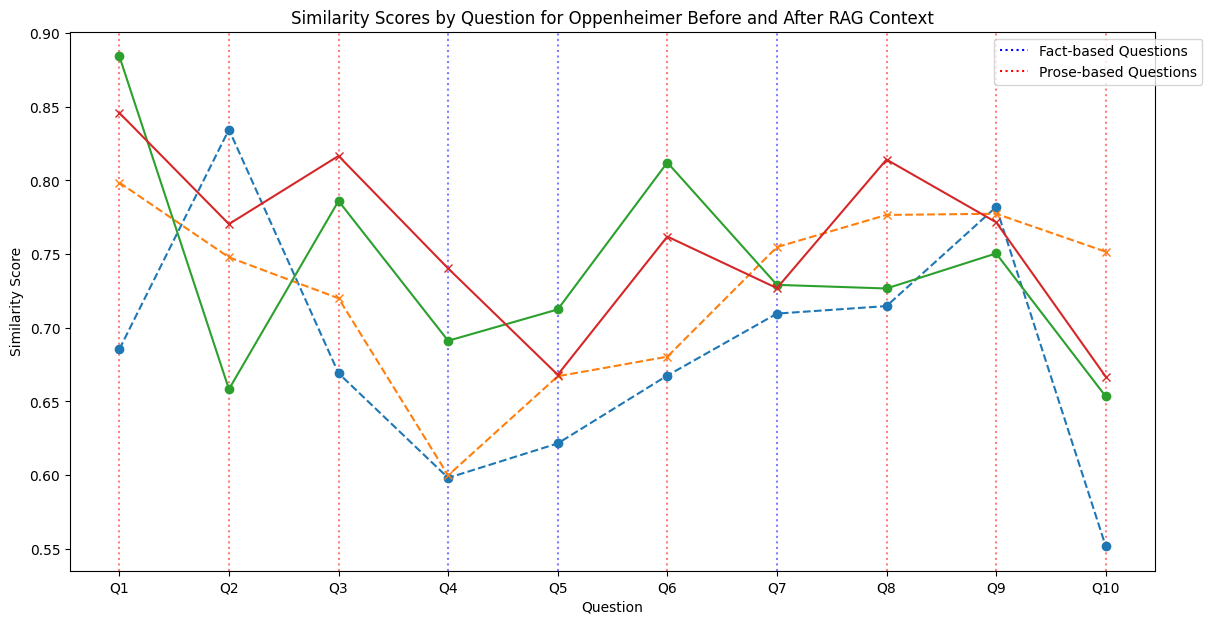

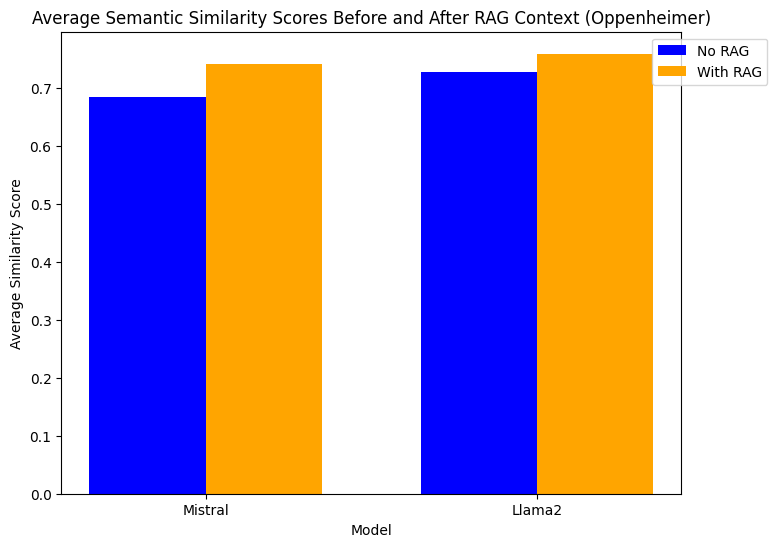

In [234]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

questions = ["Q1", "Q2", "Q3", "Q4", "Q5", "Q6", "Q7", "Q8", "Q9", "Q10"]

# Plotting similarity scores for each model across questions before and after RAG context
plt.figure(figsize=(14, 7))
for i, kind in enumerate(Question_kind_Oppenheimer['Question_Kind']):
    line_color = 'blue' if kind == 'Fact' else 'red'
    plt.axvline(x=i, linestyle=':', color=line_color, alpha=0.5)  # Vertical line for question kind

plt.plot(questions, NO_RAG_Oppenheimer_mistral_scores, label='Mistral Similarity Scores (No RAG)', marker='o', linestyle='--')
plt.plot(questions, NO_RAG_Oppenheimer_llama2_scores, label='Llama2 Similarity Scores (No RAG)', marker='x', linestyle='--')
plt.plot(questions, RAG_Oppenheimer_mistral_scores, label='Mistral Similarity Scores (With RAG)', marker='o', linestyle='-')
plt.plot(questions, RAG_Oppenheimer_llama2_scores, label='Llama2 Similarity Scores (With RAG)', marker='x', linestyle='-')

# Creating custom legend for question kinds
fact_line = plt.Line2D([0], [0], linestyle=':', color='blue', label='Fact-based Questions')
prose_line = plt.Line2D([0], [0], linestyle=':', color='red', label='Prose-based Questions')

# Adding legend for question kinds
plt.legend(handles=[fact_line, prose_line], loc='upper right', bbox_to_anchor=(1.05, 1))

plt.title('Similarity Scores by Question for Oppenheimer Before and After RAG Context')
plt.xlabel('Question')
plt.ylabel('Similarity Score')

# Show plot with legend for question kinds
plt.show()

# Assuming average scores are already calculated
# NO_RAG_Oppenheimer_average_scores = [np.mean(NO_RAG_Oppenheimer_mistral_scores), np.mean(NO_RAG_Oppenheimer_llama2_scores)]
# RAG_Oppenheimer_average_scores = [np.mean(RAG_Oppenheimer_mistral_scores), np.mean(RAG_Oppenheimer_llama2_scores)]

# X axis locations for the groups
ind = np.arange(len(models))
width = 0.35  # the width of the bars

plt.figure(figsize=(8, 6))
plt.bar(ind, NO_RAG_Oppenheimer_average_scores, width, label='No RAG', color='blue')
plt.bar(ind + width, RAG_Oppenheimer_average_scores, width, label='With RAG', color='orange')

plt.title('Average Semantic Similarity Scores Before and After RAG Context (Oppenheimer)')
plt.xlabel('Model')
plt.ylabel('Average Similarity Score')
plt.xticks(ind + width / 2, models)
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.show()


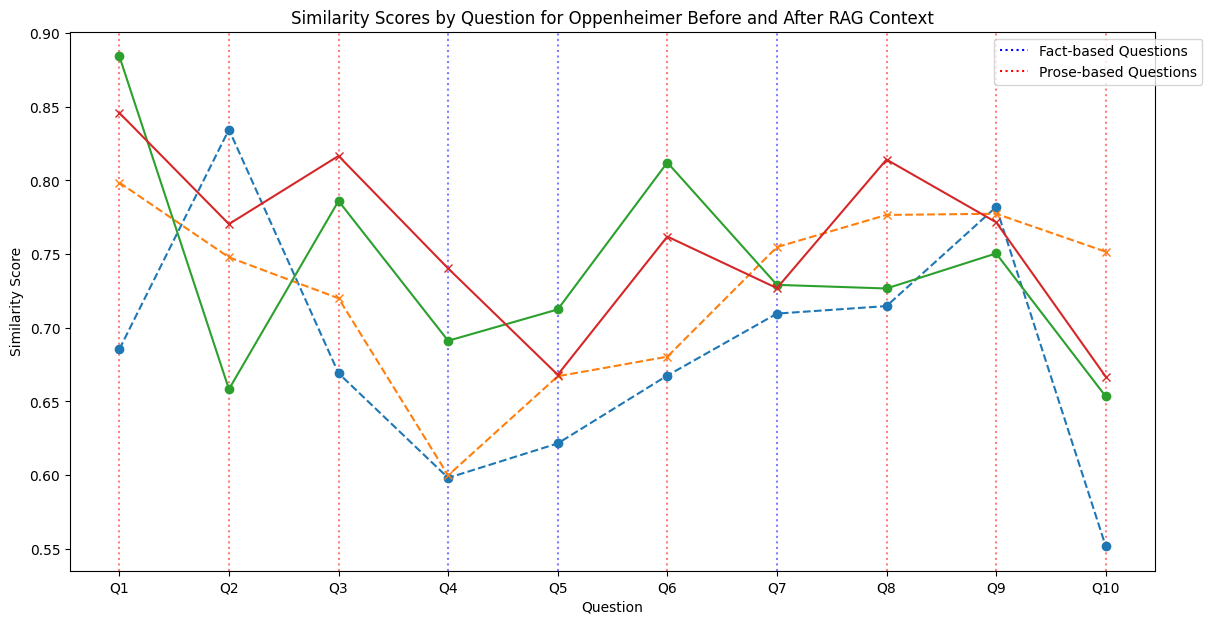

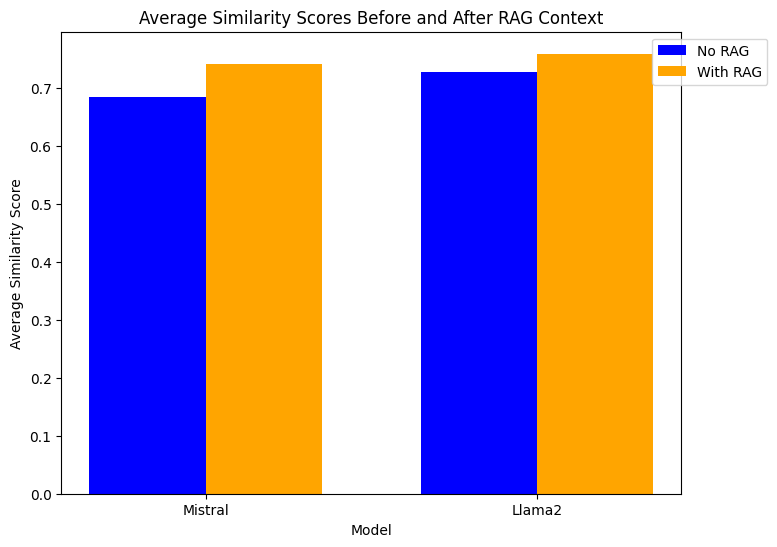

In [228]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

questions = ["Q1", "Q2", "Q3", "Q4", "Q5", "Q6", "Q7", "Q8", "Q9", "Q10"]

# Plotting similarity scores for each model across questions before and after RAG context
plt.figure(figsize=(14, 7))
for i, kind in enumerate(Question_kind_Oppenheimer['Question_Kind']):
    line_color = 'blue' if kind == 'Fact' else 'red'
    plt.axvline(x=i, linestyle=':', color=line_color, alpha=0.5)  # Vertical line for question kind

plt.plot(questions, NO_RAG_Oppenheimer_mistral_scores, label='Mistral Similarity Scores (No RAG)', marker='o', linestyle='--')
plt.plot(questions, NO_RAG_Oppenheimer_llama2_scores, label='Llama2 Similarity Scores (No RAG)', marker='x', linestyle='--')
plt.plot(questions, RAG_Oppenheimer_mistral_scores, label='Mistral Similarity Scores (With RAG)', marker='o', linestyle='-')
plt.plot(questions, RAG_Oppenheimer_llama2_scores, label='Llama2 Similarity Scores (With RAG)', marker='x', linestyle='-')

# Creating custom legend for question kinds
fact_line = plt.Line2D([0], [0], linestyle=':', color='blue', label='Fact-based Questions')
prose_line = plt.Line2D([0], [0], linestyle=':', color='red', label='Prose-based Questions')

# Adding legend for question kinds
plt.legend(handles=[fact_line, prose_line], loc='upper right', bbox_to_anchor=(1.05, 1))

plt.title('Similarity Scores by Question for Oppenheimer Before and After RAG Context')
plt.xlabel('Question')
plt.ylabel('Similarity Score')

# Show plot with legend for question kinds
plt.show()

# Assuming average scores are already calculated
# NO_RAG_Oppenheimer_average_scores = [np.mean(NO_RAG_Oppenheimer_mistral_scores), np.mean(NO_RAG_Oppenheimer_llama2_scores)]
# RAG_Oppenheimer_average_scores = [np.mean(RAG_Oppenheimer_mistral_scores), np.mean(RAG_Oppenheimer_llama2_scores)]

# X axis locations for the groups
ind = np.arange(len(models))
width = 0.35  # the width of the bars

plt.figure(figsize=(8, 6))
plt.bar(ind, NO_RAG_Oppenheimer_average_scores, width, label='No RAG', color='blue')
plt.bar(ind + width, RAG_Oppenheimer_average_scores, width, label='With RAG', color='orange')

plt.title('Average Similarity Scores Before and After RAG Context')
plt.xlabel('Model')
plt.ylabel('Average Similarity Score')
plt.xticks(ind + width / 2, models)
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.show()


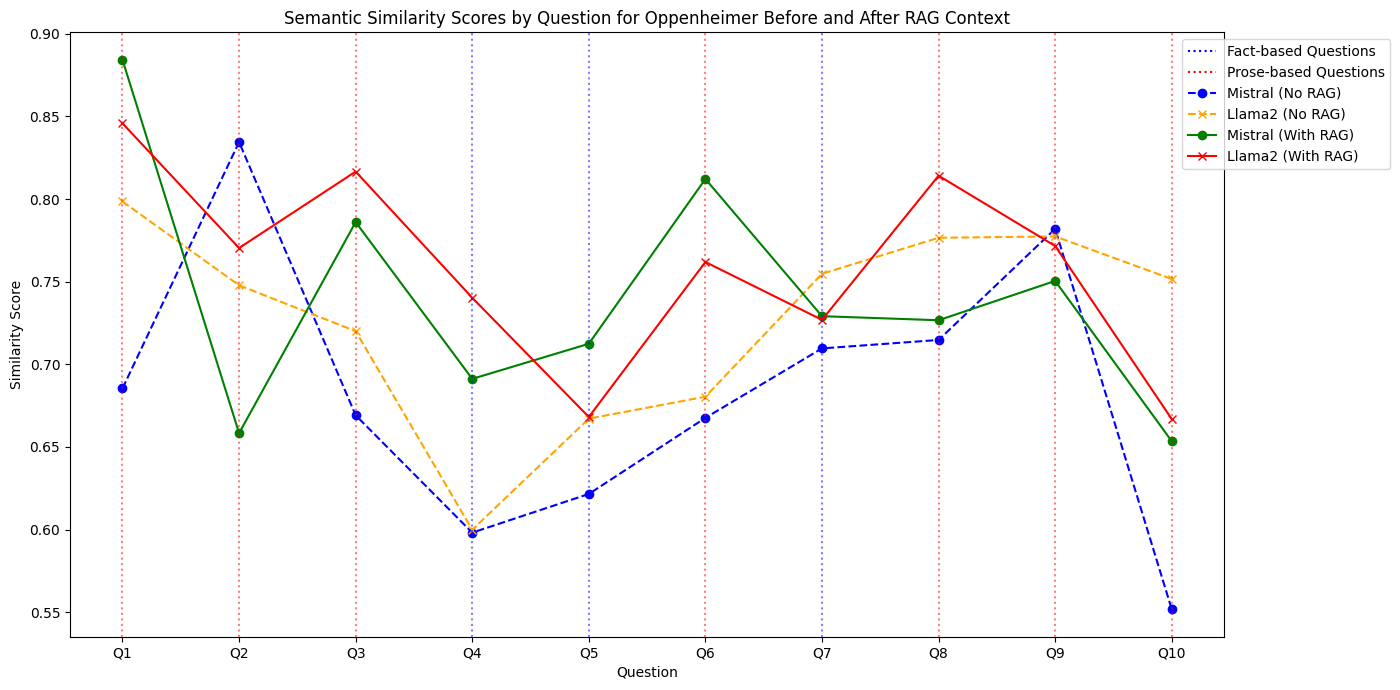

In [233]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


questions = ["Q1", "Q2", "Q3", "Q4", "Q5", "Q6", "Q7", "Q8", "Q9", "Q10"]

# Plotting similarity scores for each model across questions before and after RAG context
plt.figure(figsize=(14, 7))

# Plot similarity scores
plt.plot(questions, NO_RAG_Oppenheimer_mistral_scores, label='Mistral (No RAG)', marker='o', linestyle='--', color='blue')
plt.plot(questions, NO_RAG_Oppenheimer_llama2_scores, label='Llama2 (No RAG)', marker='x', linestyle='--', color='orange')
plt.plot(questions, RAG_Oppenheimer_mistral_scores, label='Mistral (With RAG)', marker='o', linestyle='-', color='green')
plt.plot(questions, RAG_Oppenheimer_llama2_scores, label='Llama2 (With RAG)', marker='x', linestyle='-', color='red')

# Creating custom legend for question kinds
fact_line = plt.Line2D([0], [0], linestyle=':', color='blue', label='Fact-based Questions')
prose_line = plt.Line2D([0], [0], linestyle=':', color='red', label='Prose-based Questions')
mistral_no_rag = plt.Line2D([0], [0], color='blue', marker='o', linestyle='--', label='Mistral (No RAG)')
llama2_no_rag = plt.Line2D([0], [0], color='orange', marker='x', linestyle='--', label='Llama2 (No RAG)')
mistral_with_rag = plt.Line2D([0], [0], color='green', marker='o', linestyle='-', label='Mistral (With RAG)')
llama2_with_rag = plt.Line2D([0], [0], color='red', marker='x', linestyle='-', label='Llama2 (With RAG)')

# Adding the question kind lines for Fact and Prose
for i, kind in enumerate(Question_kind_Oppenheimer['Question_Kind']):
    line_color = 'blue' if kind == 'Fact' else 'red'
    plt.axvline(x=i, linestyle=':', color=line_color, alpha=0.5)

plt.title('Semantic Similarity Scores by Question for Oppenheimer Before and After RAG Context')
plt.xlabel('Question')
plt.ylabel('Similarity Score')

# Adding combined legends for models and question kinds
plt.legend(handles=[fact_line, prose_line, mistral_no_rag, llama2_no_rag, mistral_with_rag, llama2_with_rag], 
           loc='upper right', bbox_to_anchor=(1.15, 1))

plt.tight_layout()
plt.show()


# Main Graphs for Presentation: 

* NON RAG BERT score 

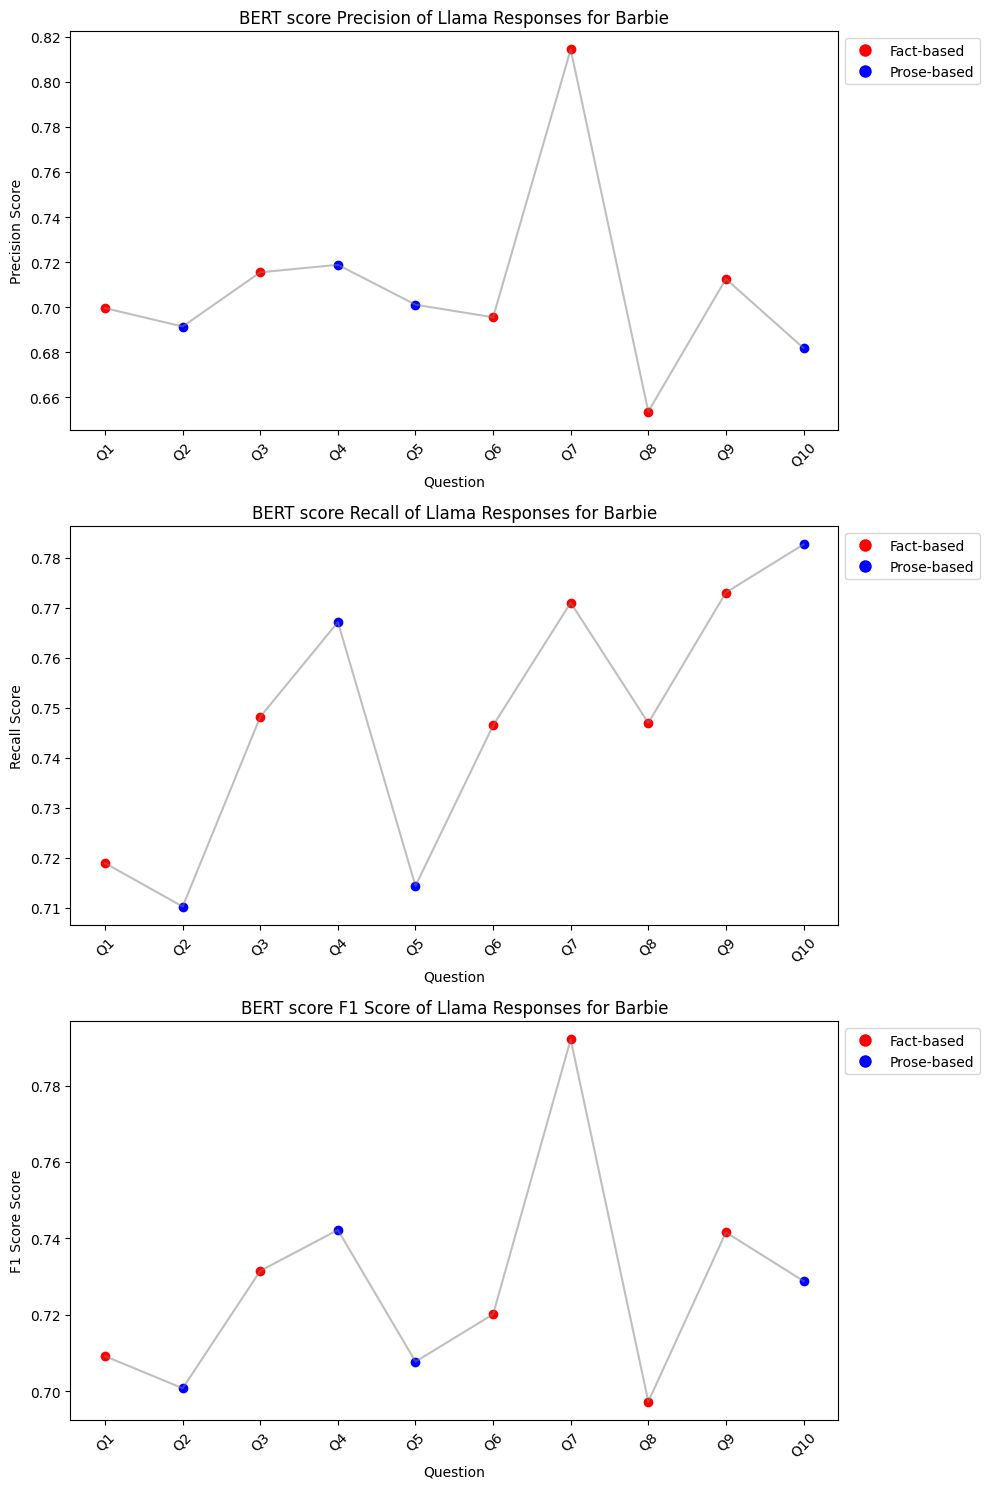

In [109]:
import matplotlib.pyplot as plt

# Assuming BERT_Llama_Barbie DataFrame exists with the required data
# Assuming Question_kind_Barbie DataFrame or a similar structure for question kinds

# Generate question numbers based on the length of the DataFrame
question_numbers = [f'Q{i+1}' for i in range(len(BERT_Llama_Barbie))]

# Assuming colors are determined based on Question Kind from a DataFrame like Question_kind_Barbie
colors = ['red' if kind == 'Fact' else 'blue' for kind in Question_kind_Barbie['Question_Kind']]

# Plotting Precision, Recall, and F1 Scores for Llama Model Responses
fig, ax = plt.subplots(3, 1, figsize=(10, 15))

# Custom legend items
score_legend_items = [plt.Line2D([0], [0], color='grey', lw=2, linestyle='-', label='Precision'),
                      plt.Line2D([0], [0], color='grey', lw=2, linestyle='--', label='Recall'),
                      plt.Line2D([0], [0], color='grey', lw=2, linestyle='-.', label='F1 Score')]
question_kind_legend_items = [plt.Line2D([0], [0], marker='o', color='w', label='Fact-based',
                          markerfacecolor='red', markersize=10),
                          plt.Line2D([0], [0], marker='o', color='w', label='Prose-based',
                          markerfacecolor='blue', markersize=10)]

# Plotting each metric with its corresponding color for each question
metrics = ['Precision', 'Recall', 'F1 Score']
for ax_idx, metric in enumerate(metrics):
    for i, color in enumerate(colors):
        ax[ax_idx].scatter(question_numbers[i], BERT_Llama_Barbie[metric].iloc[i], color=color, marker='o')
    ax[ax_idx].plot(question_numbers, BERT_Llama_Barbie[metric], linestyle='-', color='grey', alpha=0.5)  # Connecting points
    ax[ax_idx].set_title(f'BERT score {metric} of Llama Responses for Barbie')
    ax[ax_idx].set_xlabel('Question')
    ax[ax_idx].set_ylabel(f'{metric} Score')
    ax[ax_idx].tick_params(axis='x', rotation=45)

# Adding custom legends to the plot
for ax_single in ax:
    question_kind_legend = ax_single.legend(handles=question_kind_legend_items, loc='lower left')
    ax_single.legend(handles=question_kind_legend_items, loc='upper left', bbox_to_anchor=(1,1))

plt.tight_layout()
plt.show()


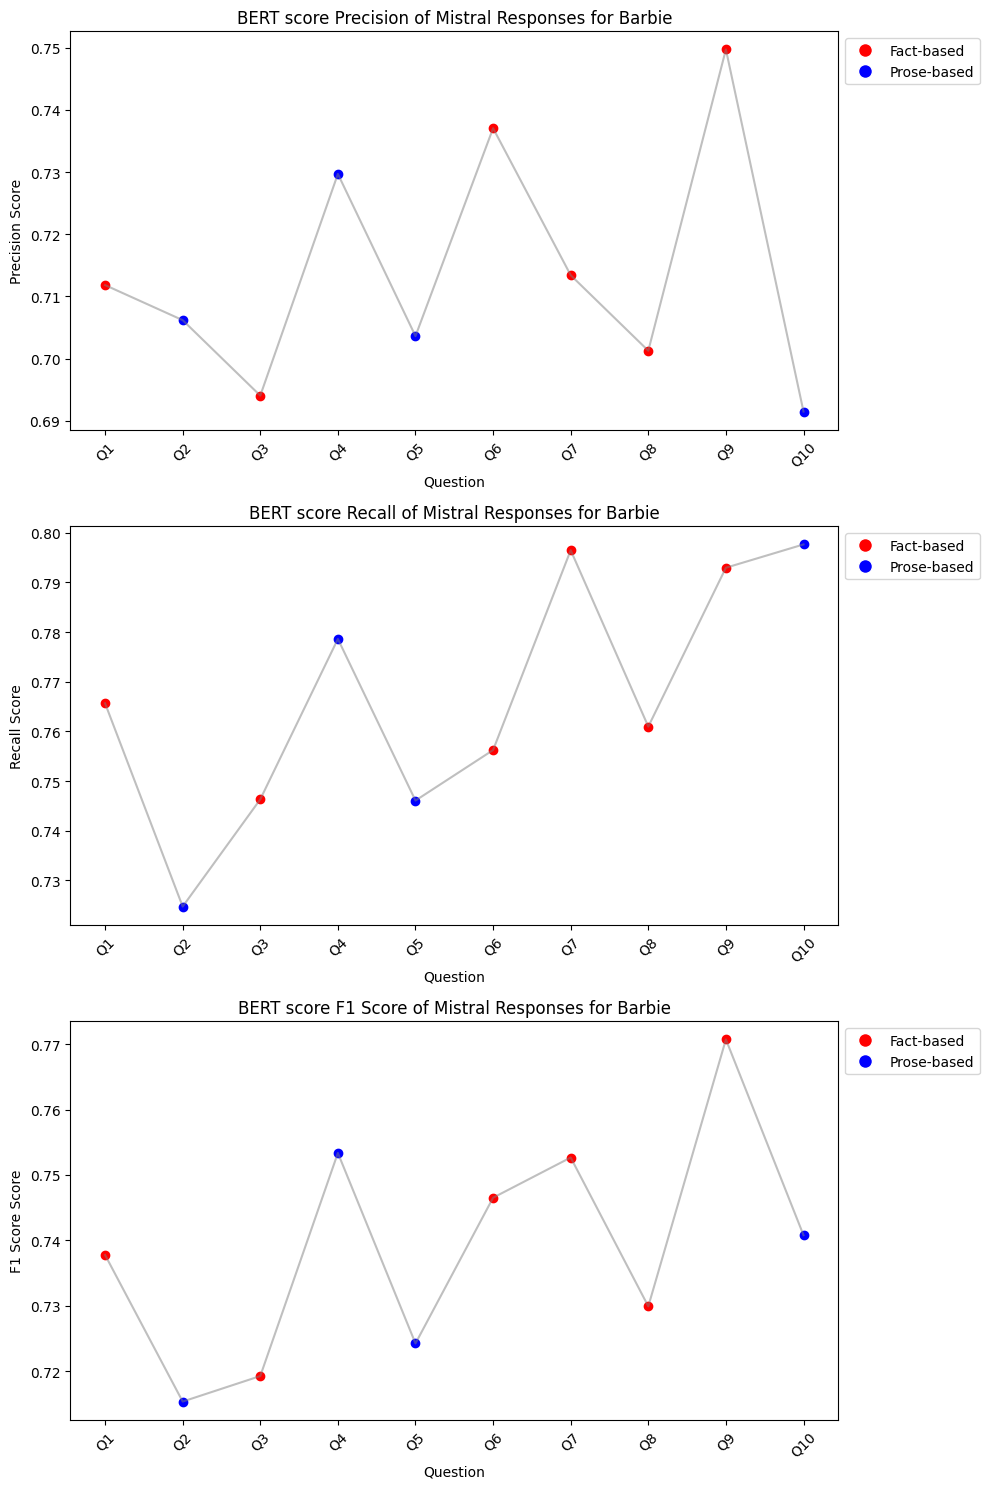

In [116]:
import matplotlib.pyplot as plt

# Assuming BERT_Mistral_Barbie DataFrame exists with the required data
# Assuming Question_kind_Barbie DataFrame or a similar structure for question kinds

# Generate question numbers based on the length of the DataFrame
question_numbers = [f'Q{i+1}' for i in range(len(BERT_Mistral_Barbie))]

# Assuming colors are determined based on Question Kind from a DataFrame like Question_kind_Barbie
colors = ['red' if kind == 'Fact' else 'blue' for kind in Question_kind_Barbie['Question_Kind']]

# Plotting Precision, Recall, and F1 Scores for Mistral Model Responses
fig, ax = plt.subplots(3, 1, figsize=(10, 15))

# Custom legend items
score_legend_items = [plt.Line2D([0], [0], color='grey', lw=2, linestyle='-', label='Precision'),
                      plt.Line2D([0], [0], color='grey', lw=2, linestyle='--', label='Recall'),
                      plt.Line2D([0], [0], color='grey', lw=2, linestyle='-.', label='F1 Score')]
question_kind_legend_items = [plt.Line2D([0], [0], marker='o', color='w', label='Fact-based',
                          markerfacecolor='red', markersize=10),
                          plt.Line2D([0], [0], marker='o', color='w', label='Prose-based',
                          markerfacecolor='blue', markersize=10)]

# Plotting each metric with its corresponding color for each question
metrics = ['Precision', 'Recall', 'F1 Score']
for ax_idx, metric in enumerate(metrics):
    for i, color in enumerate(colors):
        ax[ax_idx].scatter(question_numbers[i], BERT_Mistral_Barbie[metric].iloc[i], color=color, marker='o')
    ax[ax_idx].plot(question_numbers, BERT_Mistral_Barbie[metric], linestyle='-', color='grey', alpha=0.5)  # Connecting points
    ax[ax_idx].set_title(f'BERT score {metric} of Mistral Responses for Barbie')
    ax[ax_idx].set_xlabel('Question')
    ax[ax_idx].set_ylabel(f'{metric} Score')
    ax[ax_idx].tick_params(axis='x', rotation=45)

# Adding custom legends to the plot
for ax_single in ax:
    question_kind_legend = ax_single.legend(handles=question_kind_legend_items, loc='lower left')
    ax_single.legend(handles=question_kind_legend_items, loc='upper left', bbox_to_anchor=(1,1))

plt.tight_layout()
plt.show()


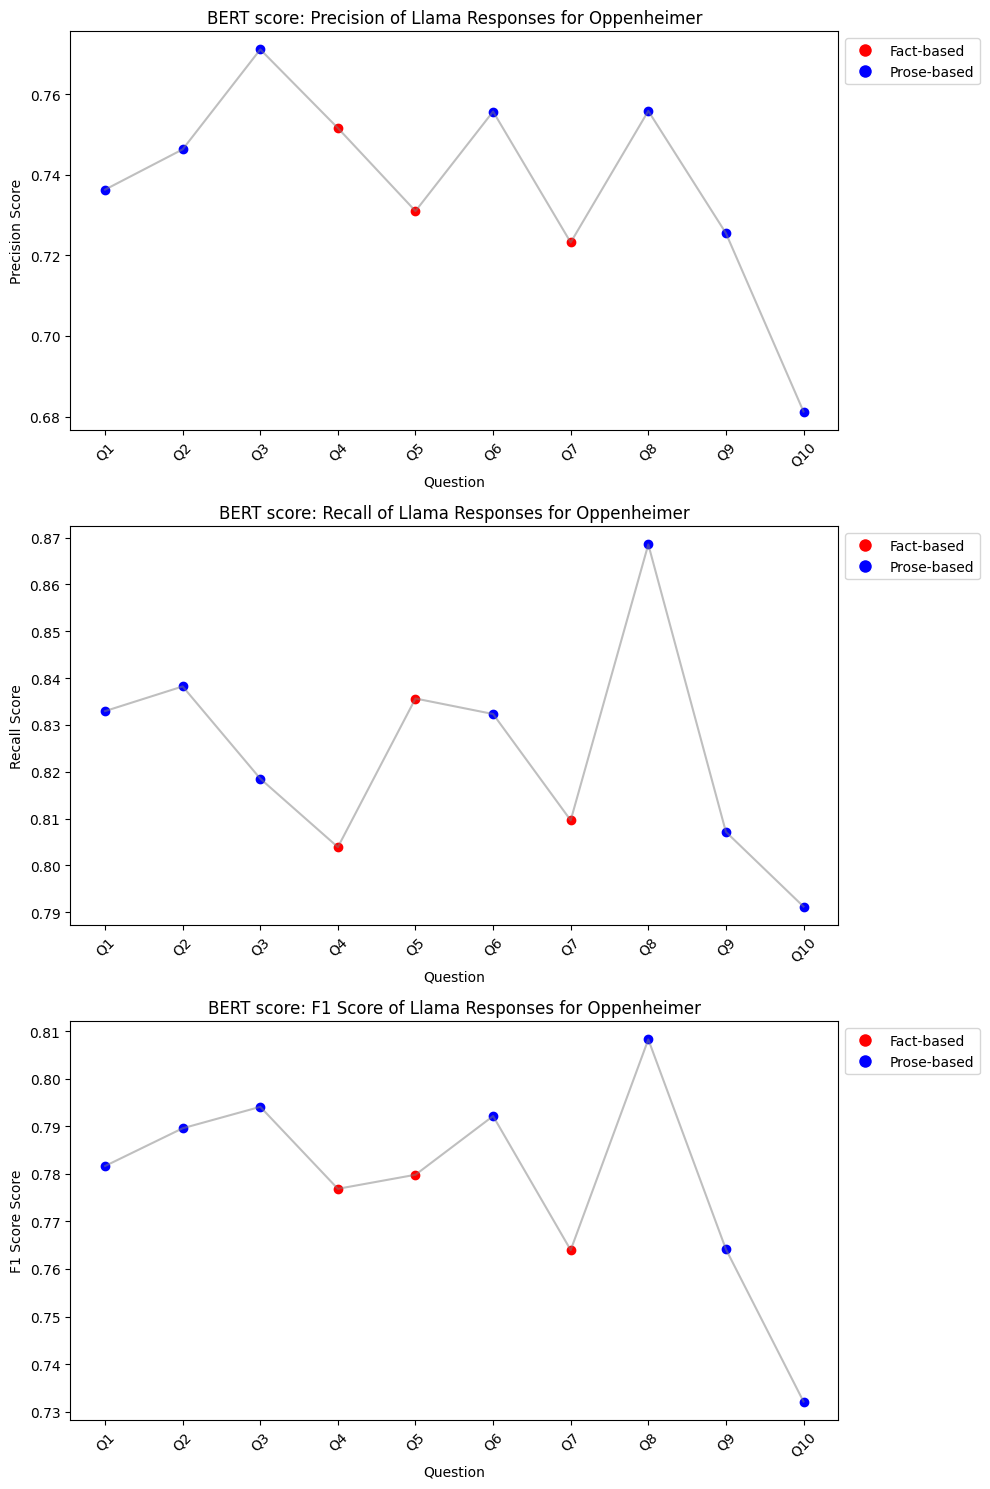

In [118]:
import matplotlib.pyplot as plt

# Assuming BERT_Llama_Oppenheimer DataFrame exists with the required data
# Assuming Question_kind_Oppenheimer DataFrame or a similar structure for question kinds

# Generate question numbers based on the length of the DataFrame
question_numbers = [f'Q{i+1}' for i in range(len(BERT_Llama_Oppenheimer))]

# Assuming colors are determined based on Question Kind from a DataFrame like Question_kind_Oppenheimer
colors = ['red' if kind == 'Fact' else 'blue' for kind in Question_kind_Oppenheimer['Question_Kind']]

# Plotting Precision, Recall, and F1 Scores for Llama Model Responses
fig, ax = plt.subplots(3, 1, figsize=(10, 15))

# Custom legend items
score_legend_items = [plt.Line2D([0], [0], color='grey', lw=2, linestyle='-', label='Precision'),
                      plt.Line2D([0], [0], color='grey', lw=2, linestyle='--', label='Recall'),
                      plt.Line2D([0], [0], color='grey', lw=2, linestyle='-.', label='F1 Score')]
question_kind_legend_items = [plt.Line2D([0], [0], marker='o', color='w', label='Fact-based',
                          markerfacecolor='red', markersize=10),
                          plt.Line2D([0], [0], marker='o', color='w', label='Prose-based',
                          markerfacecolor='blue', markersize=10)]

# Plotting each metric with its corresponding color for each question
metrics = ['Precision', 'Recall', 'F1 Score']
for ax_idx, metric in enumerate(metrics):
    for i, color in enumerate(colors):
        ax[ax_idx].scatter(question_numbers[i], BERT_Llama_Oppenheimer[metric].iloc[i], color=color, marker='o')
    ax[ax_idx].plot(question_numbers, BERT_Llama_Oppenheimer[metric], linestyle='-', color='grey', alpha=0.5)  # Connecting points
    ax[ax_idx].set_title(f'BERT score: {metric} of Llama Responses for Oppenheimer')
    ax[ax_idx].set_xlabel('Question')
    ax[ax_idx].set_ylabel(f'{metric} Score')
    ax[ax_idx].tick_params(axis='x', rotation=45)

# Adding custom legends to the plot
for ax_single in ax:
    question_kind_legend = ax_single.legend(handles=question_kind_legend_items, loc='lower left')
    ax_single.legend(handles=question_kind_legend_items, loc='upper left', bbox_to_anchor=(1,1))

plt.tight_layout()
plt.show()


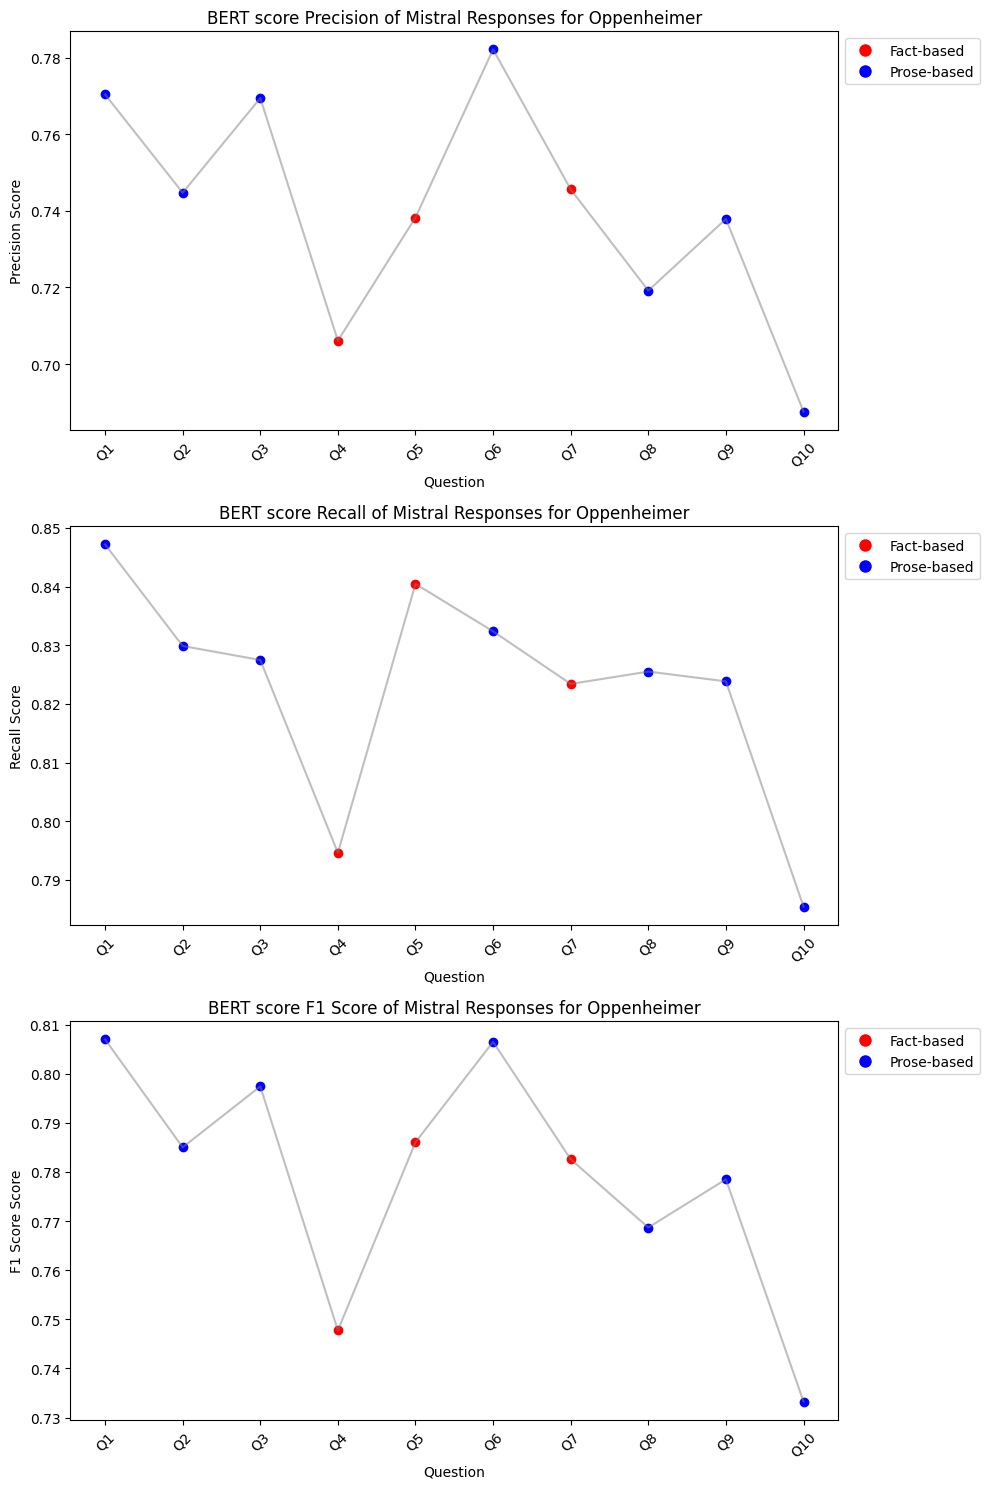

In [119]:
import matplotlib.pyplot as plt

# Assuming BERT_Mistral_Oppenheimer DataFrame exists with the required data
# Assuming Question_kind_Oppenheimer DataFrame or a similar structure for question kinds

# Generate question numbers based on the length of the DataFrame
question_numbers = [f'Q{i+1}' for i in range(len(BERT_Mistral_Oppenheimer))]

# Assuming colors are determined based on Question Kind from a DataFrame like Question_kind_Oppenheimer
colors = ['red' if kind == 'Fact' else 'blue' for kind in Question_kind_Oppenheimer['Question_Kind']]

# Plotting Precision, Recall, and F1 Scores for Mistral Model Responses
fig, ax = plt.subplots(3, 1, figsize=(10, 15))

# Custom legend items
score_legend_items = [plt.Line2D([0], [0], color='grey', lw=2, linestyle='-', label='Precision'),
                      plt.Line2D([0], [0], color='grey', lw=2, linestyle='--', label='Recall'),
                      plt.Line2D([0], [0], color='grey', lw=2, linestyle='-.', label='F1 Score')]
question_kind_legend_items = [plt.Line2D([0], [0], marker='o', color='w', label='Fact-based',
                          markerfacecolor='red', markersize=10),
                          plt.Line2D([0], [0], marker='o', color='w', label='Prose-based',
                          markerfacecolor='blue', markersize=10)]

# Plotting each metric with its corresponding color for each question
metrics = ['Precision', 'Recall', 'F1 Score']
for ax_idx, metric in enumerate(metrics):
    for i, color in enumerate(colors):
        ax[ax_idx].scatter(question_numbers[i], BERT_Mistral_Oppenheimer[metric].iloc[i], color=color, marker='o')
    ax[ax_idx].plot(question_numbers, BERT_Mistral_Oppenheimer[metric], linestyle='-', color='grey', alpha=0.5)  # Connecting points
    ax[ax_idx].set_title(f'BERT score {metric} of Mistral Responses for Oppenheimer')
    ax[ax_idx].set_xlabel('Question')
    ax[ax_idx].set_ylabel(f'{metric} Score')
    ax[ax_idx].tick_params(axis='x', rotation=45)

# Adding custom legends to the plot
for ax_single in ax:
    question_kind_legend = ax_single.legend(handles=question_kind_legend_items, loc='lower left')
    ax_single.legend(handles=question_kind_legend_items, loc='upper left', bbox_to_anchor=(1,1))

plt.tight_layout()
plt.show()


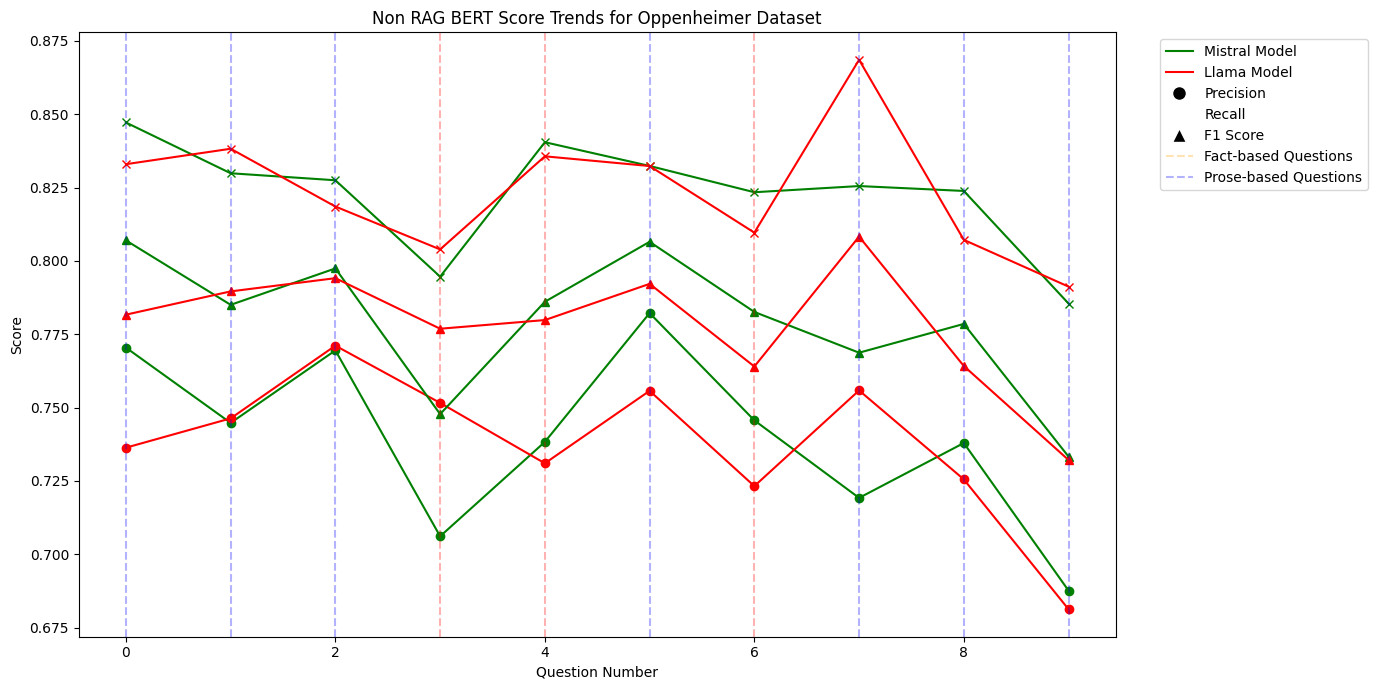

In [189]:
import matplotlib.pyplot as plt

# Assuming 'Question_kind_Oppenheimer' and 'BERT_Llama_Oppenheimer' are defined

# Resetting to default in case previously set for black background
plt.rcParams.update(plt.rcParamsDefault)

# Setting up the figure
plt.figure(figsize=(14, 7))

# Defining markers and colors for readability
metrics = ['Precision', 'Recall', 'F1 Score']
markers = ['o', 'x', '^']
colors = {'Llama': 'red', 'Mistral': 'green'}

# Plotting for each metric
for i, metric in enumerate(metrics):
    # Mistral Model
    plt.plot(BERT_Mistral_Oppenheimer[metric], label=f'Mistral {metric}', color=colors['Mistral'], marker=markers[i], linestyle='-')
    
    # Llama Model
    plt.plot(BERT_Llama_Oppenheimer[metric], label=f'Llama {metric}', color=colors['Llama'], marker=markers[i], linestyle='-')

# Demarcating question types
for i, kind in enumerate(Question_kind_Oppenheimer['Question_Kind']):
    color = 'red' if kind == 'Fact' else 'blue'
    plt.axvline(x=i, linestyle='--', color=color, alpha=0.3)

plt.title('Non RAG BERT Score Trends for Oppenheimer Dataset')
plt.xlabel('Question Number')
plt.ylabel('Score')

# Creating custom legend for question kinds and models
question_kind_legend_items = [
    plt.Line2D([0], [0], color=colors['Mistral'], label='Mistral Model'),
    plt.Line2D([0], [0], color=colors['Llama'], label='Llama Model'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='black', label='Precision', markersize=10),
    plt.Line2D([0], [0], marker='x', color='w', markerfacecolor='black', label='Recall', markersize=10),
    plt.Line2D([0], [0], marker='^', color='w', markerfacecolor='black', label='F1 Score', markersize=10),
    plt.Line2D([0], [0], linestyle='--', color='orange', label='Fact-based Questions', alpha=0.3),
    plt.Line2D([0], [0], linestyle='--', color='blue', label='Prose-based Questions', alpha=0.3)
]

# Adding legends for models and metrics
plt.legend(handles=question_kind_legend_items, loc='upper right', bbox_to_anchor=(1.25, 1))

plt.tight_layout()
plt.show()


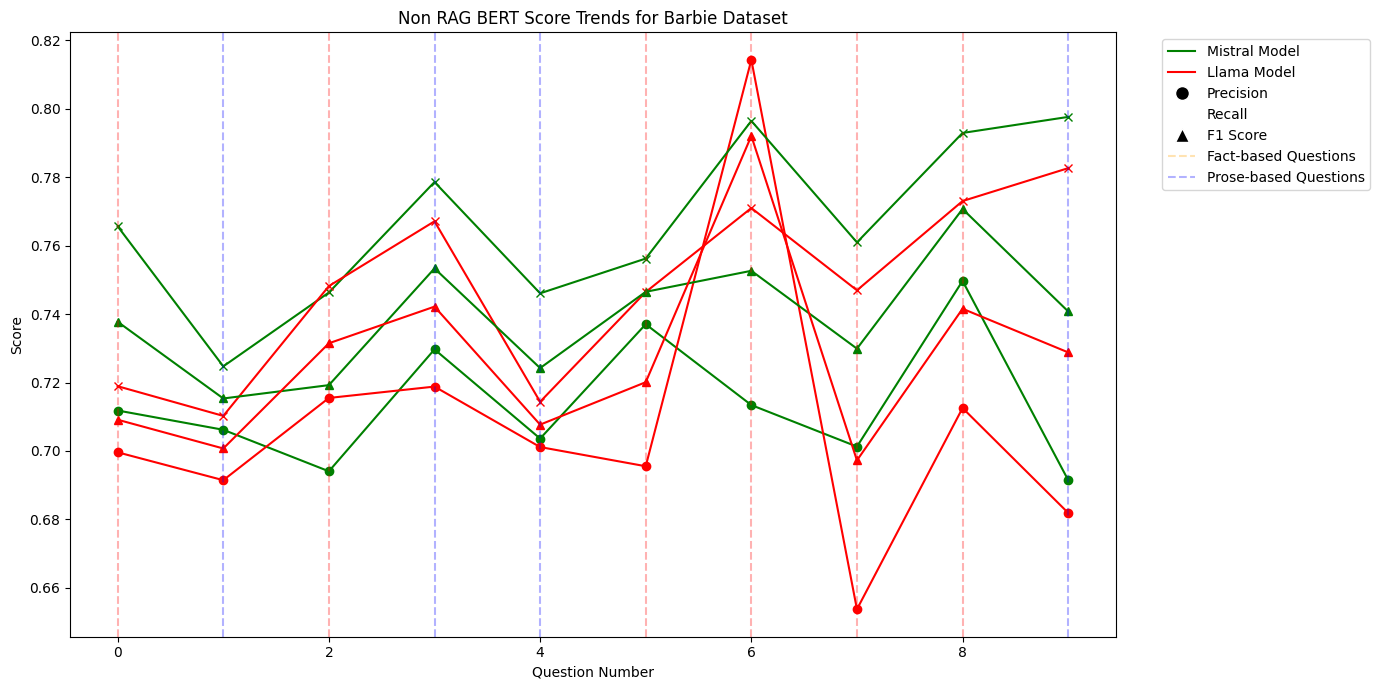

In [188]:
import matplotlib.pyplot as plt

# Assuming 'Question_kind_Barbie' and 'BERT_Llama_Barbie' are defined

# Resetting to default in case previously set for black background
plt.rcParams.update(plt.rcParamsDefault)

# Setting up the figure
plt.figure(figsize=(14, 7))

# Defining markers and colors for readability
metrics = ['Precision', 'Recall', 'F1 Score']
markers = ['o', 'x', '^']
colors = {'Llama': 'red', 'Mistral': 'Green'}

# Plotting for each metric
for i, metric in enumerate(metrics):
    # Mistral Model
    plt.plot(BERT_Mistral_Barbie[metric], label=f'Mistral {metric}', color=colors['Mistral'], marker=markers[i], linestyle='-')
    
    # Llama Model
    plt.plot(BERT_Llama_Barbie[metric], label=f'Llama {metric}', color=colors['Llama'], marker=markers[i], linestyle='-')

# Demarcating question types
for i, kind in enumerate(Question_kind_Barbie['Question_Kind']):
    color = 'red' if kind == 'Fact' else 'blue'
    plt.axvline(x=i, linestyle='--', color=color, alpha=0.3)

plt.title('Non RAG BERT Score Trends for Barbie Dataset')
plt.xlabel('Question Number')
plt.ylabel('Score')

# Creating custom legend for question kinds and models
question_kind_legend_items = [
    plt.Line2D([0], [0], color=colors['Mistral'], label='Mistral Model'),
    plt.Line2D([0], [0], color=colors['Llama'], label='Llama Model'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='black', label='Precision', markersize=10),
    plt.Line2D([0], [0], marker='x', color='w', markerfacecolor='black', label='Recall', markersize=10),
    plt.Line2D([0], [0], marker='^', color='w', markerfacecolor='black', label='F1 Score', markersize=10),
    plt.Line2D([0], [0], linestyle='--', color='orange', label='Fact-based Questions', alpha=0.3),
    plt.Line2D([0], [0], linestyle='--', color='blue', label='Prose-based Questions', alpha=0.3)
]

# Adding legends for models and metrics
plt.legend(handles=question_kind_legend_items, loc='upper right', bbox_to_anchor=(1.25, 1))

plt.tight_layout()
plt.show()


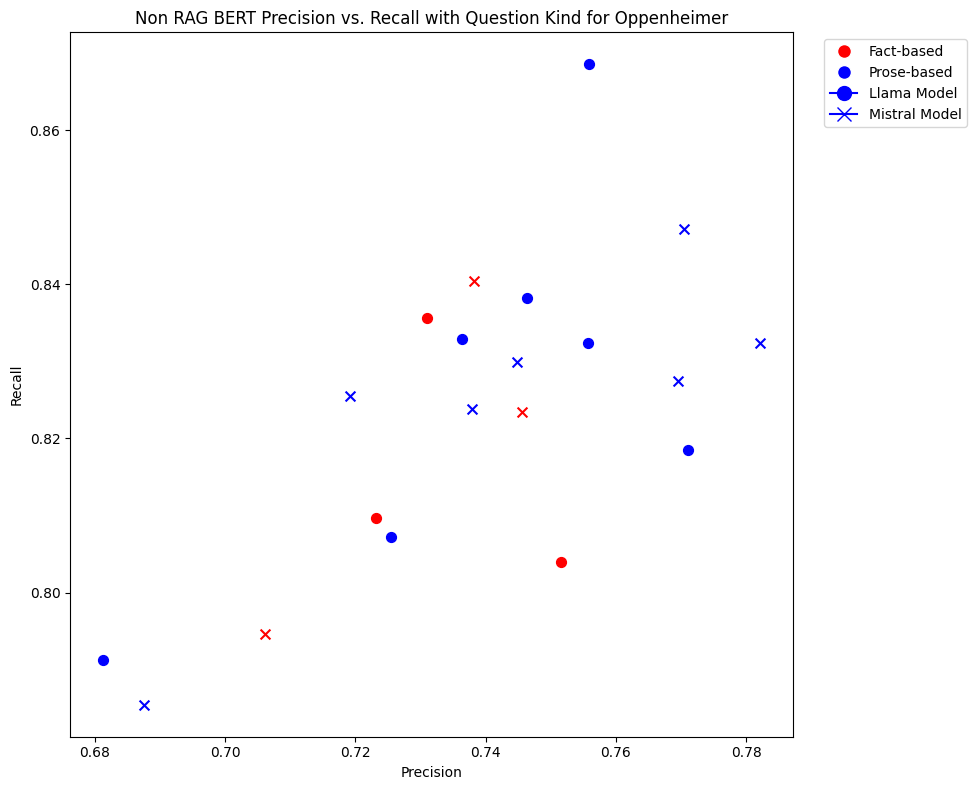

In [192]:
import matplotlib.pyplot as plt

# Assuming 'Question_kind_Oppenheimer' contains the kind of each question
colors = ['red' if kind == 'Fact' else 'blue' for kind in Question_kind_Oppenheimer['Question_Kind']]

# Recreating custom legend for question kinds and models
question_kind_legend_items = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', label='Fact-based', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', label='Prose-based', markersize=10),
    plt.Line2D([0], [0], marker='o', color='b', markerfacecolor='blue', label='Llama Model', markersize=10),
    plt.Line2D([0], [0], marker='x', color='b', markerfacecolor='cyan', label='Mistral Model', markersize=10)
]

# Example for Precision vs. Recall with Question Kind, including Llama and Mistral
plt.figure(figsize=(10, 8))
# Llama Model
for i, (prec, rec) in enumerate(zip(BERT_Llama_Oppenheimer['Precision'], BERT_Llama_Oppenheimer['Recall'])):
    plt.scatter(prec, rec, color=colors[i], marker='o', s=50)  # Using 'o' marker for Llama
# Mistral Model
for i, (prec, rec) in enumerate(zip(BERT_Mistral_Oppenheimer['Precision'], BERT_Mistral_Oppenheimer['Recall'])):
    plt.scatter(prec, rec, color=colors[i], marker='x', s=50)  # Using 'x' marker for Mistral

plt.title('Non RAG BERT Precision vs. Recall with Question Kind for Oppenheimer')
plt.xlabel('Precision')
plt.ylabel('Recall')

# Adding legends for question kinds outside the plot, including model distinction
plt.legend(handles=question_kind_legend_items, loc='upper right', bbox_to_anchor=(1.25, 1))

plt.tight_layout()
plt.show()


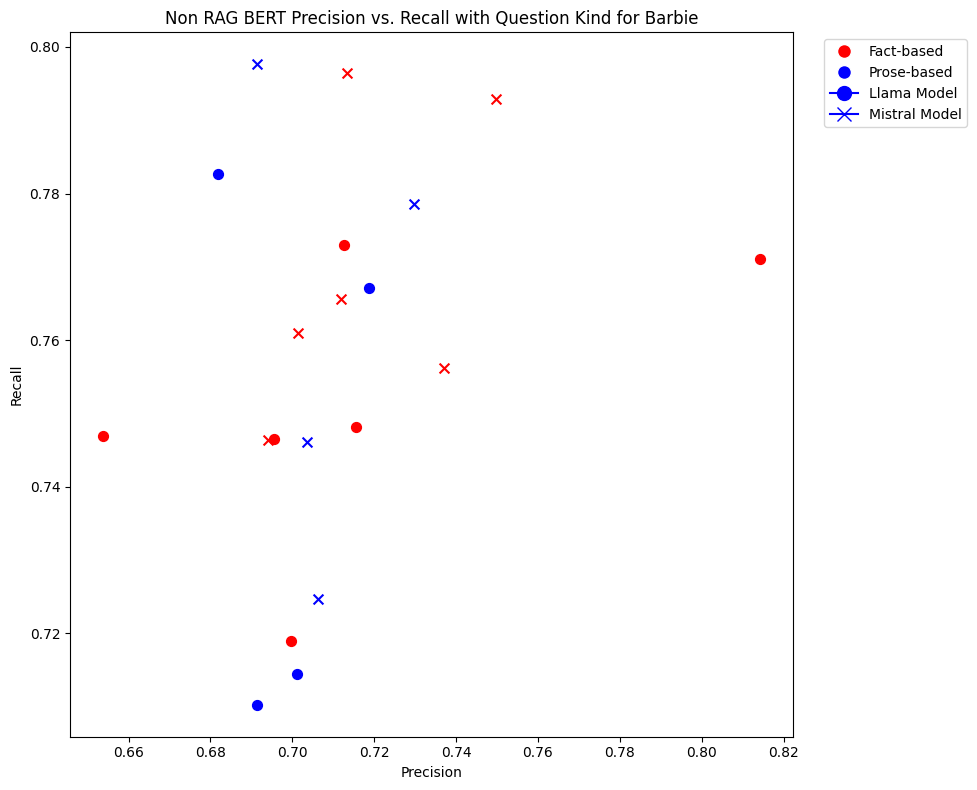

In [193]:
import matplotlib.pyplot as plt

# Assuming 'Question_kind_Barbie' contains the kind of each question
colors = ['red' if kind == 'Fact' else 'blue' for kind in Question_kind_Barbie['Question_Kind']]

# Recreating custom legend for question kinds and models
question_kind_legend_items = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', label='Fact-based', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', label='Prose-based', markersize=10),
    plt.Line2D([0], [0], marker='o', color='b', markerfacecolor='blue', label='Llama Model', markersize=10),
    plt.Line2D([0], [0], marker='x', color='b', markerfacecolor='cyan', label='Mistral Model', markersize=10)
]

# Example for Precision vs. Recall with Question Kind, including Llama and Mistral
plt.figure(figsize=(10, 8))
# Llama Model
for i, (prec, rec) in enumerate(zip(BERT_Llama_Barbie['Precision'], BERT_Llama_Barbie['Recall'])):
    plt.scatter(prec, rec, color=colors[i], marker='o', s=50)  # Using 'o' marker for Llama
# Mistral Model
for i, (prec, rec) in enumerate(zip(BERT_Mistral_Barbie['Precision'], BERT_Mistral_Barbie['Recall'])):
    plt.scatter(prec, rec, color=colors[i], marker='x', s=50)  # Using 'x' marker for Mistral

plt.title('Non RAG BERT Precision vs. Recall with Question Kind for Barbie')
plt.xlabel('Precision')
plt.ylabel('Recall')

# Adding legends for question kinds outside the plot, including model distinction
plt.legend(handles=question_kind_legend_items, loc='upper right', bbox_to_anchor=(1.25, 1))

plt.tight_layout()
plt.show()


* RAG BERT Scores

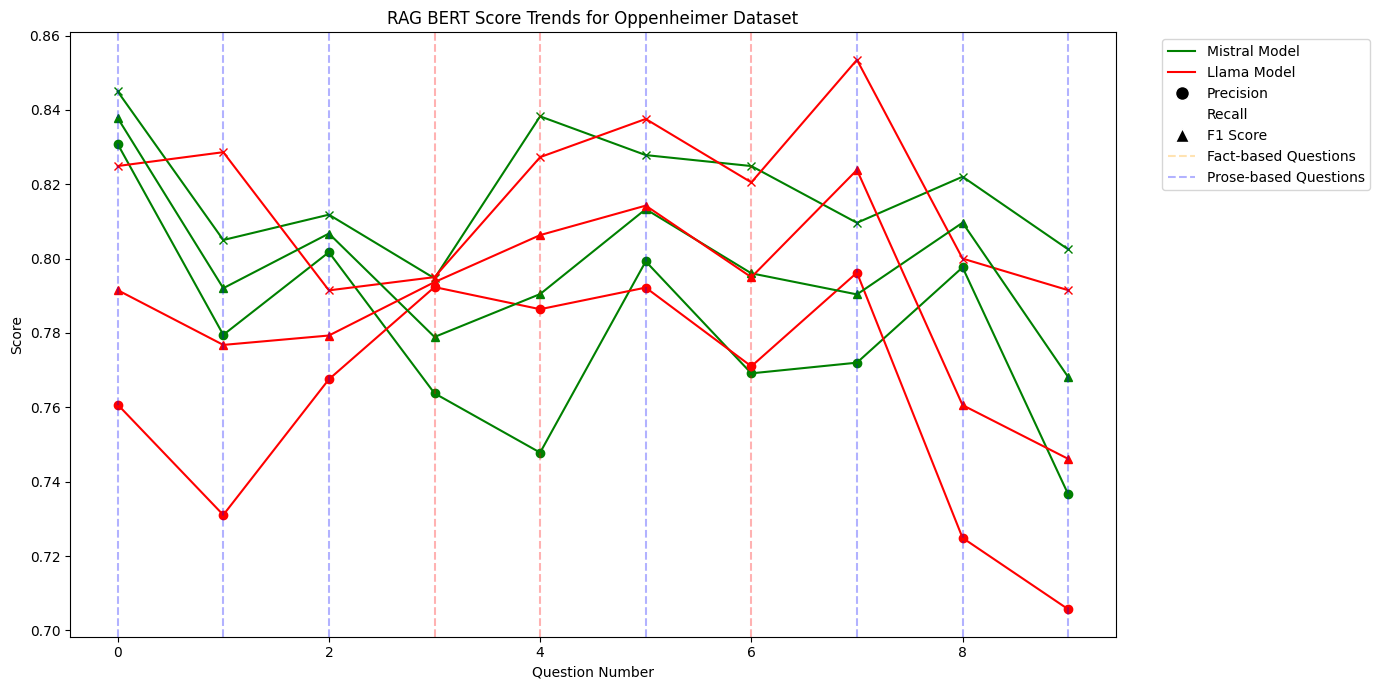

In [200]:
import matplotlib.pyplot as plt

# Assuming 'Question_kind_Oppenheimer' and 'RAG_BERT_Llama_Oppenheimer' are defined

# Resetting to default in case previously set for black background
plt.rcParams.update(plt.rcParamsDefault)

# Setting up the figure
plt.figure(figsize=(14, 7))

# Defining markers and colors for readability
metrics = ['Precision', 'Recall', 'F1 Score']
markers = ['o', 'x', '^']
colors = {'Llama': 'red', 'Mistral': 'green'}

# Plotting for each metric
for i, metric in enumerate(metrics):
    # Mistral Model
    plt.plot(RAG_BERT_Mistral_Oppenheimer[metric], label=f'Mistral {metric}', color=colors['Mistral'], marker=markers[i], linestyle='-')
    
    # Llama Model
    plt.plot(RAG_BERT_Llama2_Oppenheimer[metric], label=f'Llama {metric}', color=colors['Llama'], marker=markers[i], linestyle='-')

# Demarcating question types
for i, kind in enumerate(Question_kind_Oppenheimer['Question_Kind']):
    color = 'red' if kind == 'Fact' else 'blue'
    plt.axvline(x=i, linestyle='--', color=color, alpha=0.3)

plt.title('RAG BERT Score Trends for Oppenheimer Dataset')
plt.xlabel('Question Number')
plt.ylabel('Score')

# Creating custom legend for question kinds and models
question_kind_legend_items = [
    plt.Line2D([0], [0], color=colors['Mistral'], label='Mistral Model'),
    plt.Line2D([0], [0], color=colors['Llama'], label='Llama Model'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='black', label='Precision', markersize=10),
    plt.Line2D([0], [0], marker='x', color='w', markerfacecolor='black', label='Recall', markersize=10),
    plt.Line2D([0], [0], marker='^', color='w', markerfacecolor='black', label='F1 Score', markersize=10),
    plt.Line2D([0], [0], linestyle='--', color='orange', label='Fact-based Questions', alpha=0.3),
    plt.Line2D([0], [0], linestyle='--', color='blue', label='Prose-based Questions', alpha=0.3)
]

# Adding legends for models and metrics
plt.legend(handles=question_kind_legend_items, loc='upper right', bbox_to_anchor=(1.25, 1))

plt.tight_layout()
plt.show()


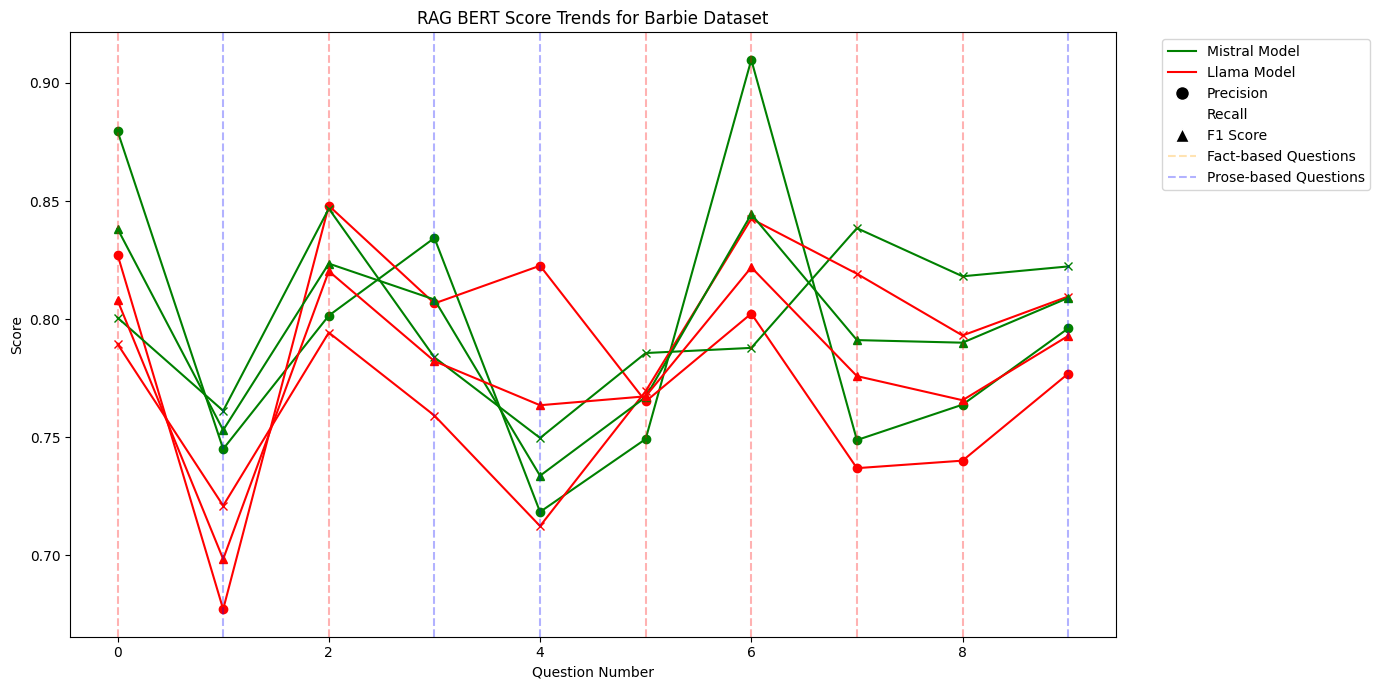

In [201]:
import matplotlib.pyplot as plt

# Assuming 'Question_kind_Barbie' and 'RAG_BERT_Llama_Oppenheimer' are defined

# Resetting to default in case previously set for black background
plt.rcParams.update(plt.rcParamsDefault)

# Setting up the figure
plt.figure(figsize=(14, 7))

# Defining markers and colors for readability
metrics = ['Precision', 'Recall', 'F1 Score']
markers = ['o', 'x', '^']
colors = {'Llama': 'red', 'Mistral': 'green'}

# Plotting for each metric
for i, metric in enumerate(metrics):
    # Mistral Model
    plt.plot(RAG_BERT_Mistral_Barbie[metric], label=f'Mistral {metric}', color=colors['Mistral'], marker=markers[i], linestyle='-')
    
    # Llama Model
    plt.plot(RAG_BERT_Llama2_Barbie[metric], label=f'Llama {metric}', color=colors['Llama'], marker=markers[i], linestyle='-')

# Demarcating question types
for i, kind in enumerate(Question_kind_Barbie['Question_Kind']):
    color = 'red' if kind == 'Fact' else 'blue'
    plt.axvline(x=i, linestyle='--', color=color, alpha=0.3)

plt.title('RAG BERT Score Trends for Barbie Dataset')
plt.xlabel('Question Number')
plt.ylabel('Score')

# Creating custom legend for question kinds and models
question_kind_legend_items = [
    plt.Line2D([0], [0], color=colors['Mistral'], label='Mistral Model'),
    plt.Line2D([0], [0], color=colors['Llama'], label='Llama Model'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='black', label='Precision', markersize=10),
    plt.Line2D([0], [0], marker='x', color='w', markerfacecolor='black', label='Recall', markersize=10),
    plt.Line2D([0], [0], marker='^', color='w', markerfacecolor='black', label='F1 Score', markersize=10),
    plt.Line2D([0], [0], linestyle='--', color='orange', label='Fact-based Questions', alpha=0.3),
    plt.Line2D([0], [0], linestyle='--', color='blue', label='Prose-based Questions', alpha=0.3)
]

# Adding legends for models and metrics
plt.legend(handles=question_kind_legend_items, loc='upper right', bbox_to_anchor=(1.25, 1))

plt.tight_layout()
plt.show()


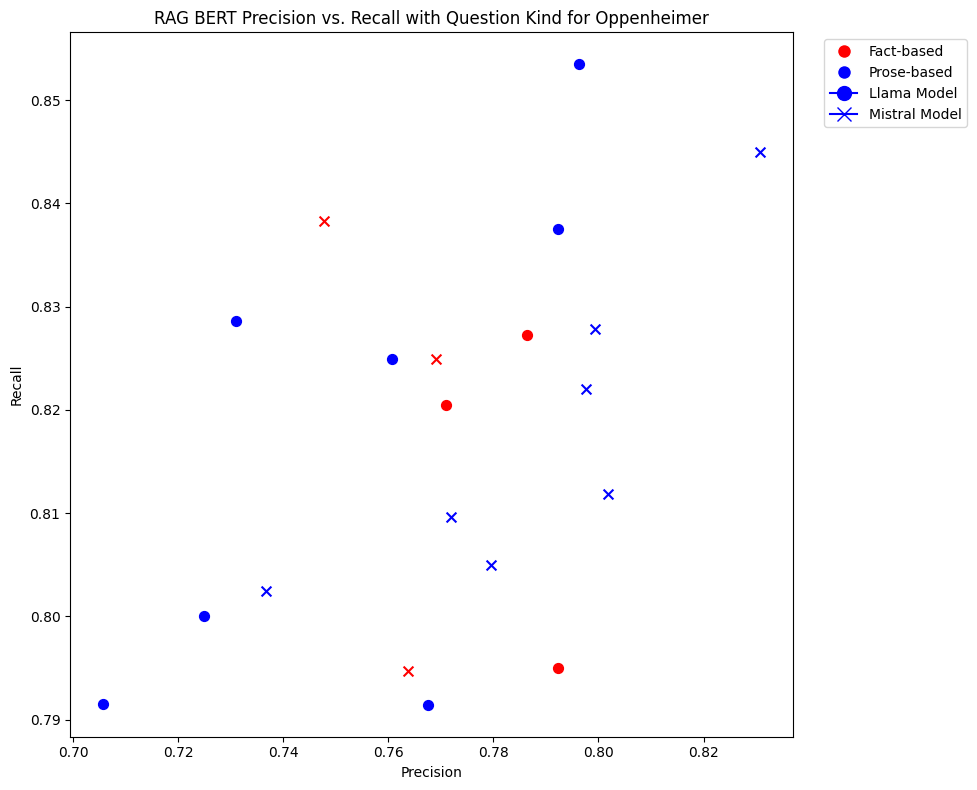

In [202]:
import matplotlib.pyplot as plt

# Assuming 'Question_kind_Oppenheimer' contains the kind of each question
colors = ['red' if kind == 'Fact' else 'blue' for kind in Question_kind_Oppenheimer['Question_Kind']]

# Recreating custom legend for question kinds and models
question_kind_legend_items = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', label='Fact-based', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', label='Prose-based', markersize=10),
    plt.Line2D([0], [0], marker='o', color='b', markerfacecolor='blue', label='Llama Model', markersize=10),
    plt.Line2D([0], [0], marker='x', color='b', markerfacecolor='cyan', label='Mistral Model', markersize=10)
]

# Example for Precision vs. Recall with Question Kind, including Llama and Mistral
plt.figure(figsize=(10, 8))
# Llama Model
for i, (prec, rec) in enumerate(zip(RAG_BERT_Llama2_Oppenheimer['Precision'], RAG_BERT_Llama2_Oppenheimer['Recall'])):
    plt.scatter(prec, rec, color=colors[i], marker='o', s=50)  # Using 'o' marker for Llama
# Mistral Model
for i, (prec, rec) in enumerate(zip(RAG_BERT_Mistral_Oppenheimer['Precision'], RAG_BERT_Mistral_Oppenheimer['Recall'])):
    plt.scatter(prec, rec, color=colors[i], marker='x', s=50)  # Using 'x' marker for Mistral

plt.title('RAG BERT Precision vs. Recall with Question Kind for Oppenheimer')
plt.xlabel('Precision')
plt.ylabel('Recall')

# Adding legends for question kinds outside the plot, including model distinction
plt.legend(handles=question_kind_legend_items, loc='upper right', bbox_to_anchor=(1.25, 1))

plt.tight_layout()
plt.show()


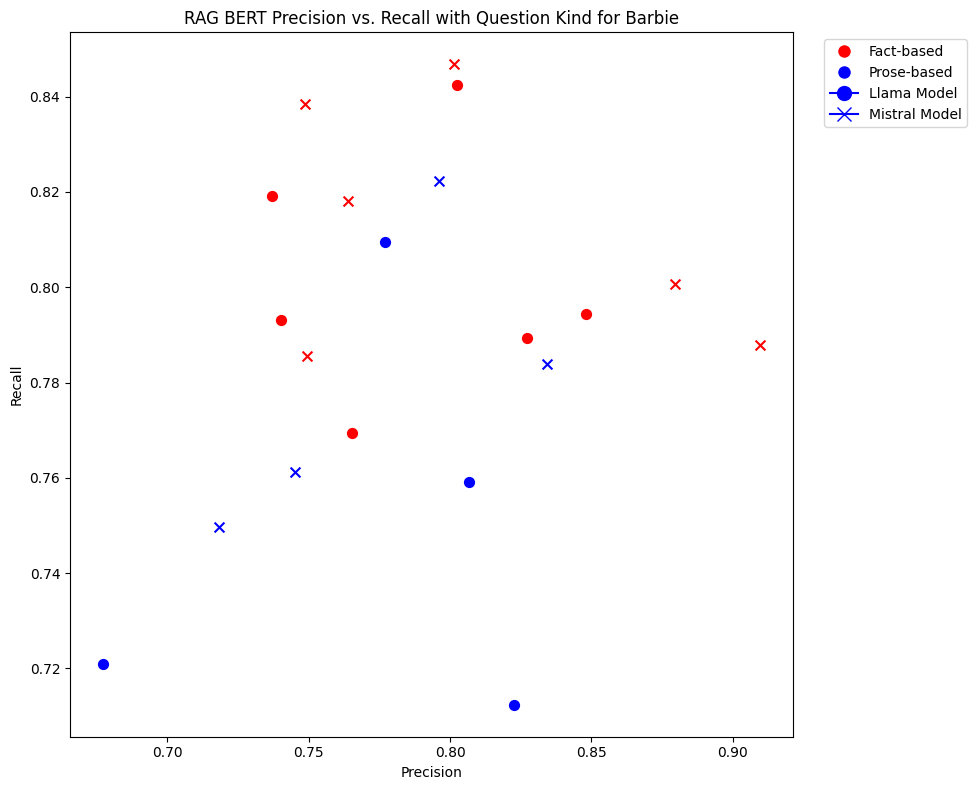

In [203]:
import matplotlib.pyplot as plt

# Assuming 'Question_kind_Barbie' contains the kind of each question
colors = ['red' if kind == 'Fact' else 'blue' for kind in Question_kind_Barbie['Question_Kind']]

# Recreating custom legend for question kinds and models
question_kind_legend_items = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', label='Fact-based', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', label='Prose-based', markersize=10),
    plt.Line2D([0], [0], marker='o', color='b', markerfacecolor='blue', label='Llama Model', markersize=10),
    plt.Line2D([0], [0], marker='x', color='b', markerfacecolor='cyan', label='Mistral Model', markersize=10)
]

# Example for Precision vs. Recall with Question Kind, including Llama and Mistral
plt.figure(figsize=(10, 8))
# Llama Model
for i, (prec, rec) in enumerate(zip(RAG_BERT_Llama2_Barbie['Precision'], RAG_BERT_Llama2_Barbie['Recall'])):
    plt.scatter(prec, rec, color=colors[i], marker='o', s=50)  # Using 'o' marker for Llama
# Mistral Model
for i, (prec, rec) in enumerate(zip(RAG_BERT_Mistral_Barbie['Precision'], RAG_BERT_Mistral_Barbie['Recall'])):
    plt.scatter(prec, rec, color=colors[i], marker='x', s=50)  # Using 'x' marker for Mistral

plt.title('RAG BERT Precision vs. Recall with Question Kind for Barbie')
plt.xlabel('Precision')
plt.ylabel('Recall')

# Adding legends for question kinds outside the plot, including model distinction
plt.legend(handles=question_kind_legend_items, loc='upper right', bbox_to_anchor=(1.25, 1))

plt.tight_layout()
plt.show()


Semantic Search 

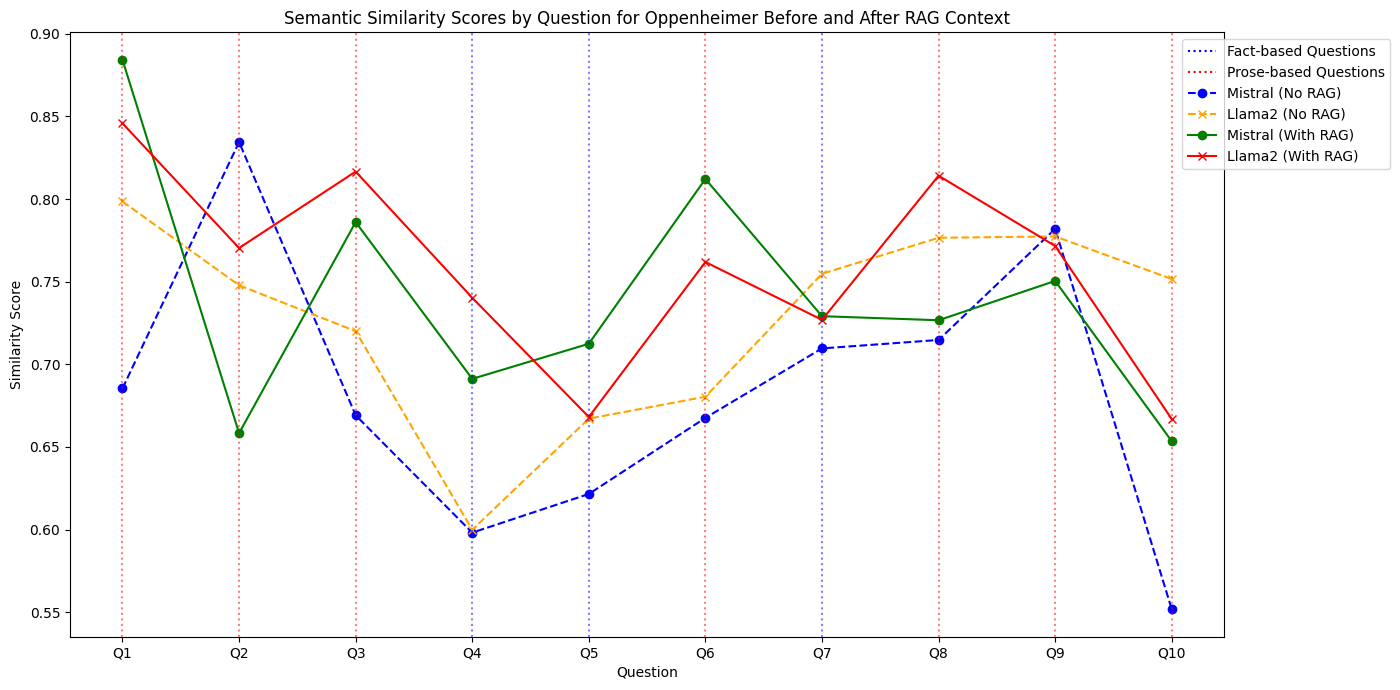

In [238]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


questions = ["Q1", "Q2", "Q3", "Q4", "Q5", "Q6", "Q7", "Q8", "Q9", "Q10"]

# Plotting similarity scores for each model across questions before and after RAG context
plt.figure(figsize=(14, 7))

# Plot similarity scores
plt.plot(questions, NO_RAG_Oppenheimer_mistral_scores, label='Mistral (No RAG)', marker='o', linestyle='--', color='blue')
plt.plot(questions, NO_RAG_Oppenheimer_llama2_scores, label='Llama2 (No RAG)', marker='x', linestyle='--', color='orange')
plt.plot(questions, RAG_Oppenheimer_mistral_scores, label='Mistral (With RAG)', marker='o', linestyle='-', color='green')
plt.plot(questions, RAG_Oppenheimer_llama2_scores, label='Llama2 (With RAG)', marker='x', linestyle='-', color='red')

# Creating custom legend for question kinds
fact_line = plt.Line2D([0], [0], linestyle=':', color='blue', label='Fact-based Questions')
prose_line = plt.Line2D([0], [0], linestyle=':', color='red', label='Prose-based Questions')
mistral_no_rag = plt.Line2D([0], [0], color='blue', marker='o', linestyle='--', label='Mistral (No RAG)')
llama2_no_rag = plt.Line2D([0], [0], color='orange', marker='x', linestyle='--', label='Llama2 (No RAG)')
mistral_with_rag = plt.Line2D([0], [0], color='green', marker='o', linestyle='-', label='Mistral (With RAG)')
llama2_with_rag = plt.Line2D([0], [0], color='red', marker='x', linestyle='-', label='Llama2 (With RAG)')

# Adding the question kind lines for Fact and Prose
for i, kind in enumerate(Question_kind_Oppenheimer['Question_Kind']):
    line_color = 'blue' if kind == 'Fact' else 'red'
    plt.axvline(x=i, linestyle=':', color=line_color, alpha=0.5)

plt.title('Semantic Similarity Scores by Question for Oppenheimer Before and After RAG Context')
plt.xlabel('Question')
plt.ylabel('Similarity Score')

# Adding combined legends for models and question kinds
plt.legend(handles=[fact_line, prose_line, mistral_no_rag, llama2_no_rag, mistral_with_rag, llama2_with_rag], 
           loc='upper right', bbox_to_anchor=(1.15, 1))

plt.tight_layout()
plt.show()




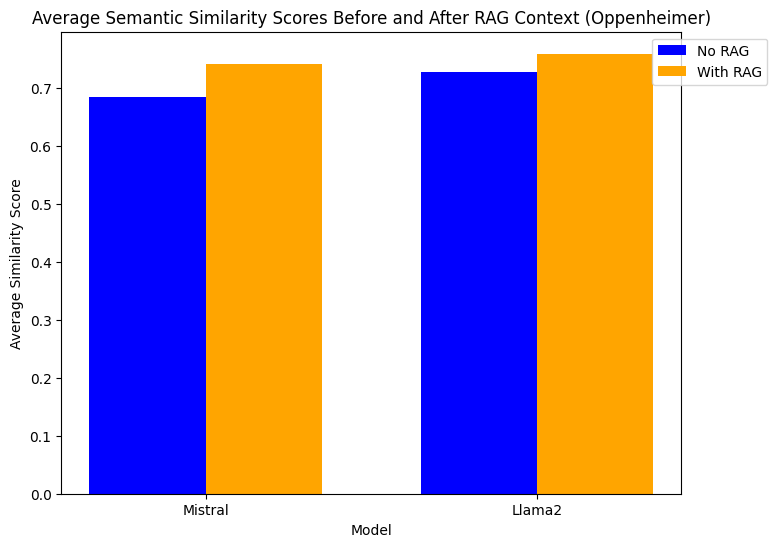

In [240]:
ind = np.arange(len(models))
width = 0.35  # the width of the bars

plt.figure(figsize=(8, 6))
plt.bar(ind, NO_RAG_Oppenheimer_average_scores, width, label='No RAG', color='blue')
plt.bar(ind + width, RAG_Oppenheimer_average_scores, width, label='With RAG', color='orange')

plt.title('Average Semantic Similarity Scores Before and After RAG Context (Oppenheimer)')
plt.xlabel('Model')
plt.ylabel('Average Similarity Score')
plt.xticks(ind + width / 2, models)
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.show()

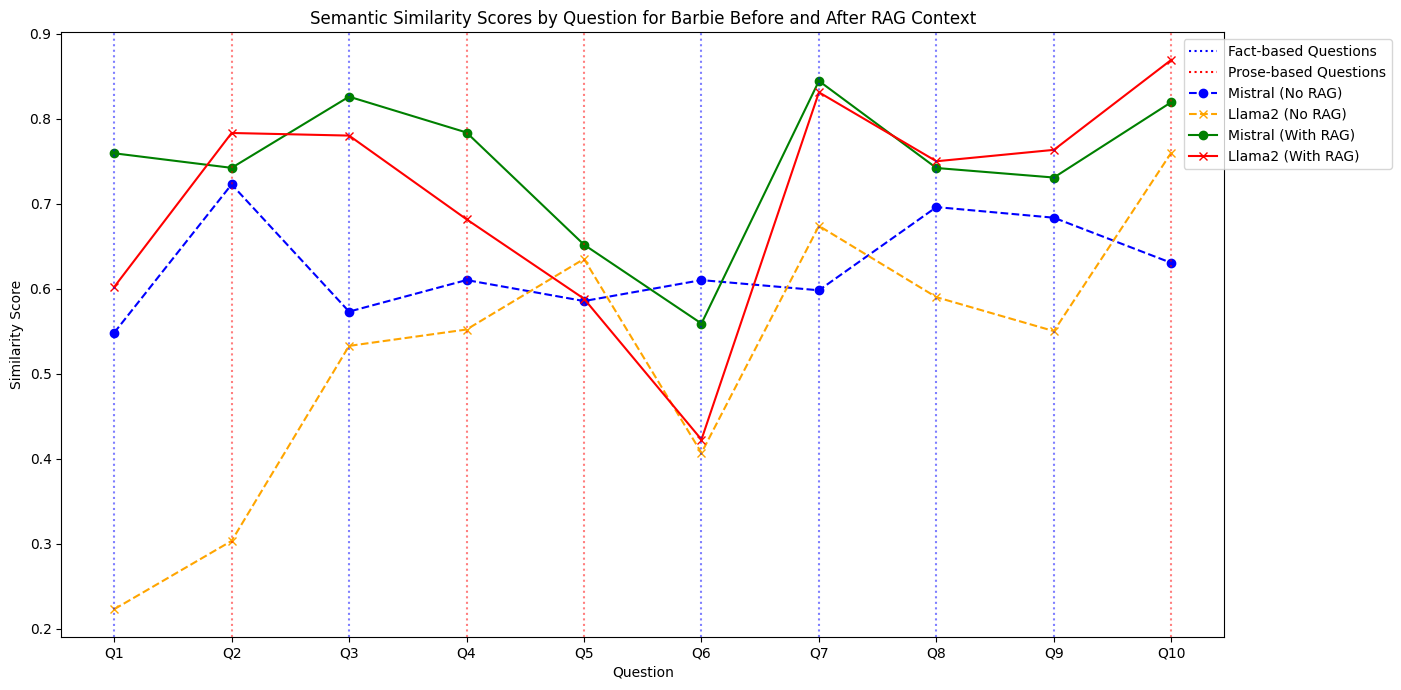

In [242]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


questions = ["Q1", "Q2", "Q3", "Q4", "Q5", "Q6", "Q7", "Q8", "Q9", "Q10"]

# Plotting similarity scores for each model across questions before and after RAG context
plt.figure(figsize=(14, 7))

# Plot similarity scores
plt.plot(questions, NO_RAG_Barbie_mistral_scores, label='Mistral (No RAG)', marker='o', linestyle='--', color='blue')
plt.plot(questions, NO_RAG_Barbie_llama2_scores, label='Llama2 (No RAG)', marker='x', linestyle='--', color='orange')
plt.plot(questions, RAG_Barbie_mistral_scores, label='Mistral (With RAG)', marker='o', linestyle='-', color='green')
plt.plot(questions, RAG_Barbie_llama2_scores, label='Llama2 (With RAG)', marker='x', linestyle='-', color='red')

# Creating custom legend for question kinds
fact_line = plt.Line2D([0], [0], linestyle=':', color='blue', label='Fact-based Questions')
prose_line = plt.Line2D([0], [0], linestyle=':', color='red', label='Prose-based Questions')
mistral_no_rag = plt.Line2D([0], [0], color='blue', marker='o', linestyle='--', label='Mistral (No RAG)')
llama2_no_rag = plt.Line2D([0], [0], color='orange', marker='x', linestyle='--', label='Llama2 (No RAG)')
mistral_with_rag = plt.Line2D([0], [0], color='green', marker='o', linestyle='-', label='Mistral (With RAG)')
llama2_with_rag = plt.Line2D([0], [0], color='red', marker='x', linestyle='-', label='Llama2 (With RAG)')

# Adding the question kind lines for Fact and Prose
for i, kind in enumerate(Question_kind_Barbie['Question_Kind']):
    line_color = 'blue' if kind == 'Fact' else 'red'
    plt.axvline(x=i, linestyle=':', color=line_color, alpha=0.5)

plt.title('Semantic Similarity Scores by Question for Barbie Before and After RAG Context')
plt.xlabel('Question')
plt.ylabel('Similarity Score')

# Adding combined legends for models and question kinds
plt.legend(handles=[fact_line, prose_line, mistral_no_rag, llama2_no_rag, mistral_with_rag, llama2_with_rag], 
           loc='upper right', bbox_to_anchor=(1.15, 1))

plt.tight_layout()
plt.show()




<Figure size 800x600 with 0 Axes>

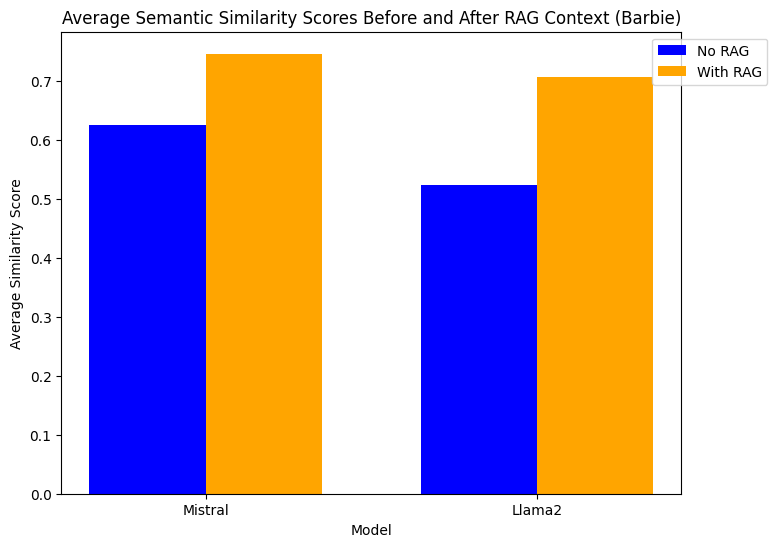

In [244]:
NO_RAG_Barbie_average_scores = [np.mean(NO_RAG_Barbie_mistral_scores), np.mean(NO_RAG_Barbie_llama2_scores)]
RAG_Barbie_average_scores = [np.mean(RAG_Barbie_mistral_scores), np.mean(RAG_Barbie_llama2_scores)]

ind = np.arange(len(models))
width = 0.35  # the width of the bars

plt.figure(figsize=(8, 6))
plt.bar(ind, NO_RAG_Barbie_average_scores, width, label='No RAG', color='blue')
plt.bar(ind + width, RAG_Barbie_average_scores, width, label='With RAG', color='orange')

plt.title('Average Semantic Similarity Scores Before and After RAG Context (Barbie)')
plt.xlabel('Model')
plt.ylabel('Average Similarity Score')
plt.xticks(ind + width / 2, models)
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.show()

#### Tasks Now: 

* Getting answers to the questions without RAG -> oppenheimer, Barbie for the same set of questions 

* The correct N-gram based metrics 

* BERT score with/without context 

* Semantic similarity score 

In [246]:
Question_kind_Oppenheimer

Unnamed: 0                                           Question  \
0           0  What were the consequences of Oppenheimer's pe...   
1           1  How did the public perception of Oppenheimer c...   
2           2  What was Truman's response to Oppenheimer's co...   
3           3  How did Strauss's actions contribute to Oppenh...   
4           4  What role did Lewis Strauss play in the post-w...   
5           5  What were the effects of the H-bomb developmen...   
6           6  How did Oppenheimer's past affiliations and ac...   
7           7  What was the impact of the atomic bomb on Oppe...   
8           8  In what ways did Oppenheimer attempt to influe...   
9           9  How did the security hearing against Oppenheim...   

                                              Answer Question_Kind  
0  Oppenheimer's legal challenges and personal co...         Prose  
1  After the atomic bombings, Oppenheimer became ...         Prose  
2  Truman dismissed Oppenheimer's concerns about ...         Prose  
3  Strauss played a crucial role in the revocatio...          Fact  
4  Lewis Strauss's influence extended beyond Oppe...          Fact  
5  The development of the H-bomb and the associat...         Prose  
6  Oppenheimer's past affiliations with communist...          Fact  
7  The atomic bomb had a profound impact on Oppen...         Prose  
8  Oppenheimer attempted to influence US atomic p...         Prose  
9  The security hearing against Oppenheimer was c...         Prose

NameError: name 'NO_RAG_Barbie_mistral_responses' is not defined

# Working with Questions to mark them as Knowledge based or prose based. 


# What I have set out to do? 

    * Through this project, I'm setting out to test the capabilities of an LLM to perform on new knowledge that it hasn't seen before i.e. its ability to work on something that is outside its knowledge cutoff 
        * tested using movie scripts 

    * Looking at performance of tradiotional NLP libraries for LLM tasks since they have grounding in NLP.
        * looking at n-gram based models of comparators and how they are lagging behind 
        * understand what each measure is measuring and why that's the case (performance) 

    * Assessing the work using new age metrics and seeing their performance in terms of their context relevancy, fact relevancy and groundedness. 
